In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 
from numpy import exp
import os

from scipy import optimize

from scipy import integrate
from scipy.optimize import leastsq, curve_fit

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)


In [2]:
#in step2 data preparation phase,I had created a data structure with full_countrylist(full flat table)
df_analyseSIR=pd.read_csv('../data/processed/COVID_full_flat_table.csv',sep=';') 
df_analyseSIR.sort_values('date',ascending=True).iloc[35:].tail()

date   Italy       US    India  Germany  China  Afghanistan  \
232  2020-09-10  283180  6396100  4562414   258149  90127        38572   
233  2020-09-11  284796  6443652  4659984   259735  90145        38606   
234  2020-09-12  286297  6485123  4754356   260817  90168        38641   
235  2020-09-13  287753  6519573  4846427   261737  90197        38716   
236  2020-09-14  288761  6553652  4846427   263222  90219        38772   

     Albania  Algeria  Andorra  ...  United Kingdom  Uruguay  Uzbekistan  \
232    10860    47488     1301  ...          360544     1759       45473   
233    11021    47752     1344  ...          364088     1773       46160   
234    11185    48007     1344  ...          367592     1780       46721   
235    11353    48254     1344  ...          370930     1808       47287   
236    11520    48496     1438  ...          373555     1812       47836   

     Venezuela  Vietnam  West Bank and Gaza  Western Sahara  Yemen  Zambia  \
232      57823     1059               28664              10   2003   13214   
233      58663     1060               29256              10   2007   13323   
234      59630     1060               29906              10   2009   13466   
235      60540     1063               30574              10   2011   13539   
236      61569     1063               31362              10   2013   13720   

     Zimbabwe  
232      7453  
233      7479  
234      7508  
235      7526  
236      7531  

[5 rows x 189 columns]

In [3]:
#df_analyseSIR.dropna(inplace=True)

In [4]:
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyseSIR.Germany[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to SIR curves

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

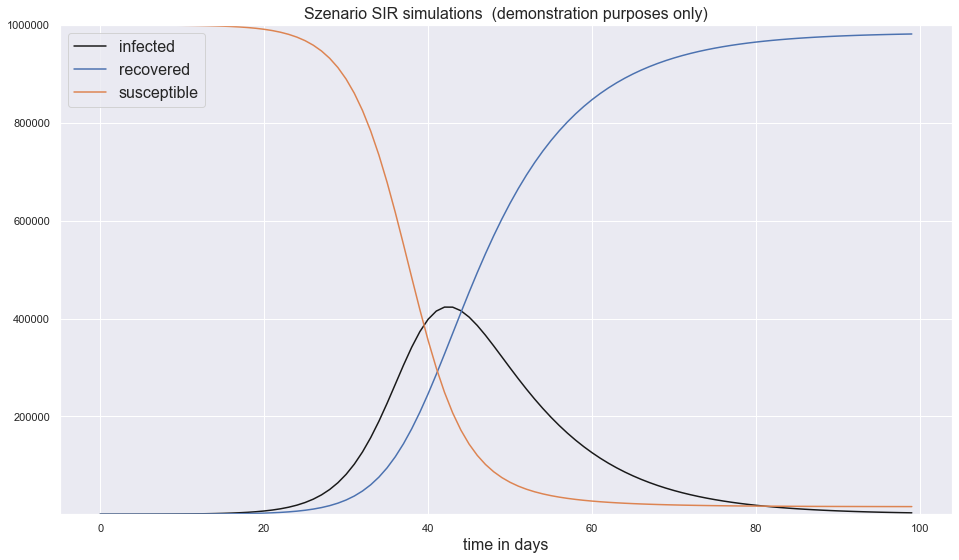

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters for SIR model

In [8]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt


In [9]:
#defining the fit function

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t,(S0,I0,R0),t,args=(beta,gamma)) [:,1] #this is only for infection(dI)

In [10]:
data_path= '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [11]:
#Country_list=['China','India','US']

In [12]:
full_countrylist= pd_raw['Country/Region'].unique()

In [13]:
 #for each in df_analyseSIR:
#fitdata=np.array(df_analyseSIR[each]).reshape(-1,1) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



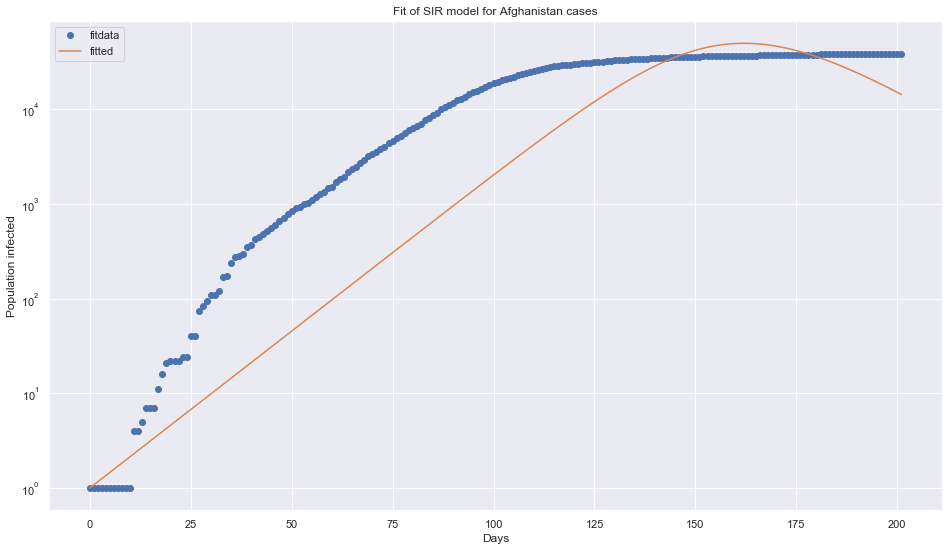

Optimal parameters: beta = 0.2554533014557034  and gamma =  0.17906954100208414
Basic Reproduction Number R0  1.426559201671993
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



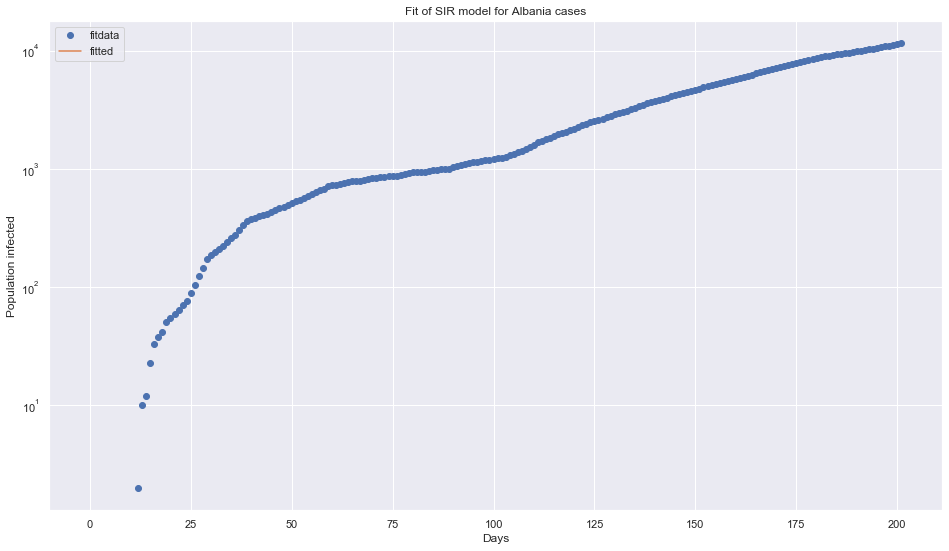

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



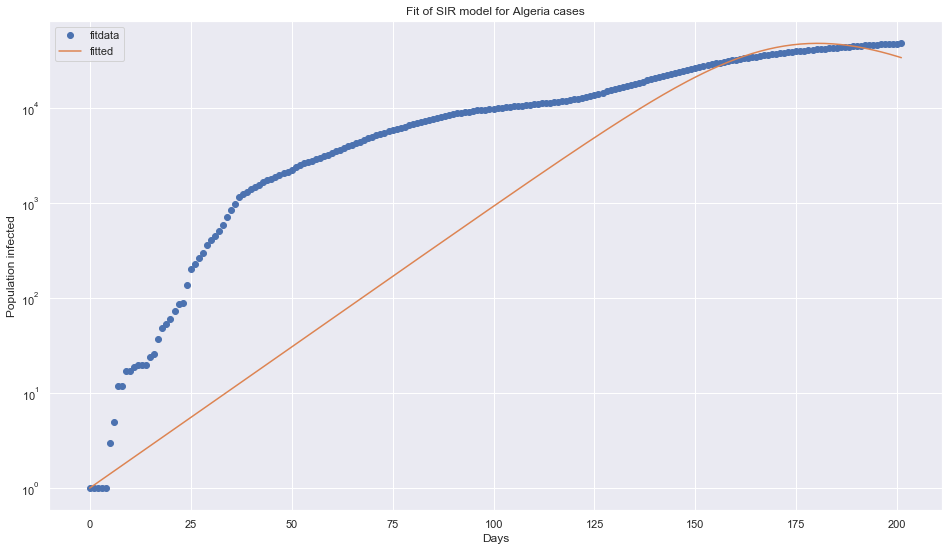

Optimal parameters: beta = 0.2323581018492581  and gamma =  0.16388992142908376
Basic Reproduction Number R0  1.4177693162773342
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



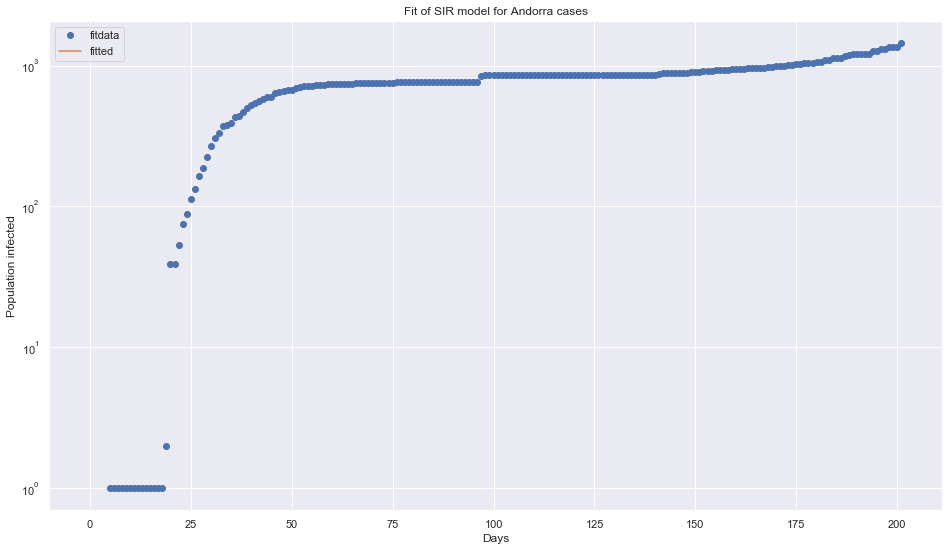

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



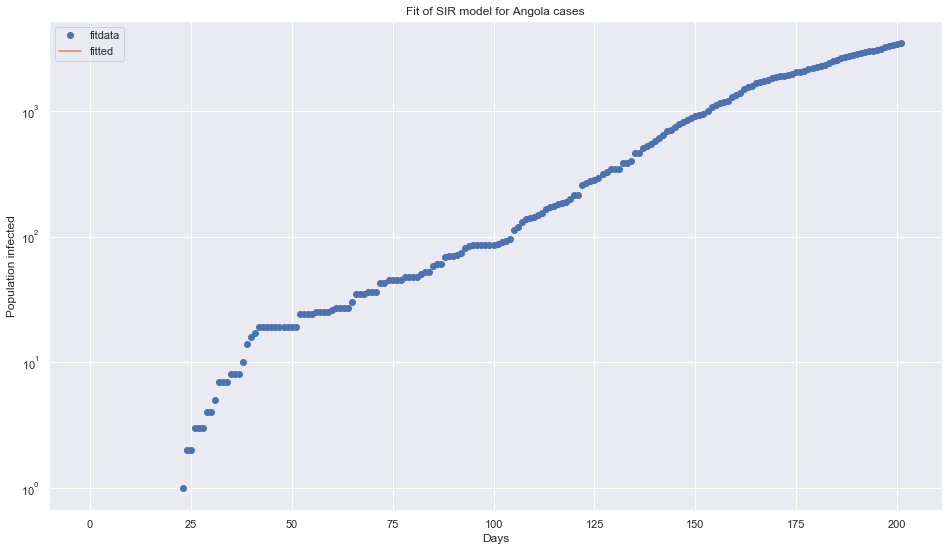

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



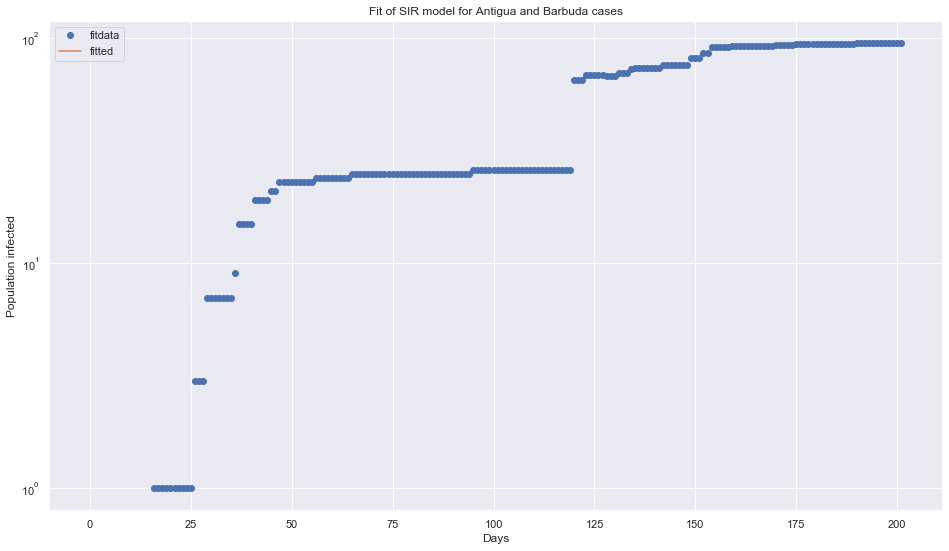

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



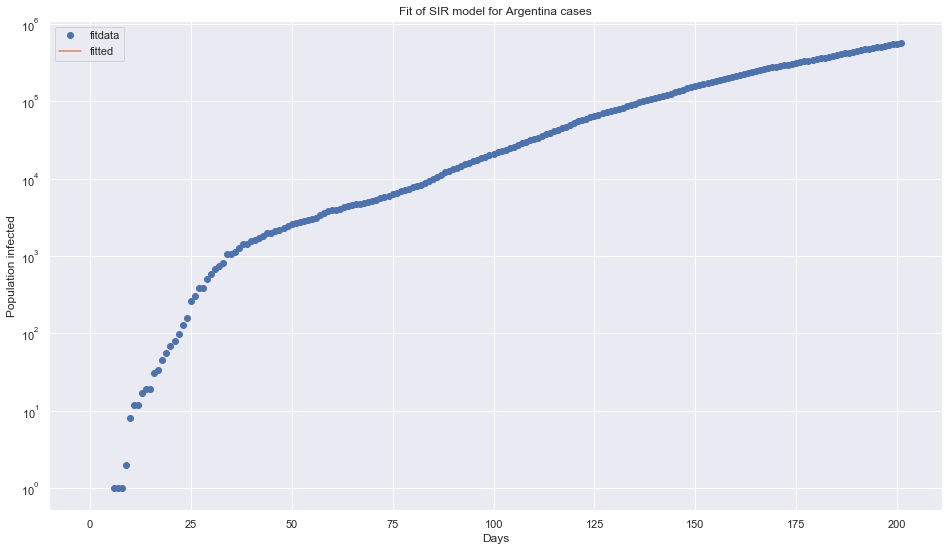

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



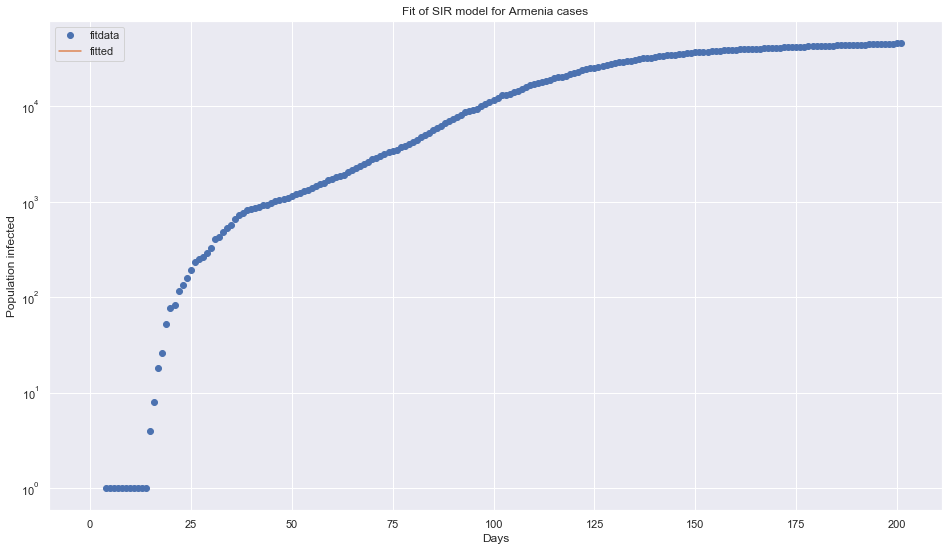

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



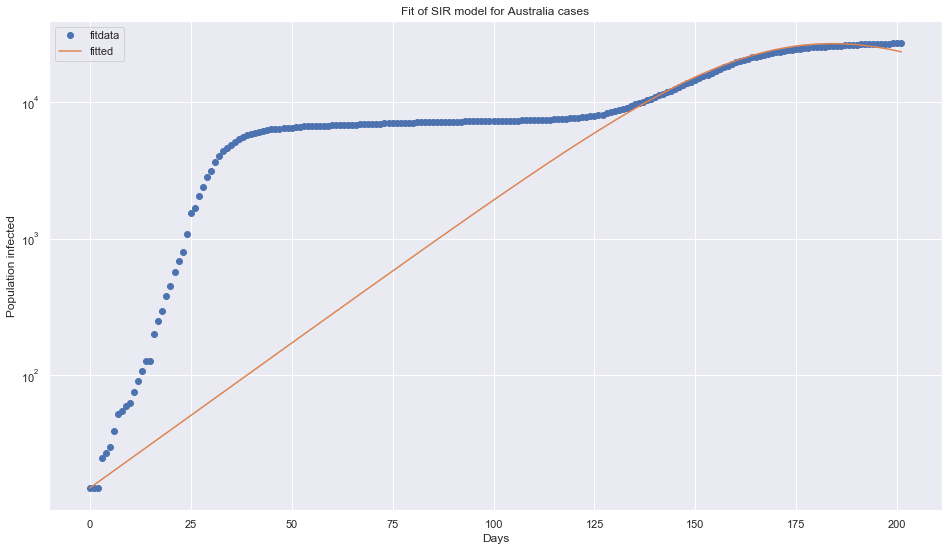

Optimal parameters: beta = 0.22048352444296387  and gamma =  0.17163583027828117
Basic Reproduction Number R0  1.2846007974295557
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars



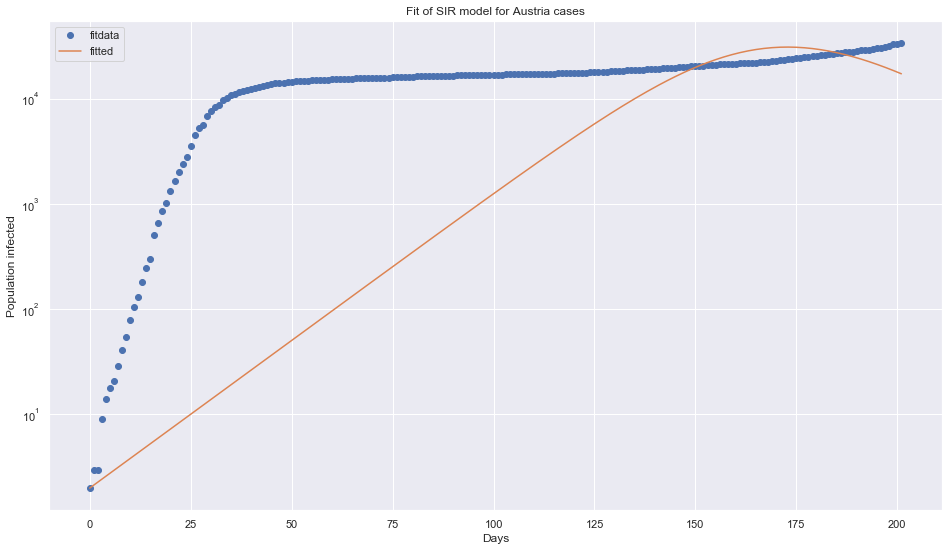

Optimal parameters: beta = 0.2714132565204571  and gamma =  0.20681907116580364
Basic Reproduction Number R0  1.3123221905530622
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



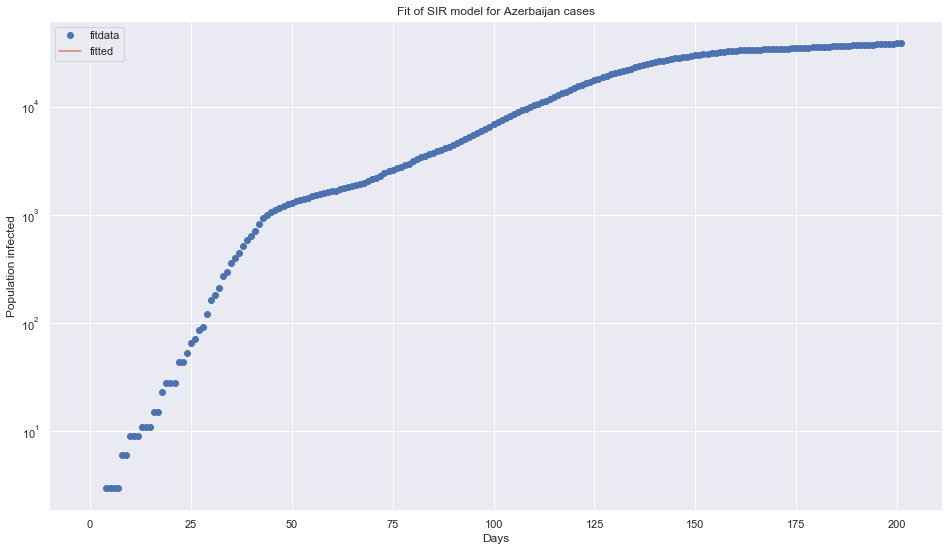

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



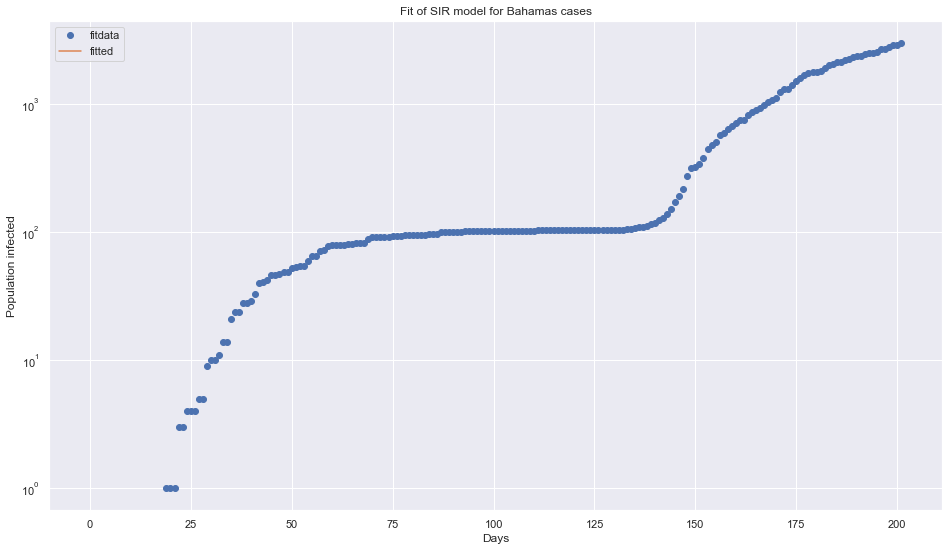

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


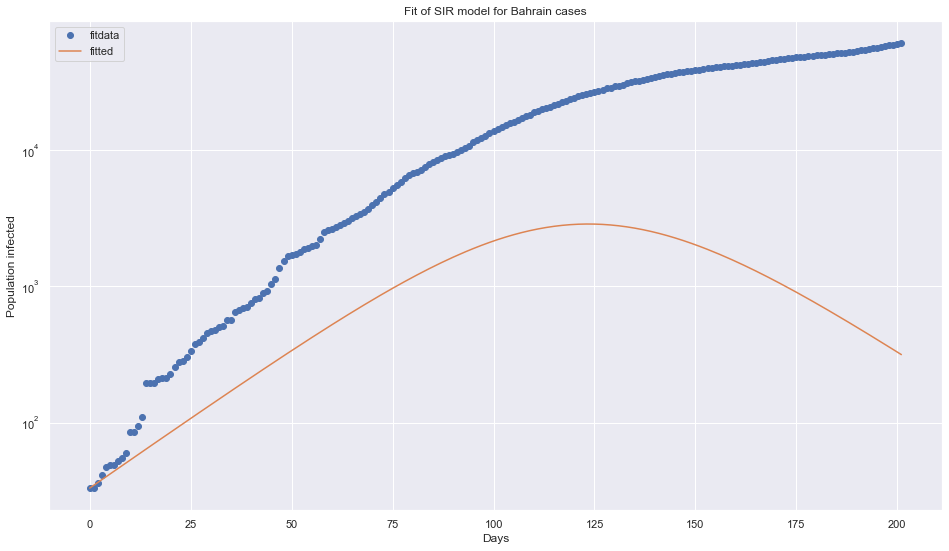

Optimal parameters: beta = 0.6366712656325786  and gamma =  0.5893038897565619
Basic Reproduction Number R0  1.0803785223538638
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



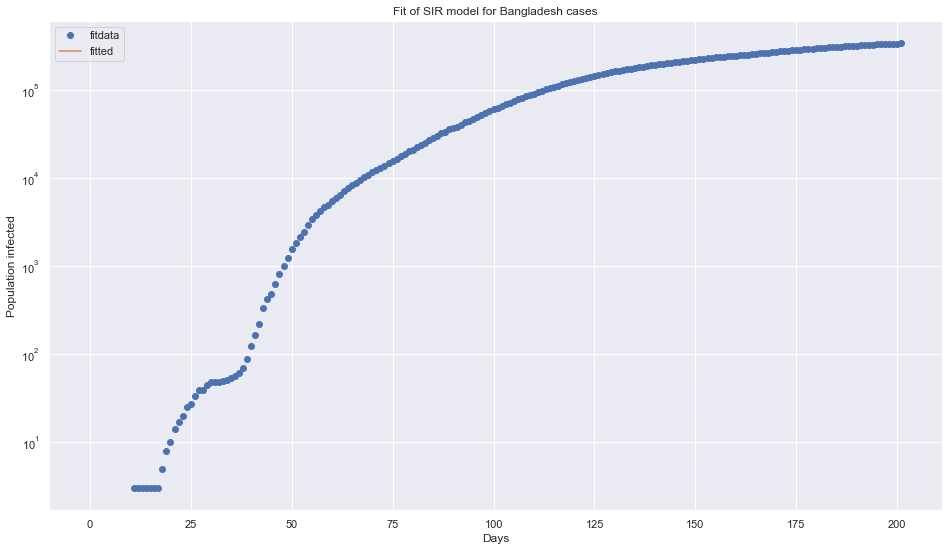

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



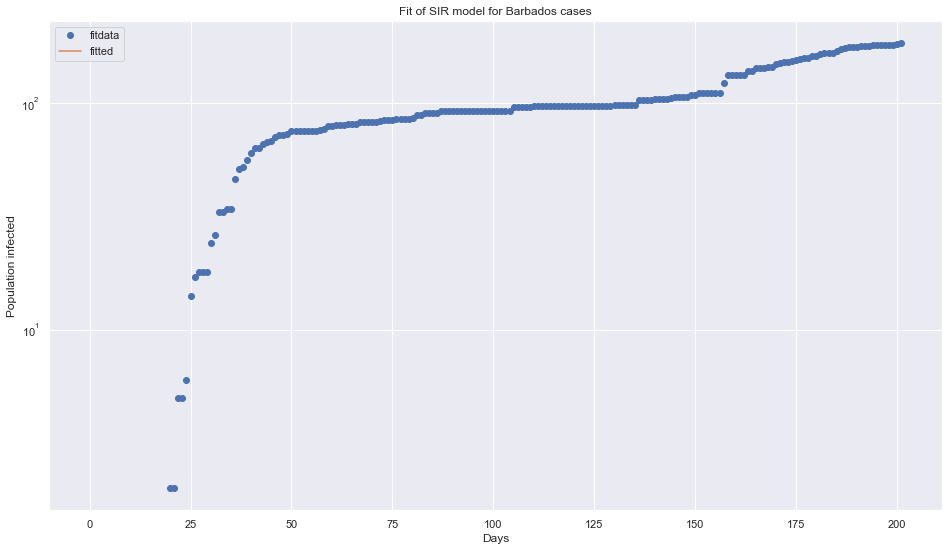

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



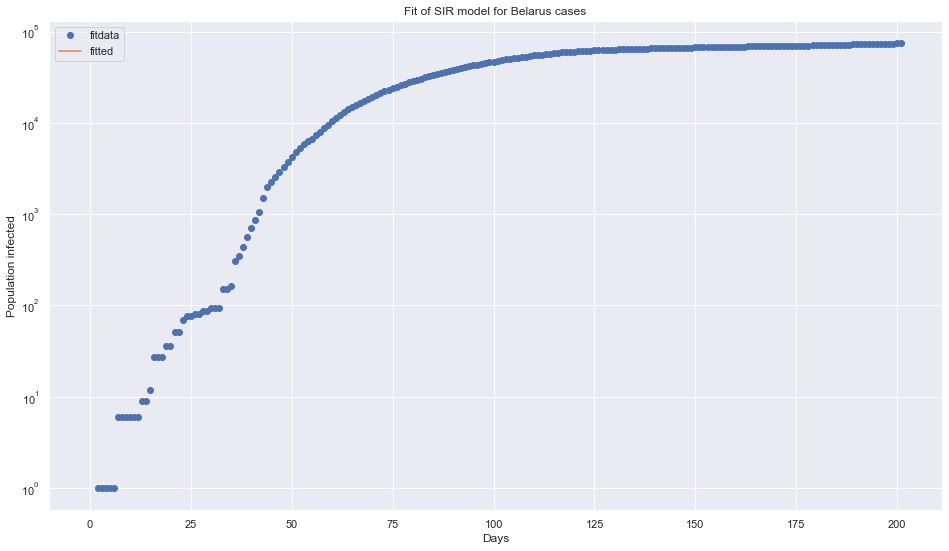

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



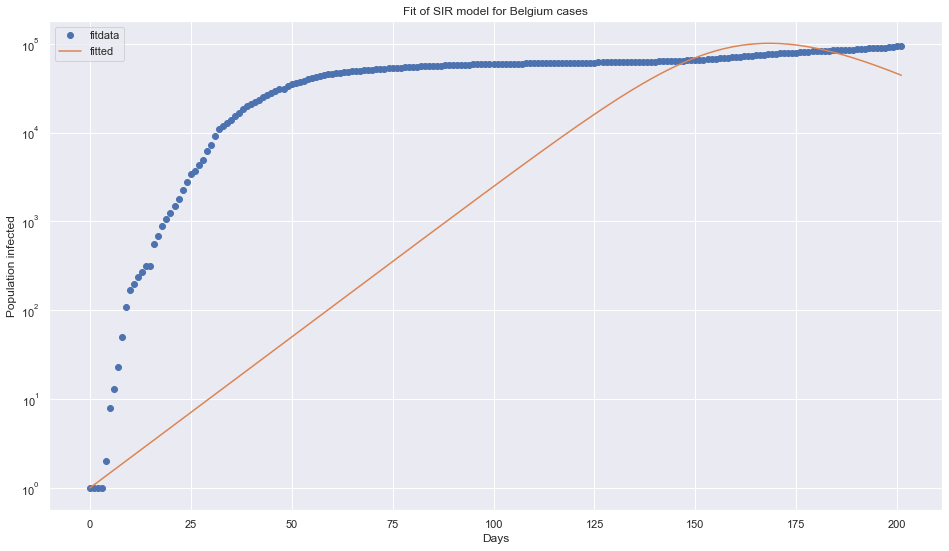

Optimal parameters: beta = 0.18885721599503077  and gamma =  0.11057491670850389
Basic Reproduction Number R0  1.707957117371326
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



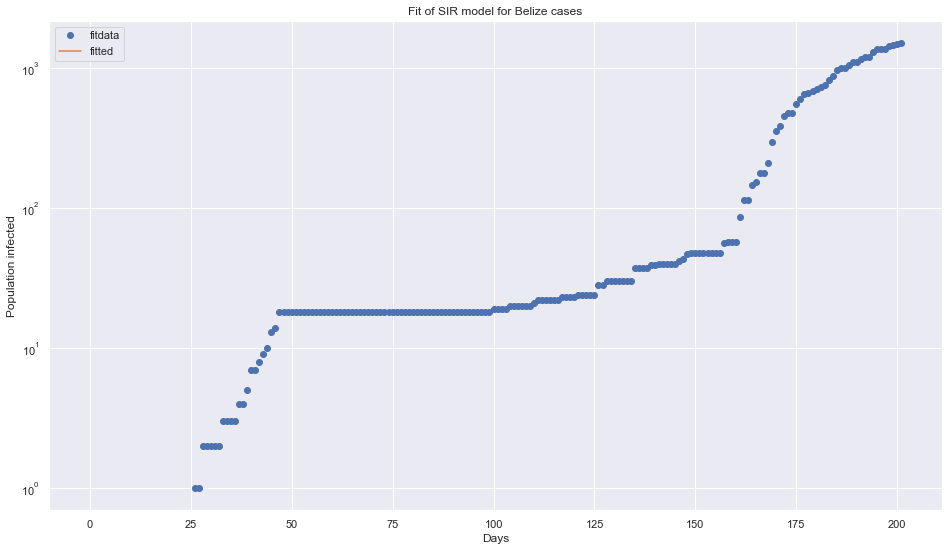

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



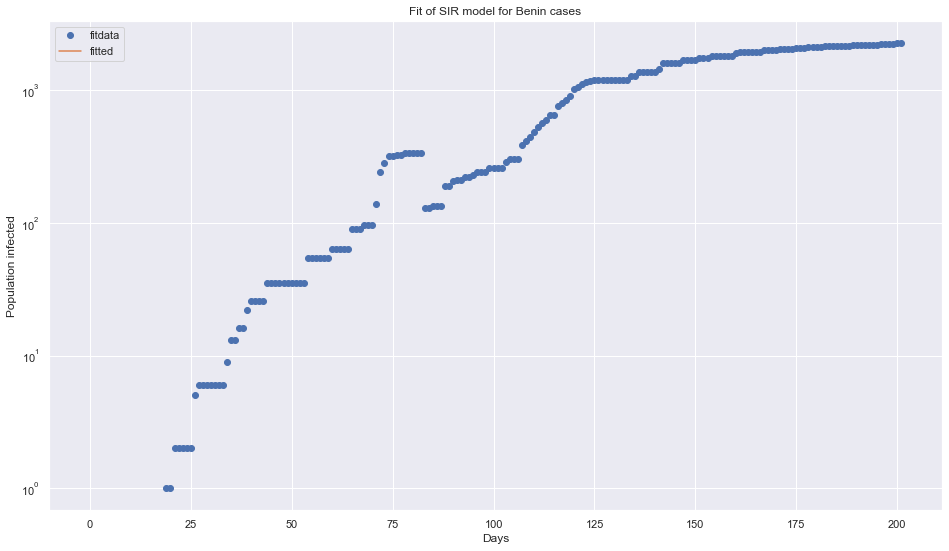

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



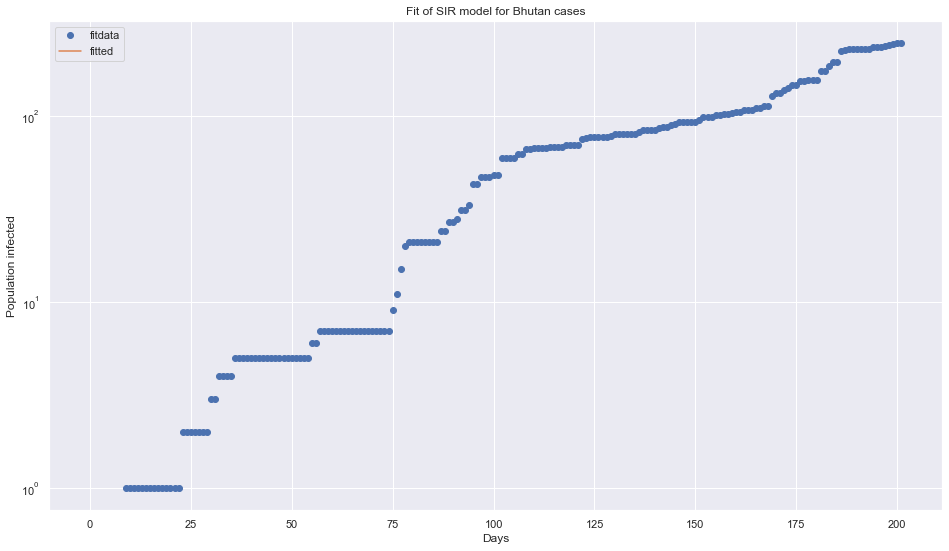

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



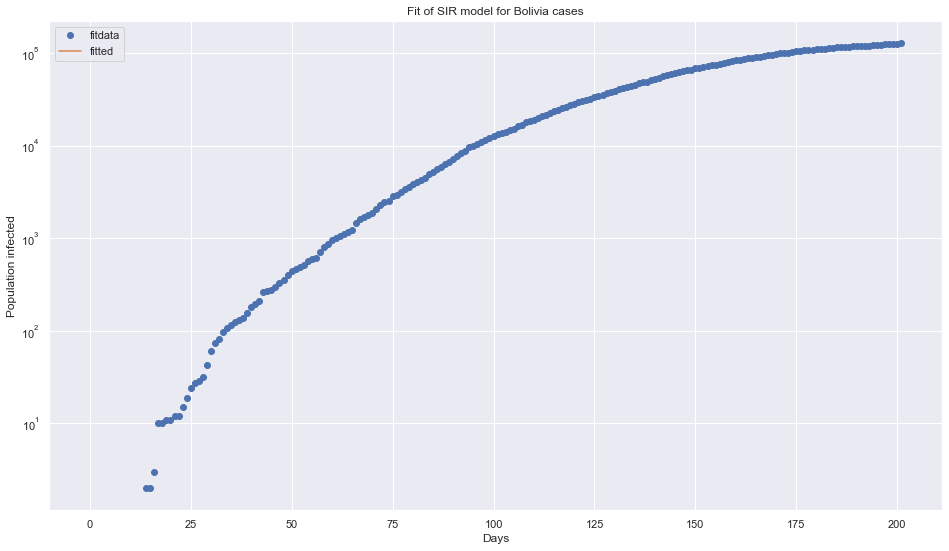

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



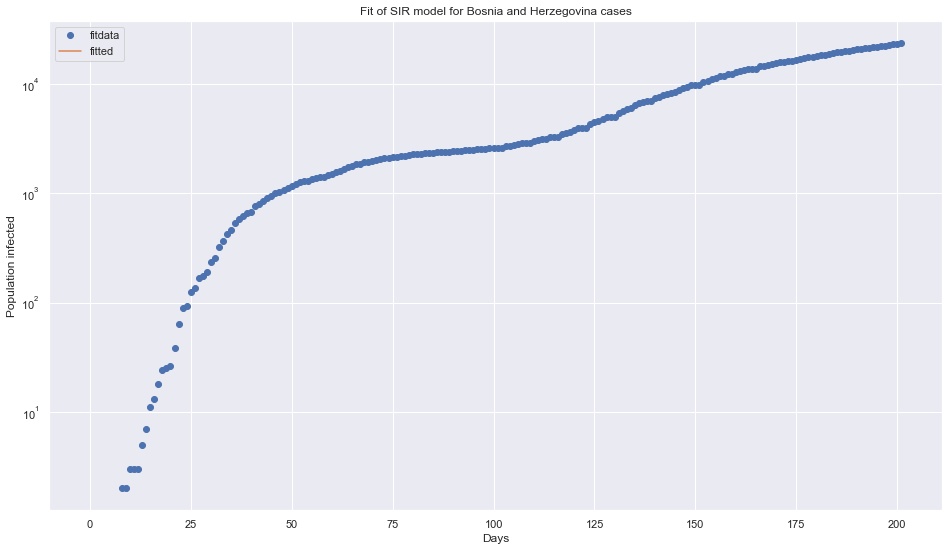

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



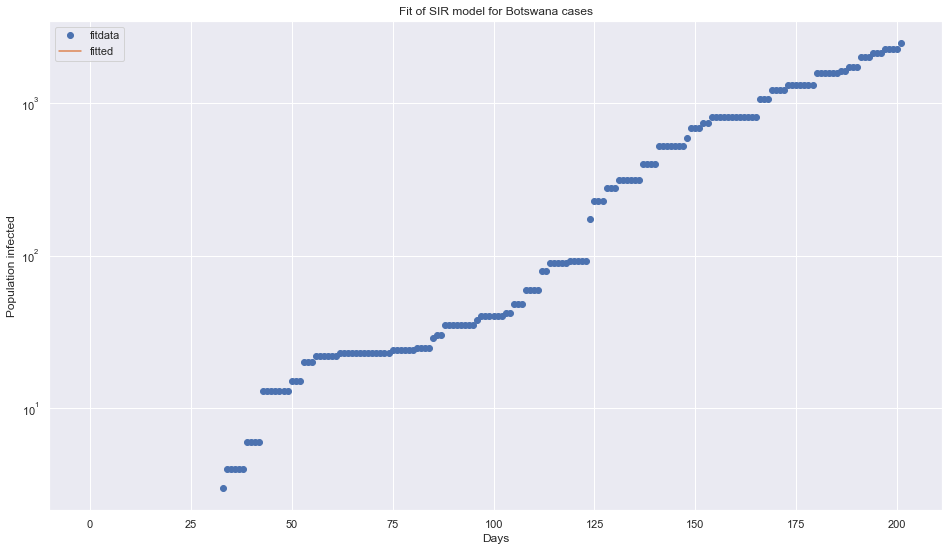

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



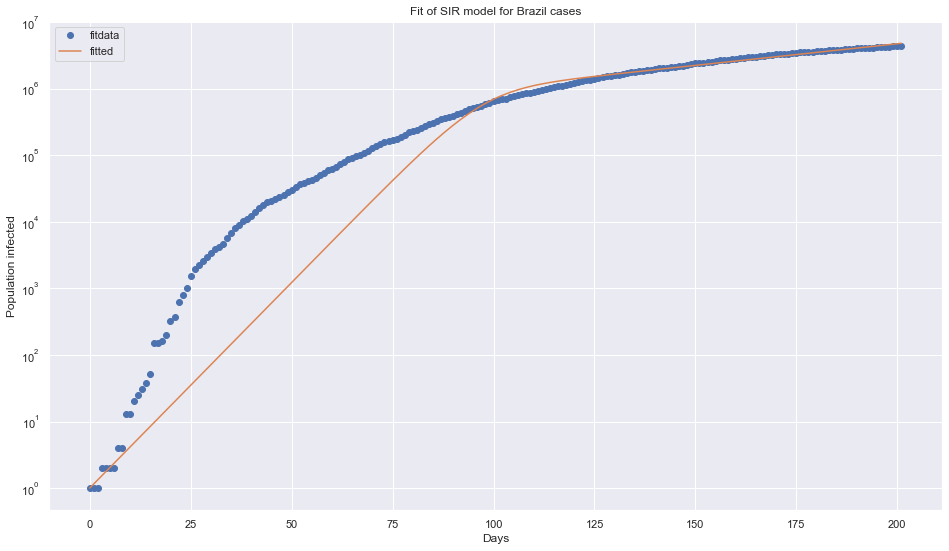

Optimal parameters: beta = 0.12729858283183104  and gamma =  -0.014977930266418278
Basic Reproduction Number R0  -8.499077013146781
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



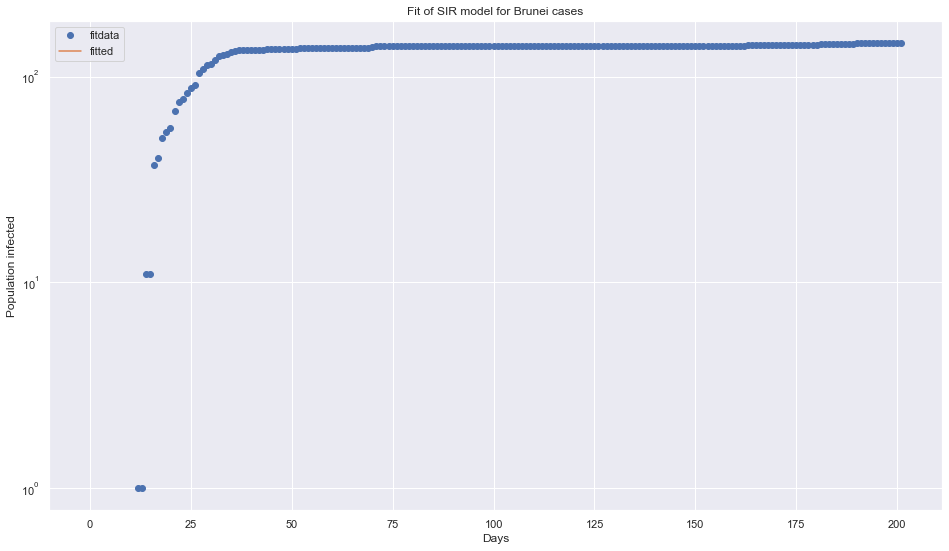

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



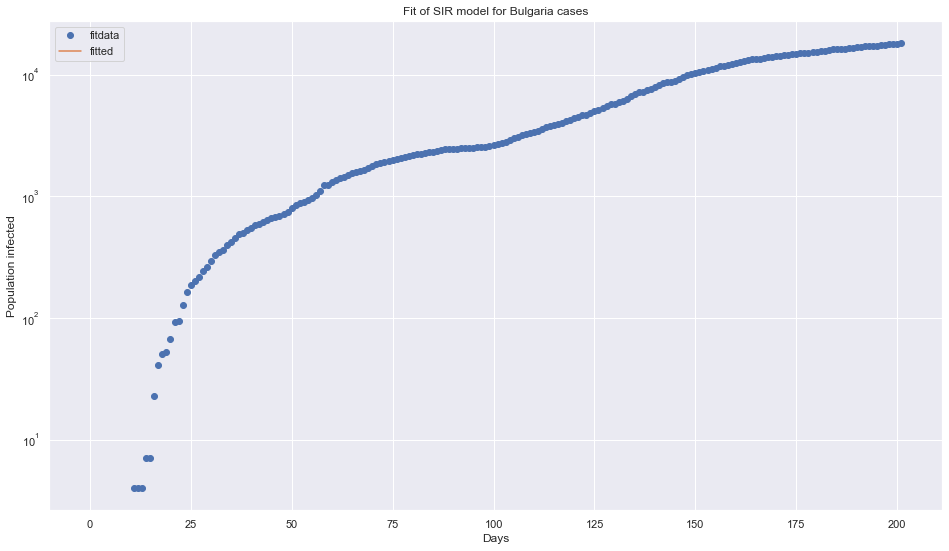

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



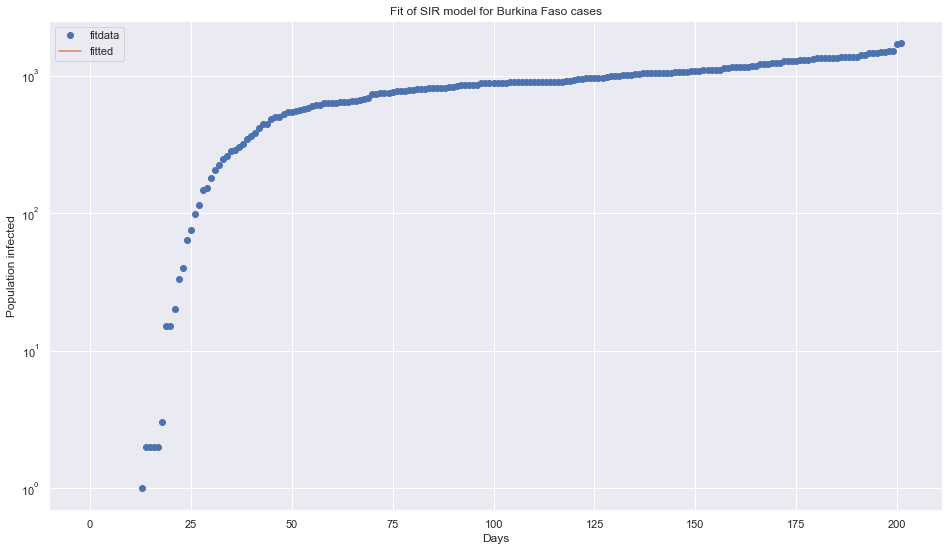

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



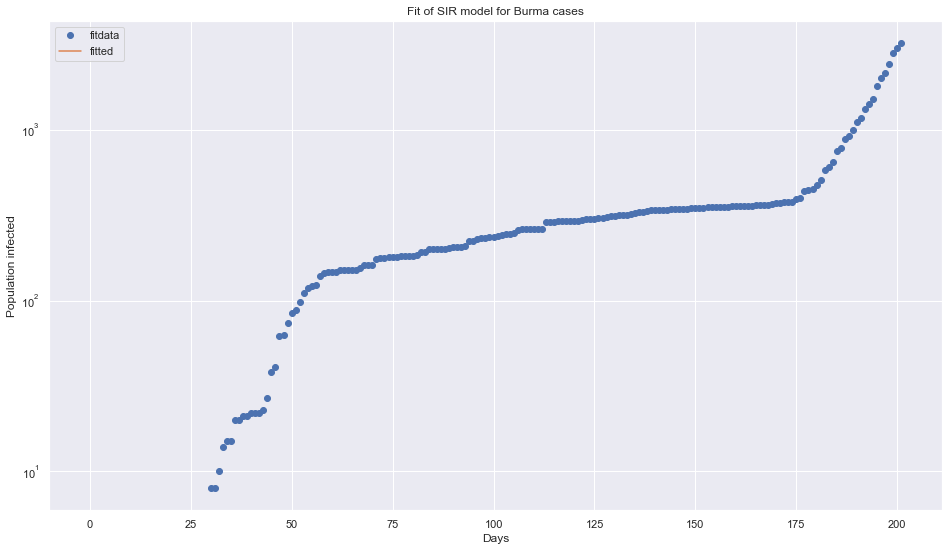

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



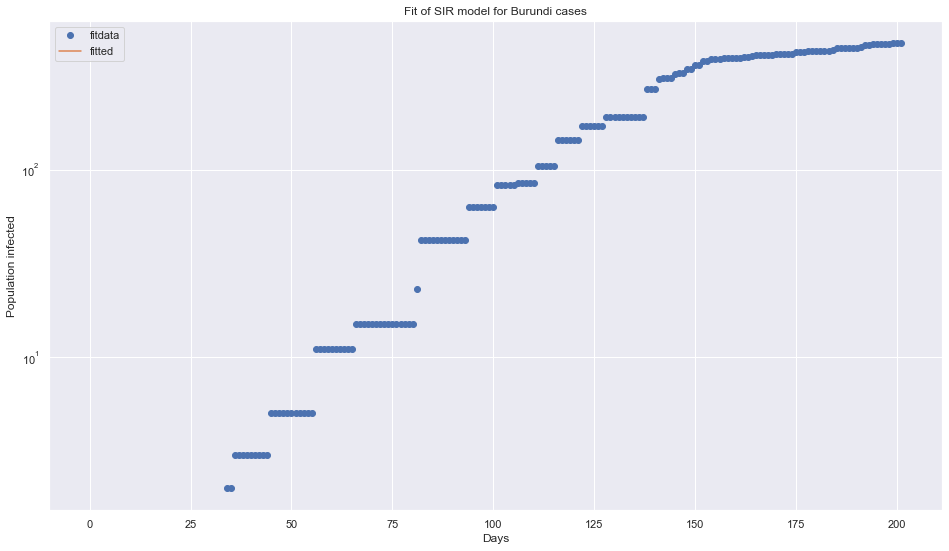

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



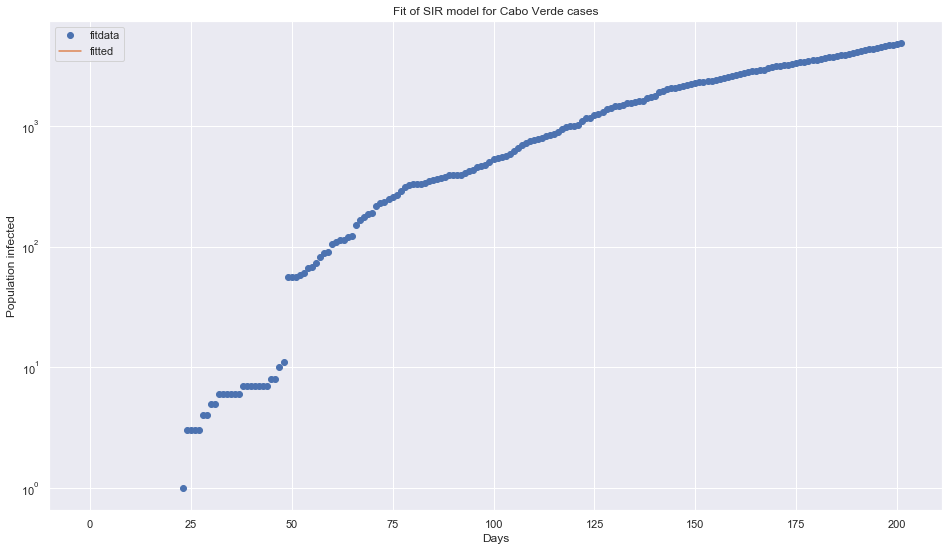

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


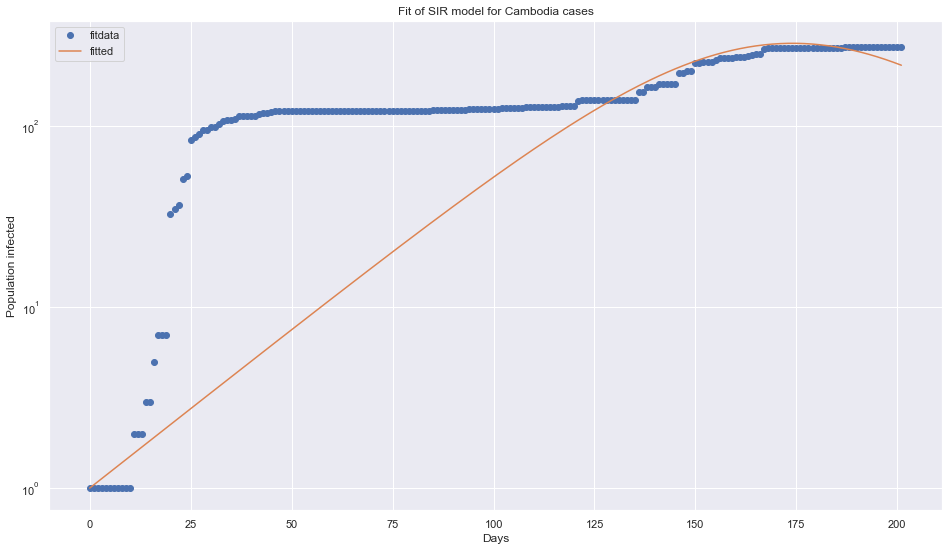

Optimal parameters: beta = 1.6953220771898019  and gamma =  1.6548266447057671
Basic Reproduction Number R0  1.0244711025252045
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



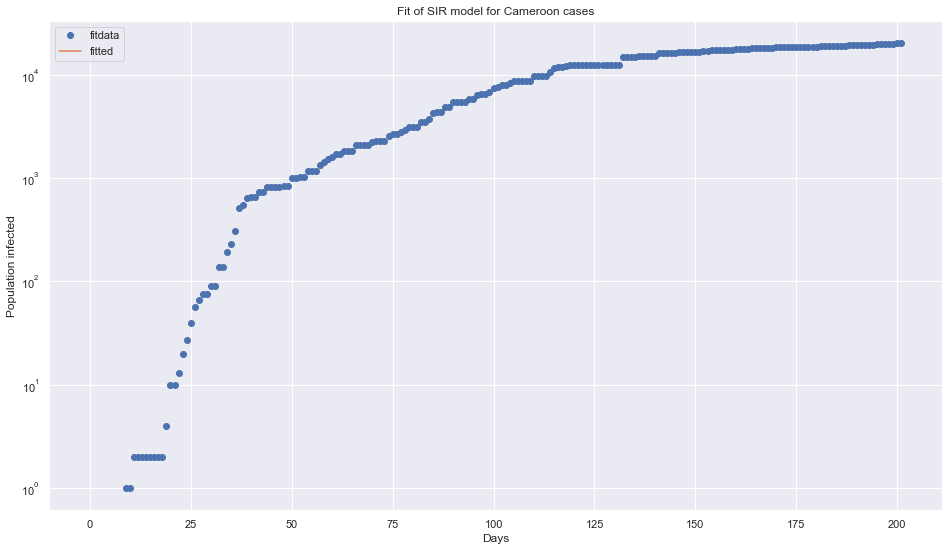

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



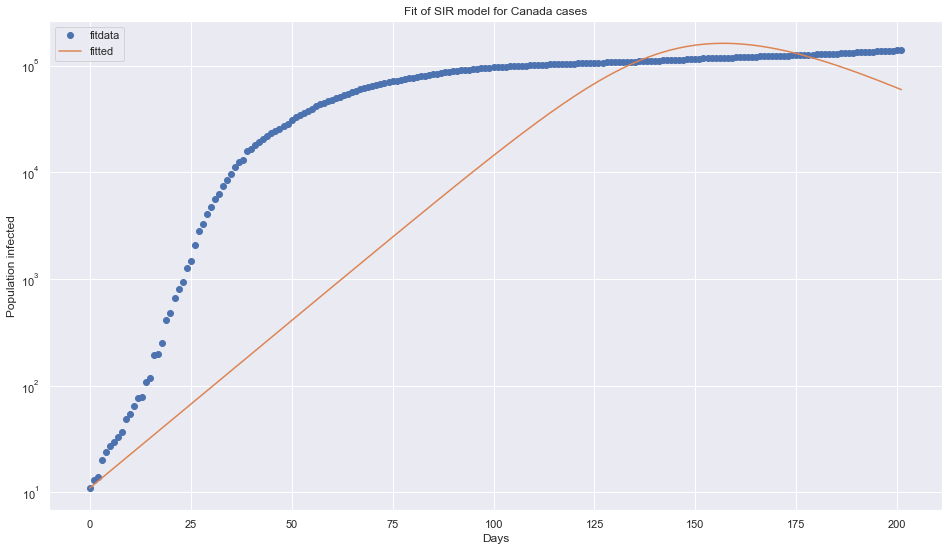

Optimal parameters: beta = 0.14133600824966433  and gamma =  0.06902465192254209
Basic Reproduction Number R0  2.047616385060057
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



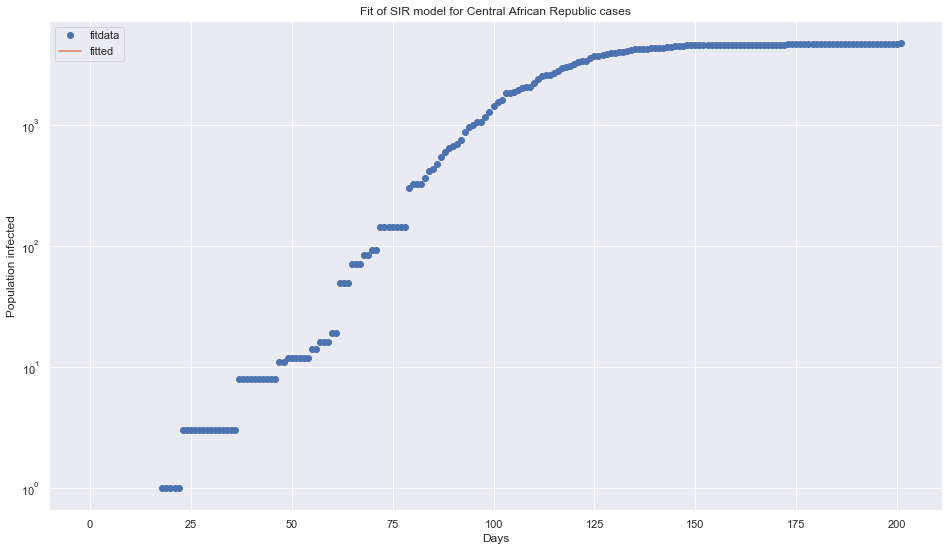

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



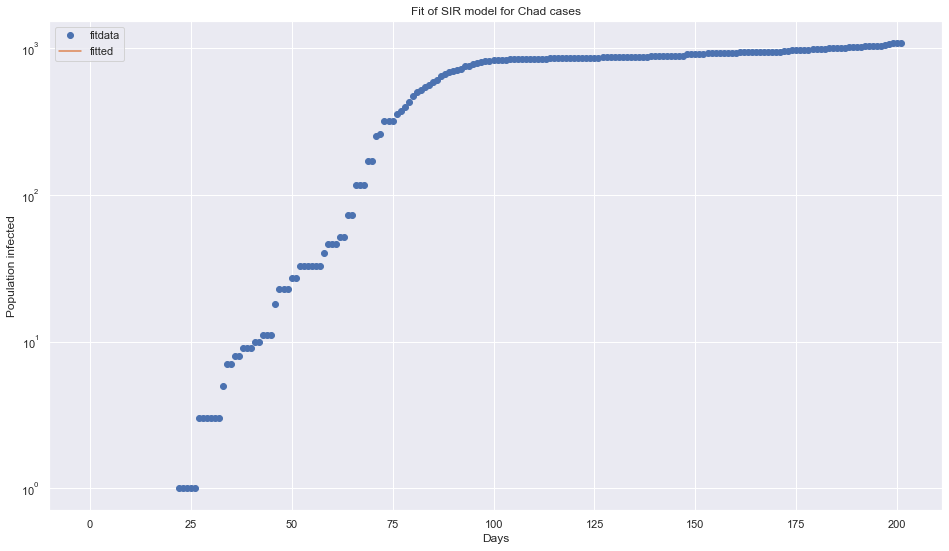

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



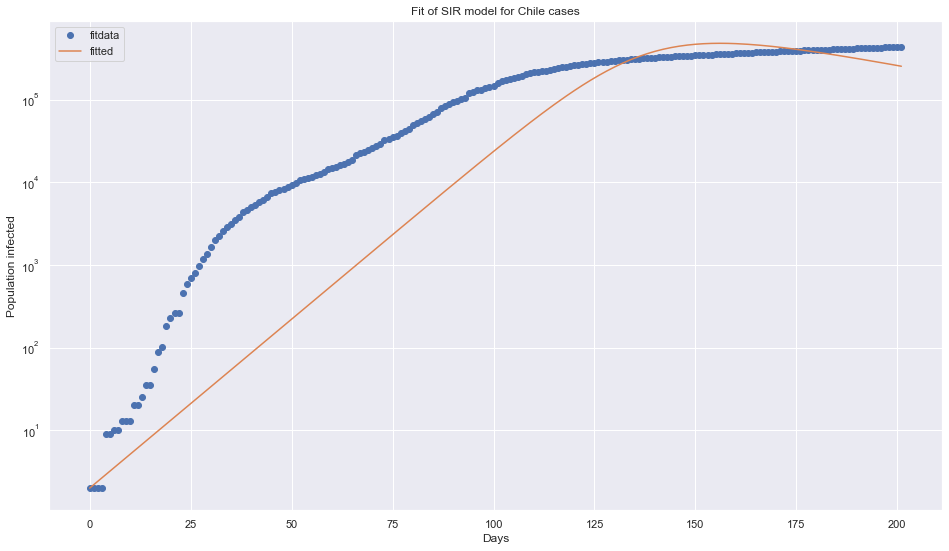

Optimal parameters: beta = 0.11746582437742162  and gamma =  0.02332272435655782
Basic Reproduction Number R0  5.036539581808885
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


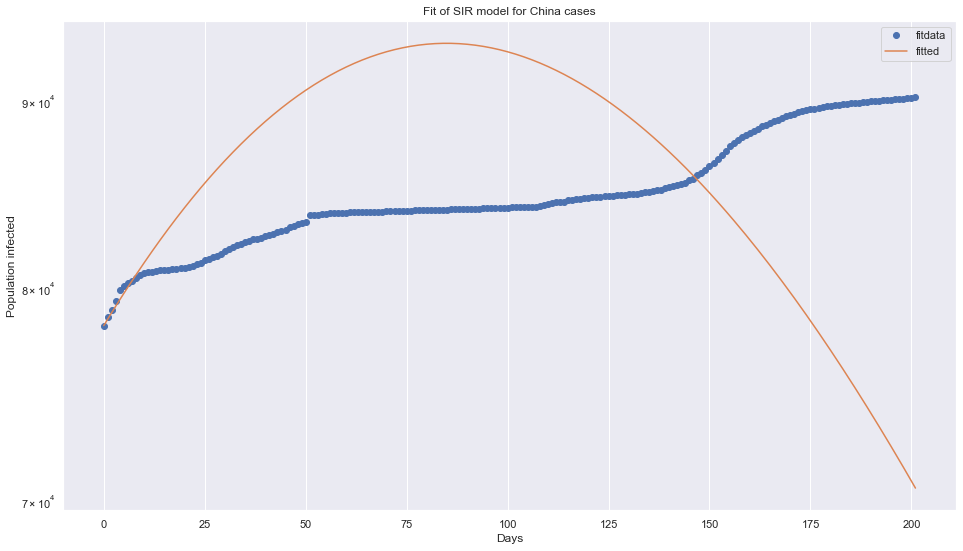

Optimal parameters: beta = 0.025843464295255858  and gamma =  0.01963555021626988
Basic Reproduction Number R0  1.3161568690772998
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



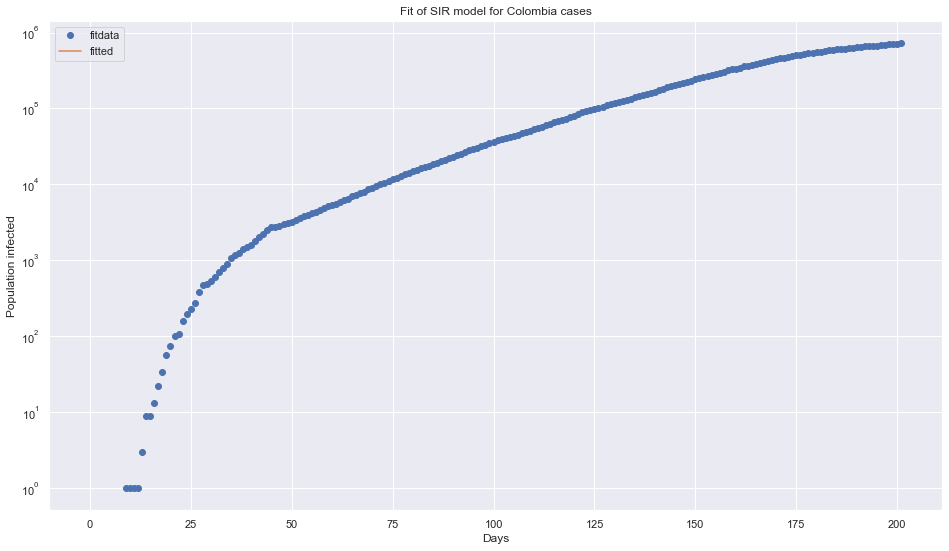

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



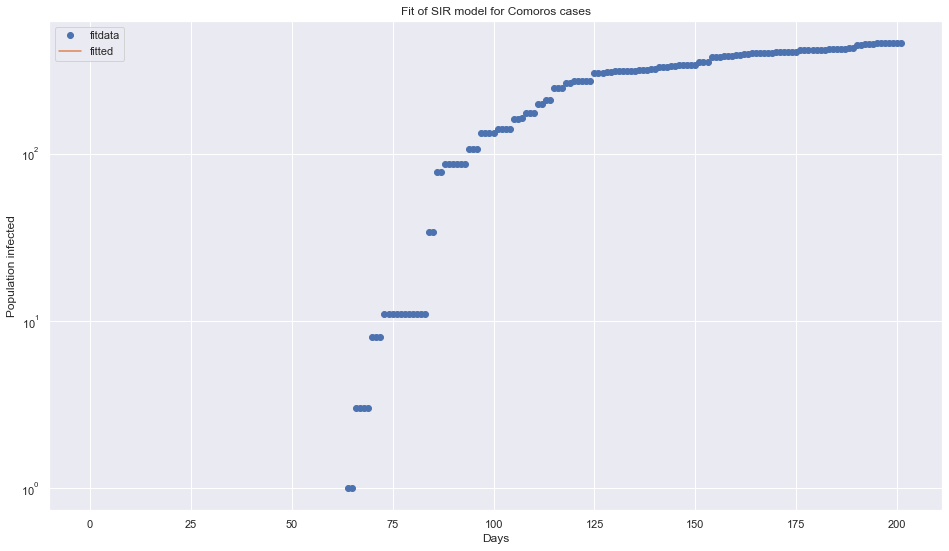

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



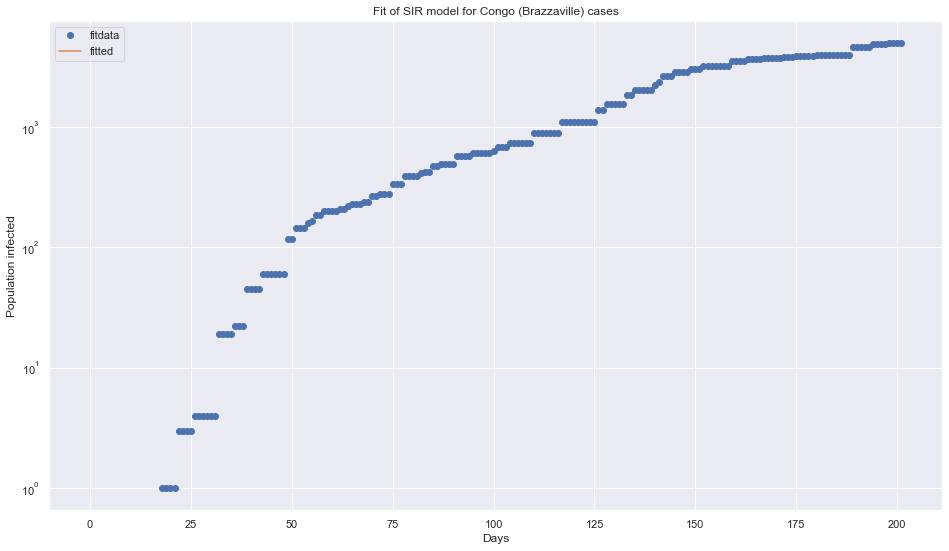

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



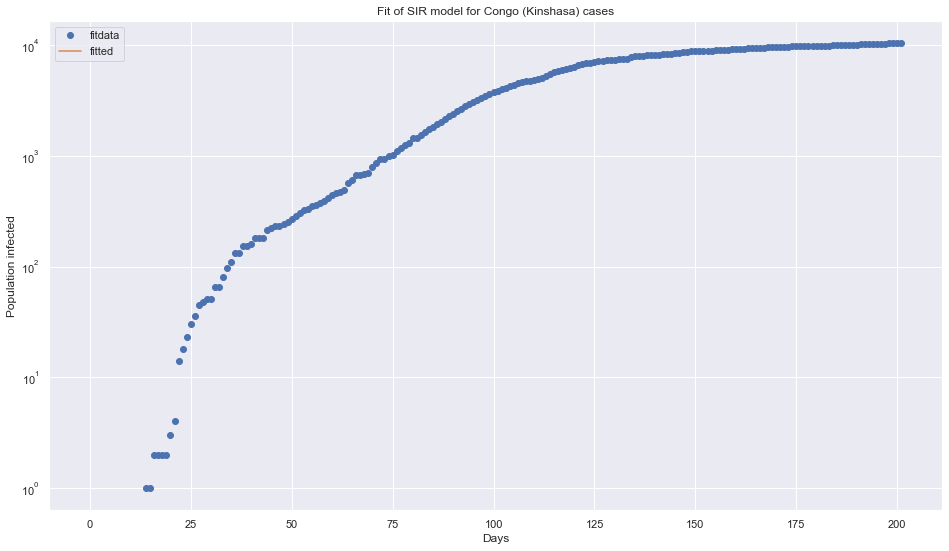

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



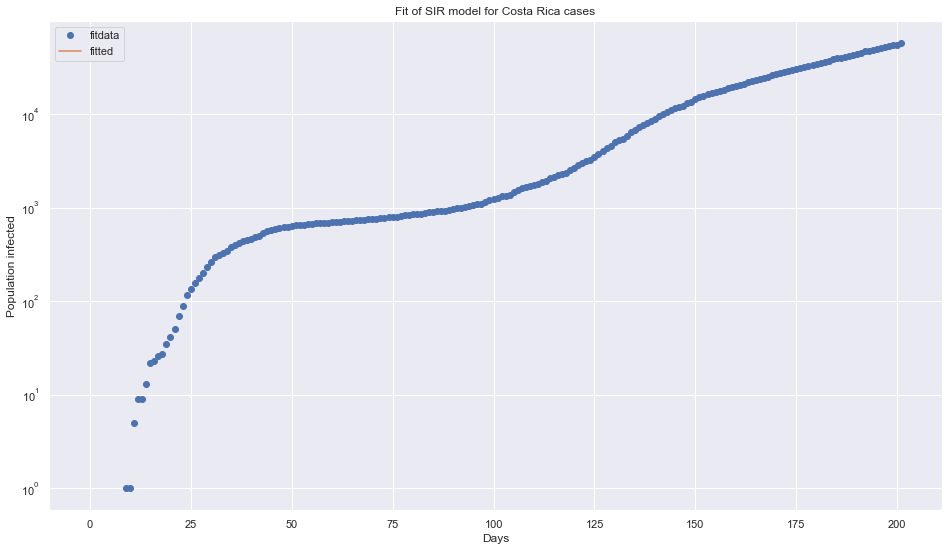

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



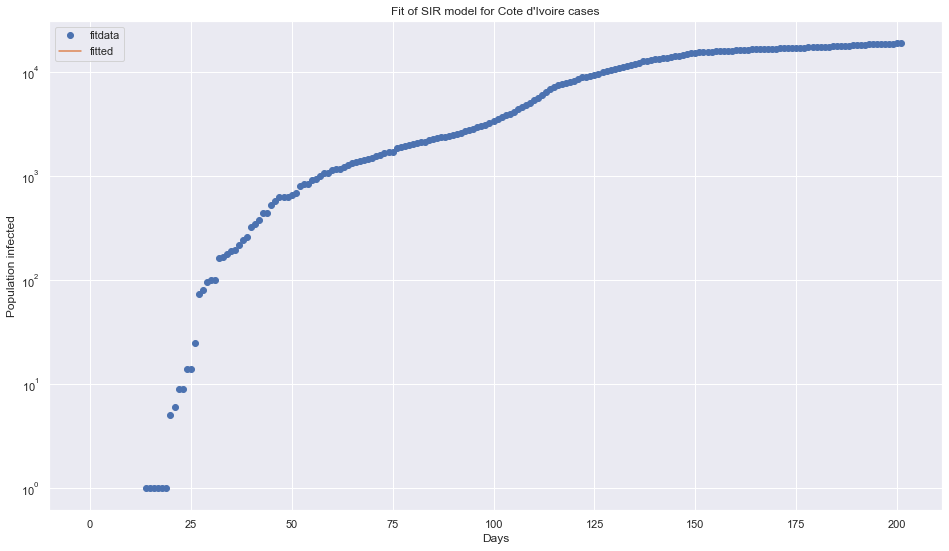

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


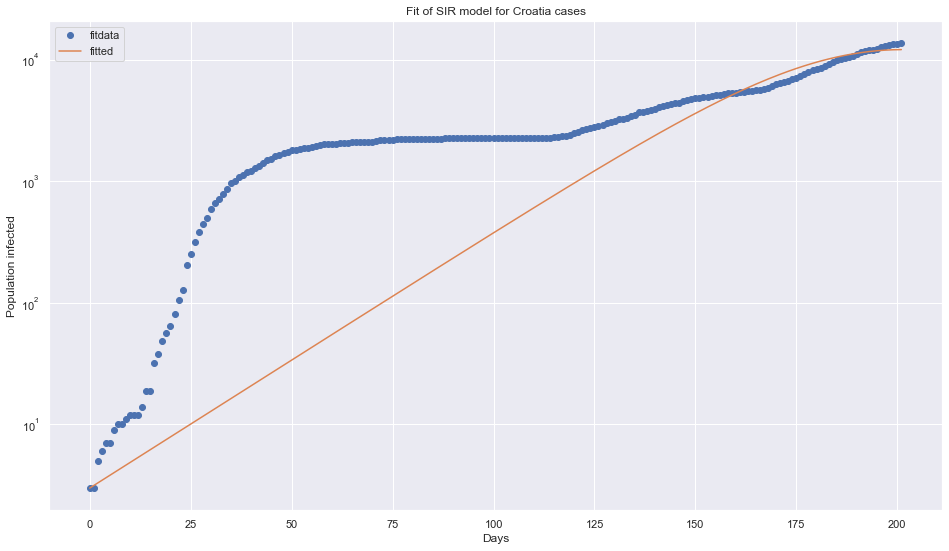

Optimal parameters: beta = 0.32040788078941634  and gamma =  0.2719374748315376
Basic Reproduction Number R0  1.1782409945076737
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



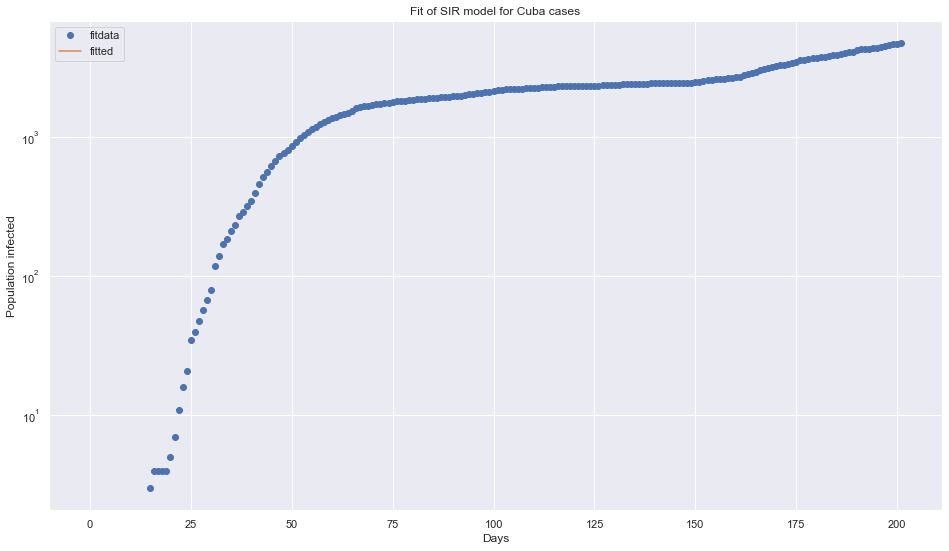

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



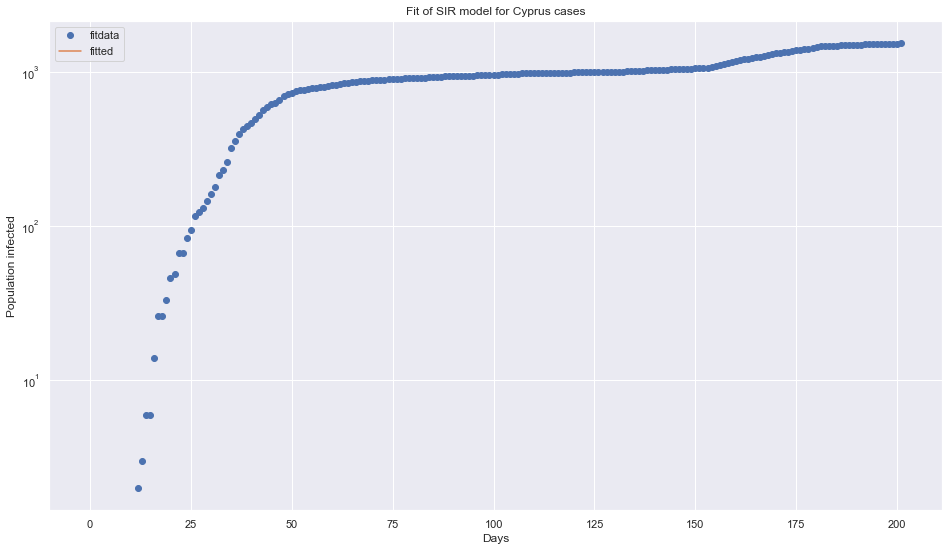

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



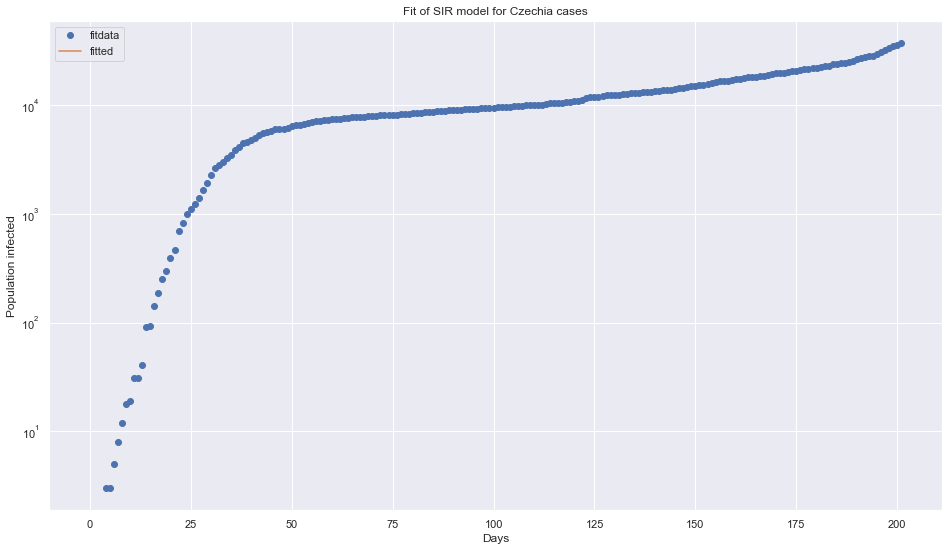

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



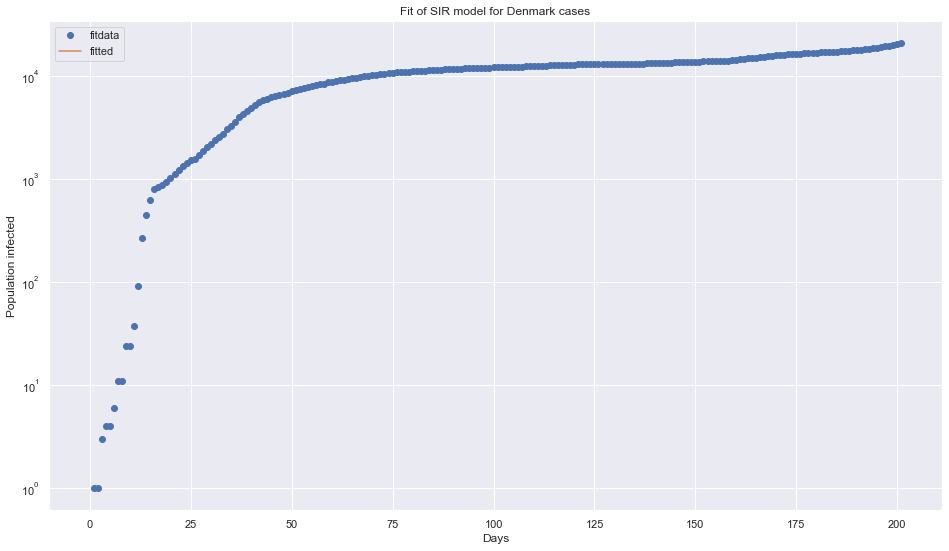

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


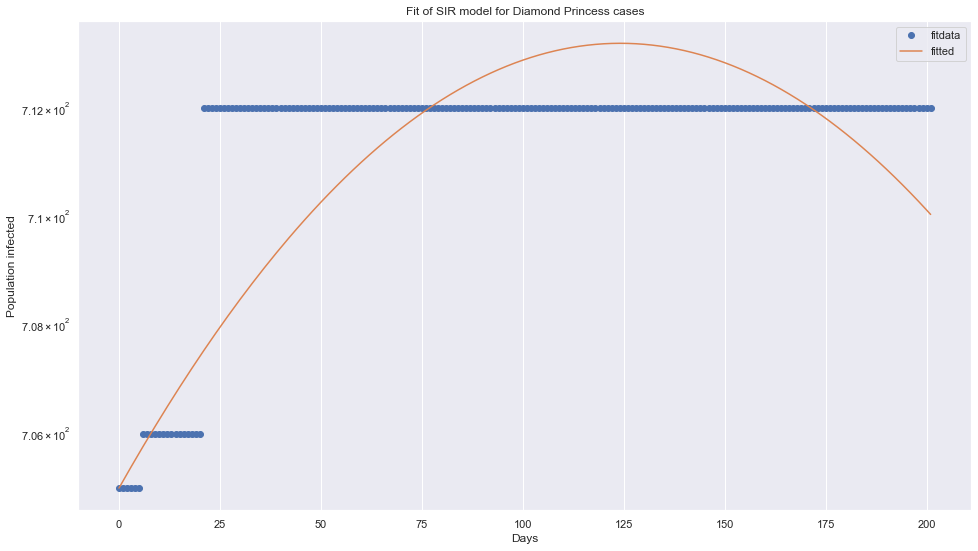

Optimal parameters: beta = -0.045871257613726464  and gamma =  -0.04602472974582454
Basic Reproduction Number R0  0.9966654419711829
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



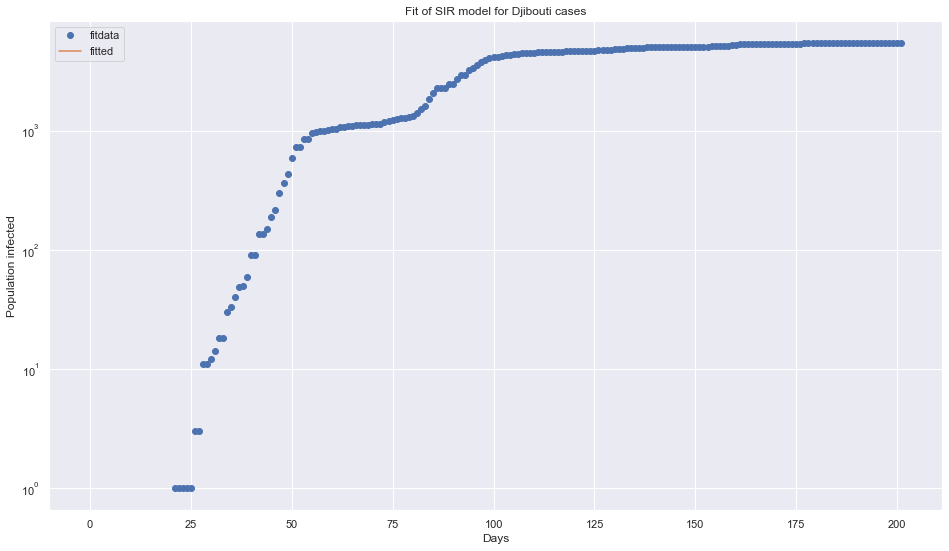

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



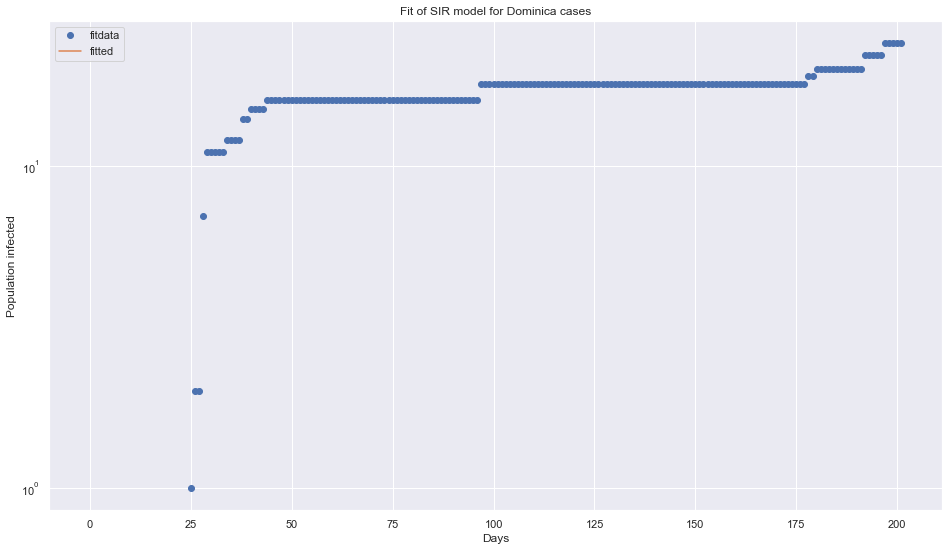

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



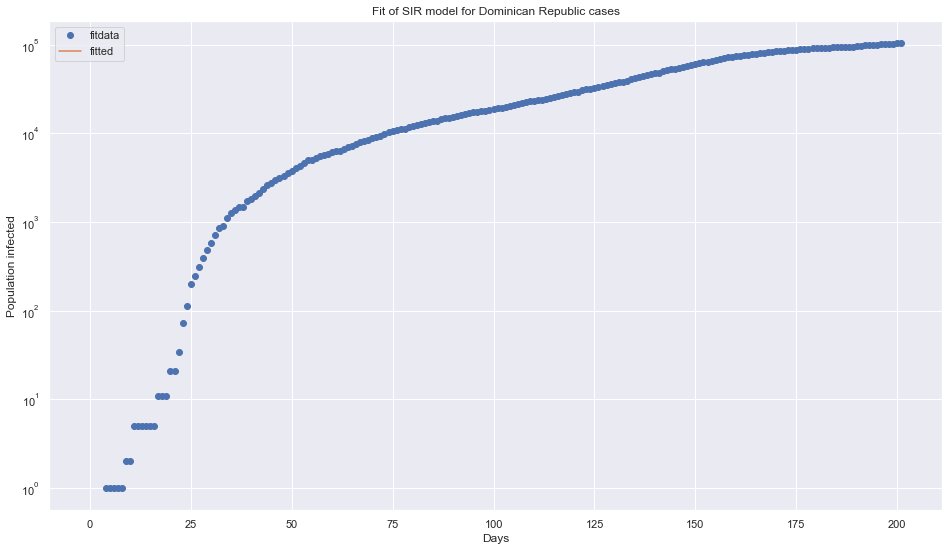

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



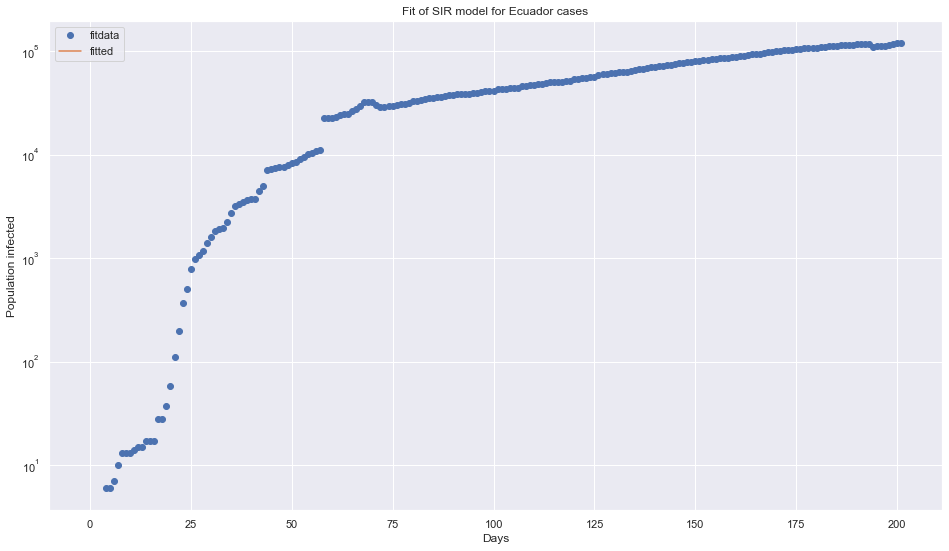

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



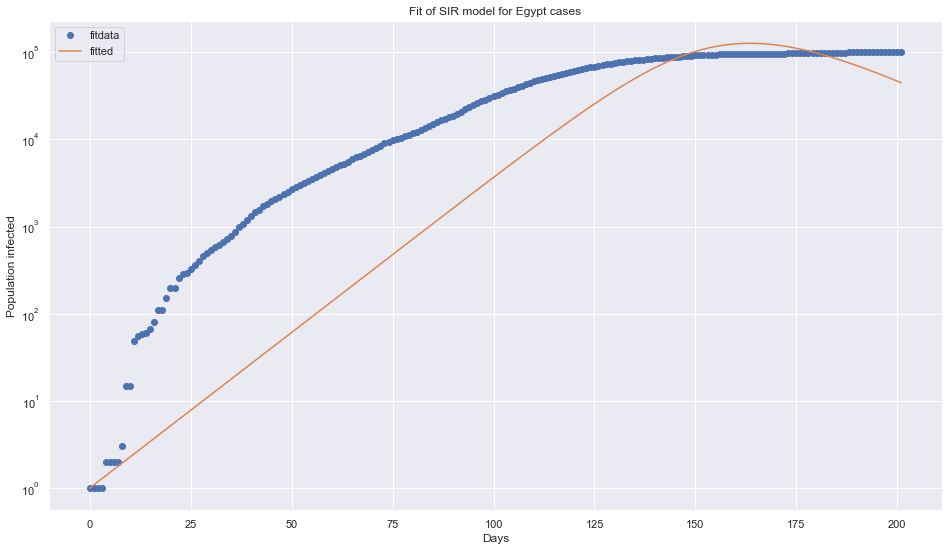

Optimal parameters: beta = 0.17929666064554867  and gamma =  0.09707625205437201
Basic Reproduction Number R0  1.8469672741910694
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



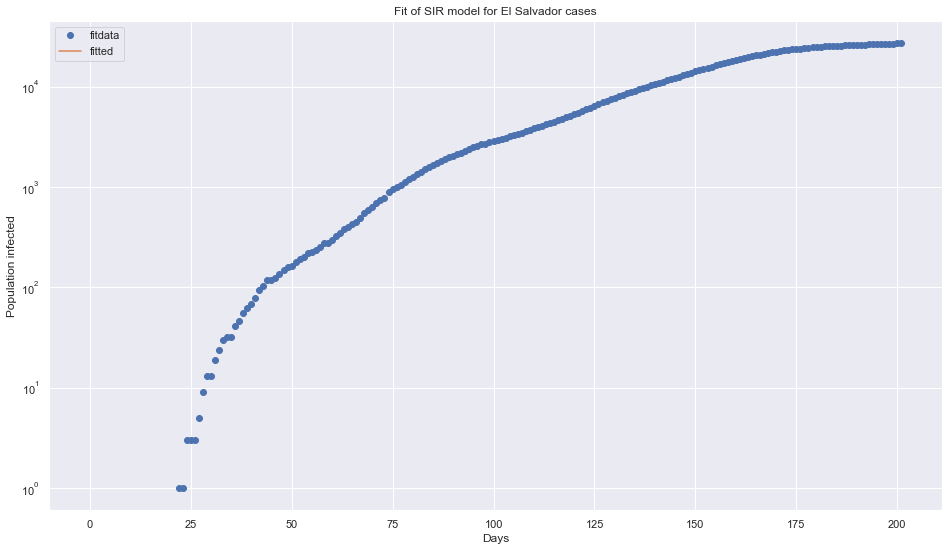

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



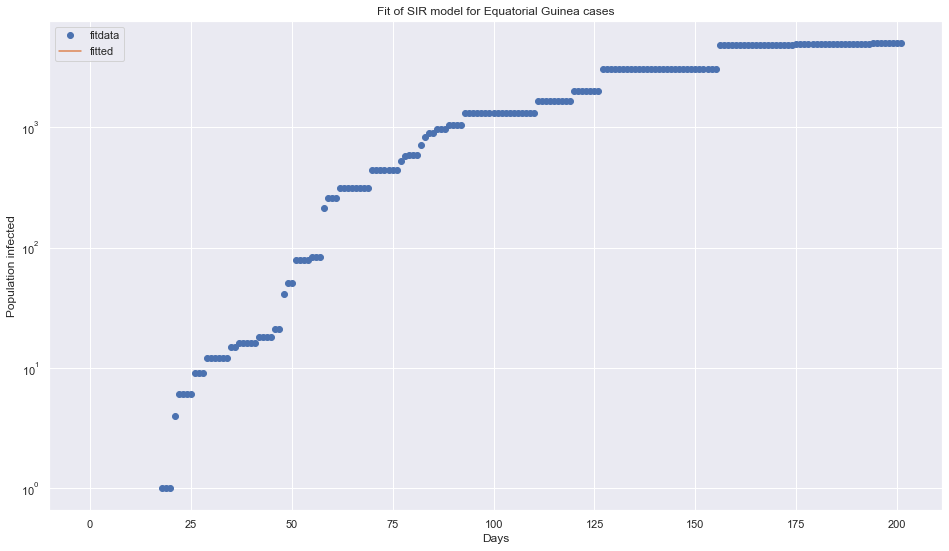

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



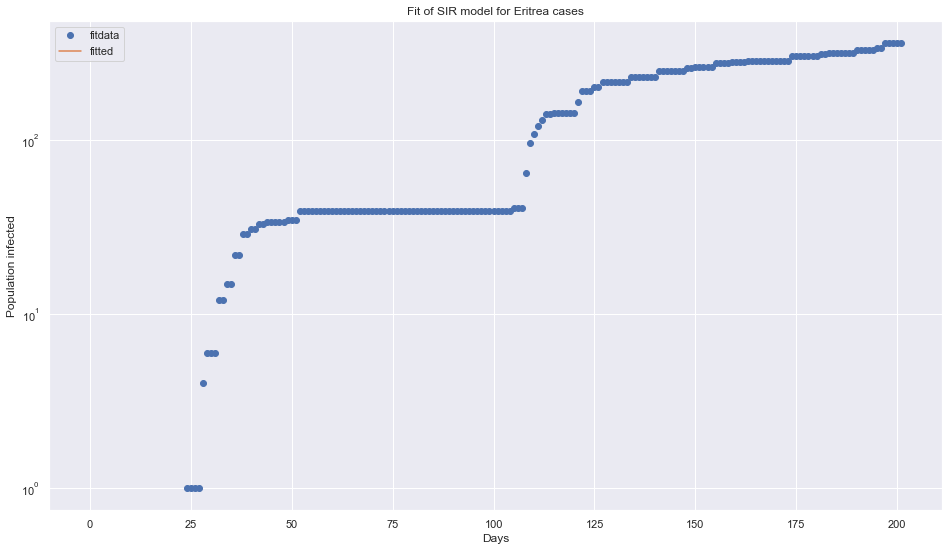

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



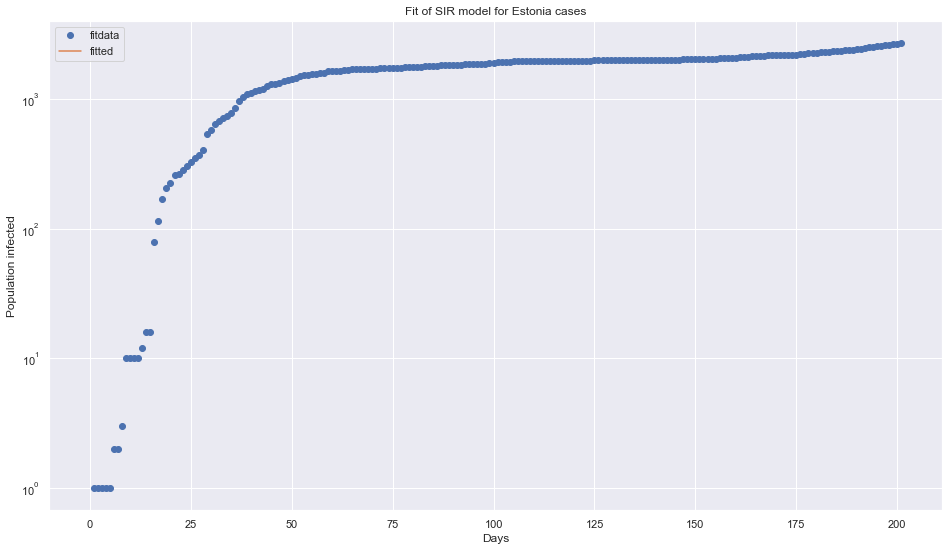

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



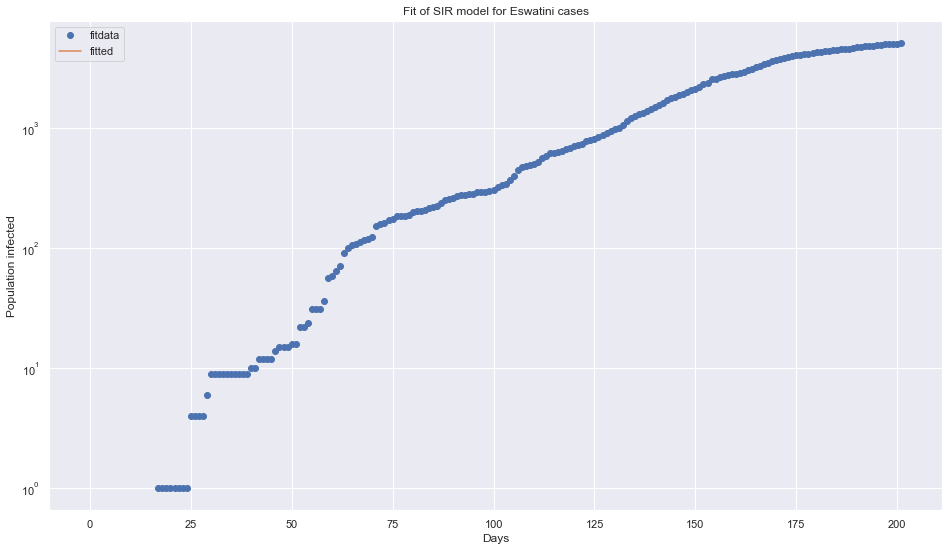

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



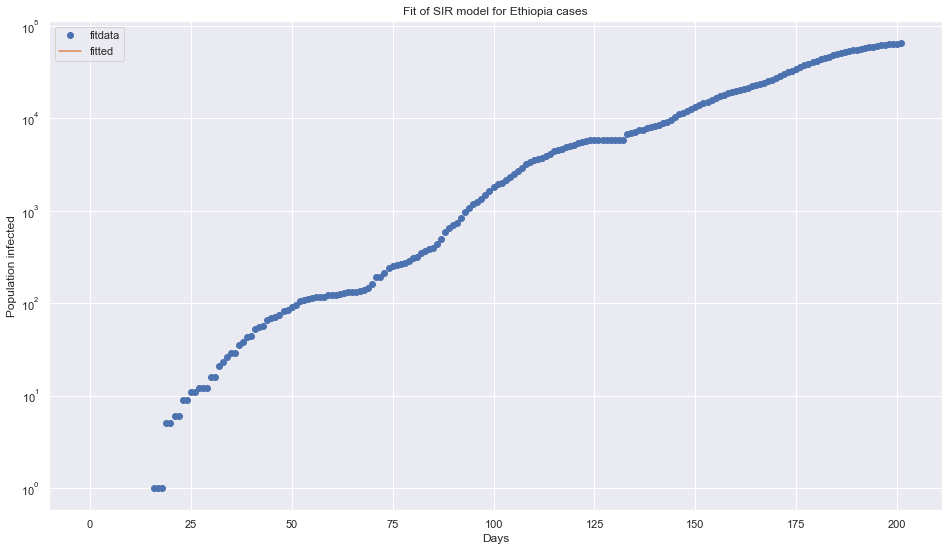

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



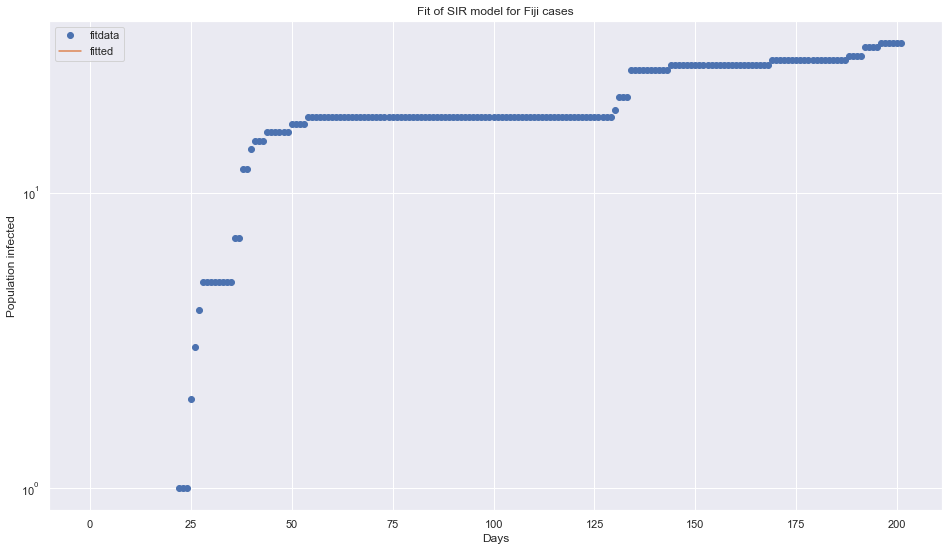

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



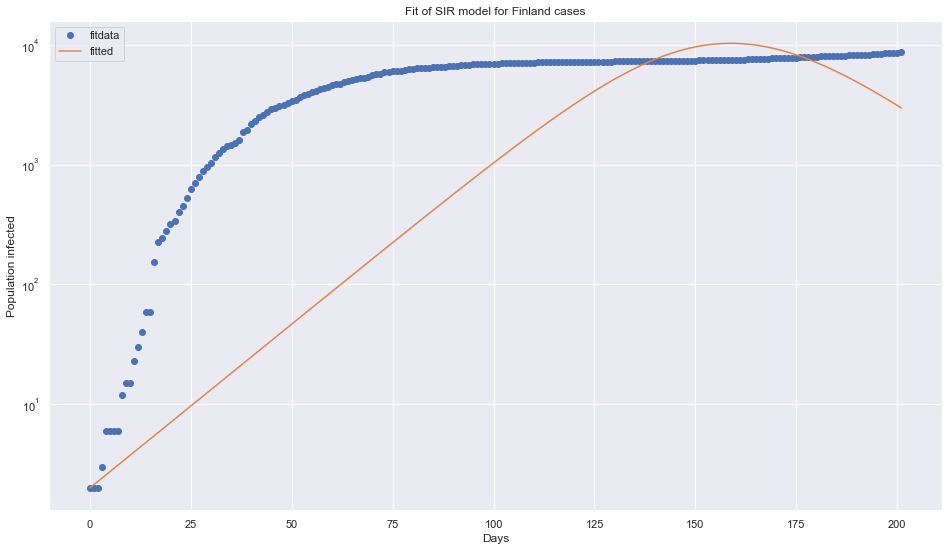

Optimal parameters: beta = 0.4502479417352552  and gamma =  0.3872390469816427
Basic Reproduction Number R0  1.1627131748328041
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



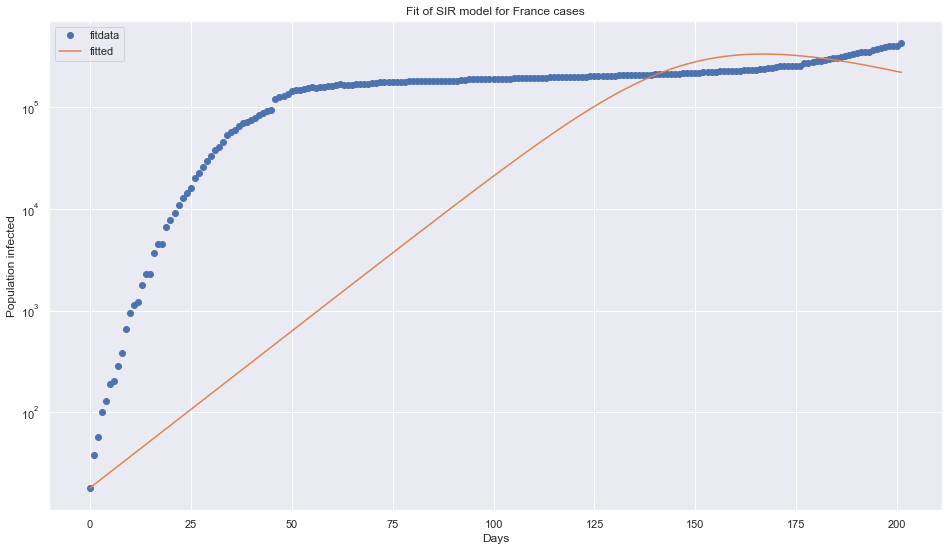

Optimal parameters: beta = 0.10214800595138371  and gamma =  0.03106246986500944
Basic Reproduction Number R0  3.2884701826769134
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



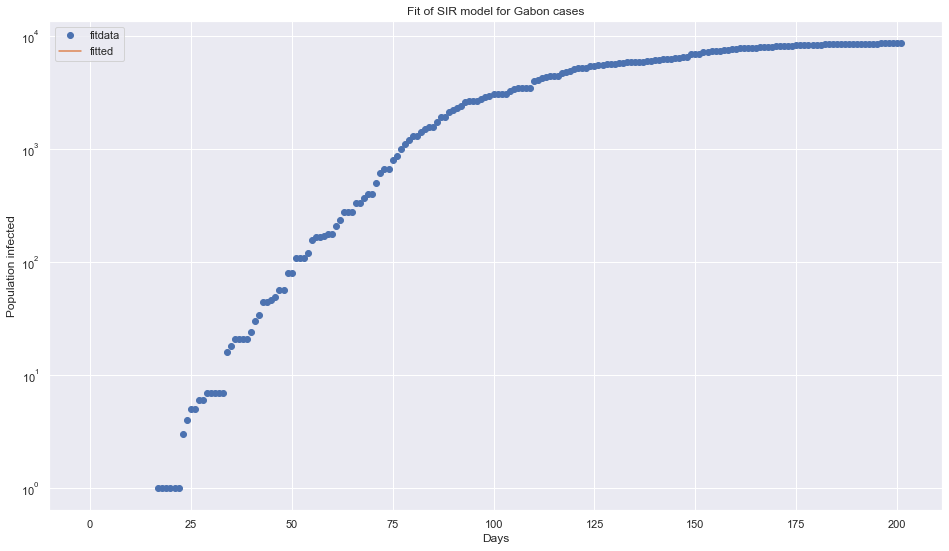

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



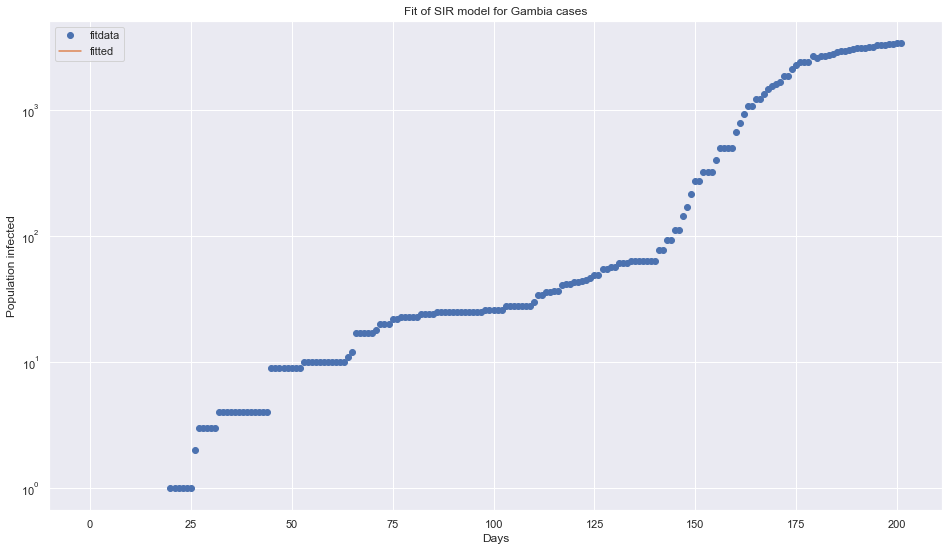

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


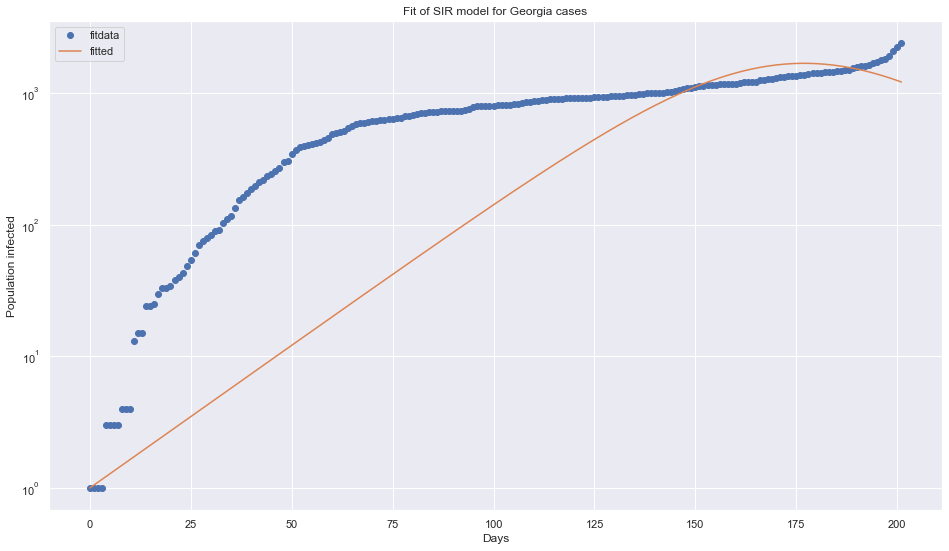

Optimal parameters: beta = 0.869421109966665  and gamma =  0.8194498139725815
Basic Reproduction Number R0  1.0609815209449245
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



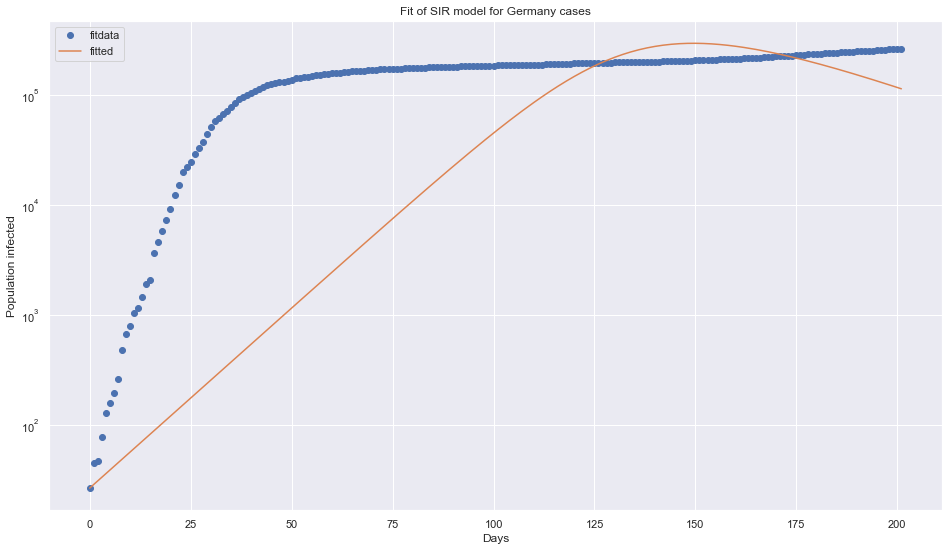

Optimal parameters: beta = 0.11383548297936799  and gamma =  0.03852607432472092
Basic Reproduction Number R0  2.954764661976564
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



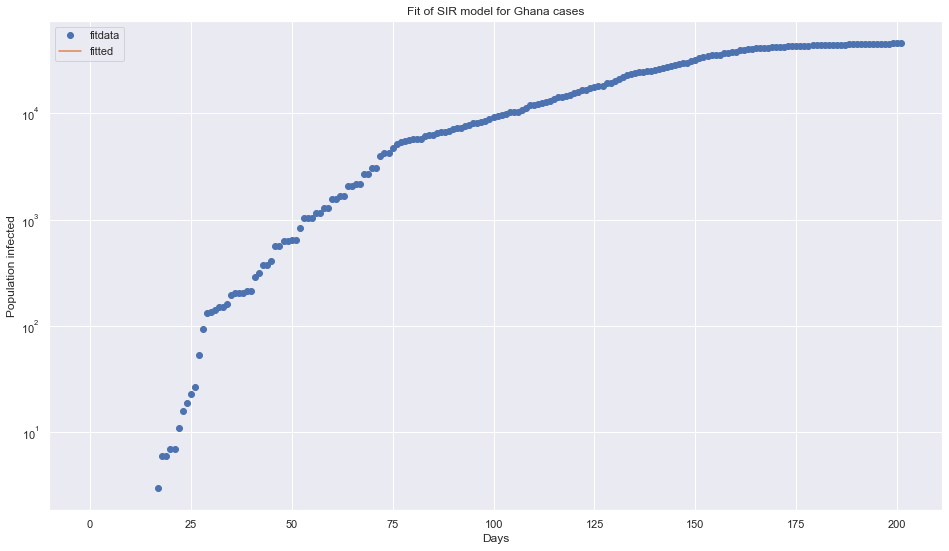

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



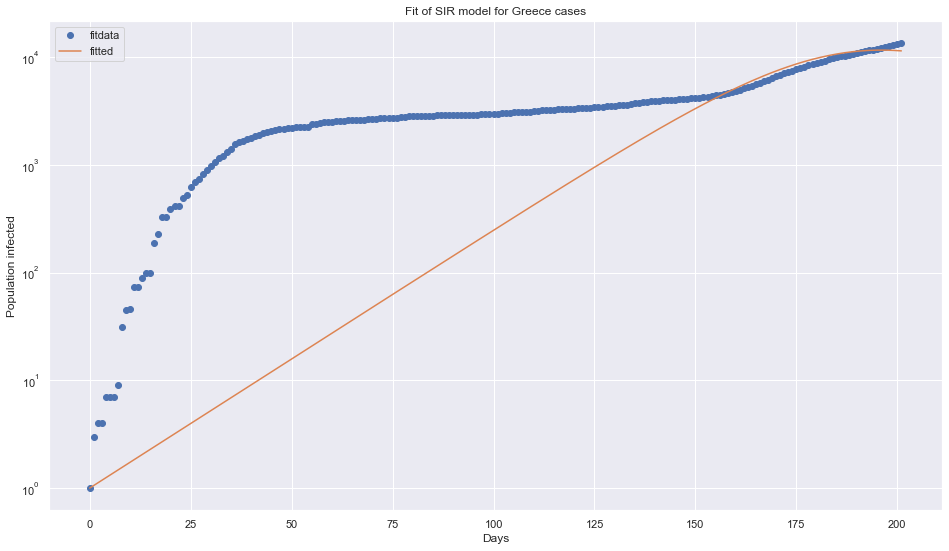

Optimal parameters: beta = 0.37188554853249556  and gamma =  0.3166893411651289
Basic Reproduction Number R0  1.1742913328383418
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



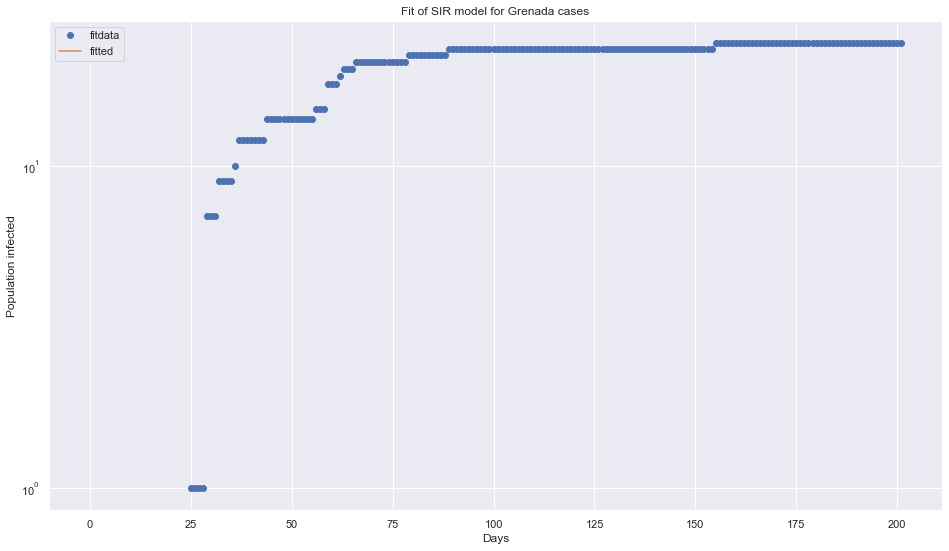

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



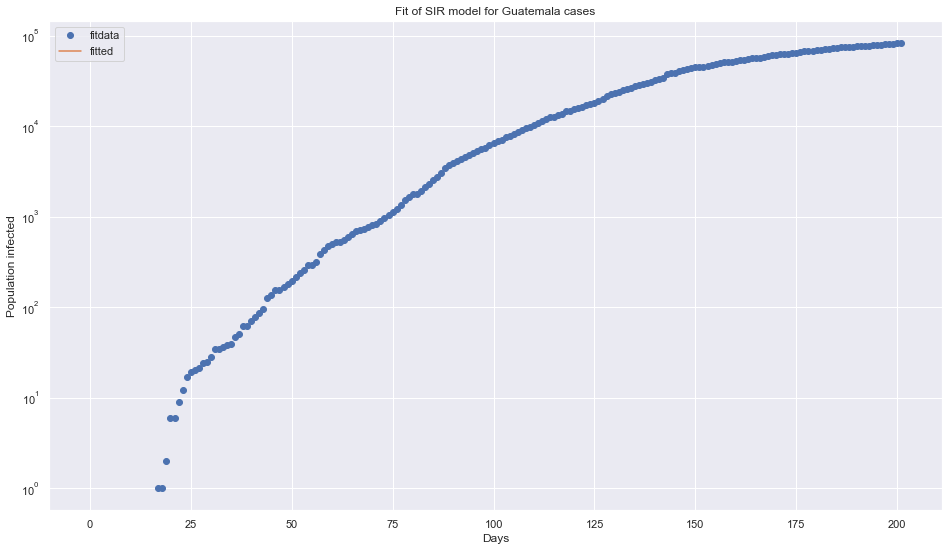

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



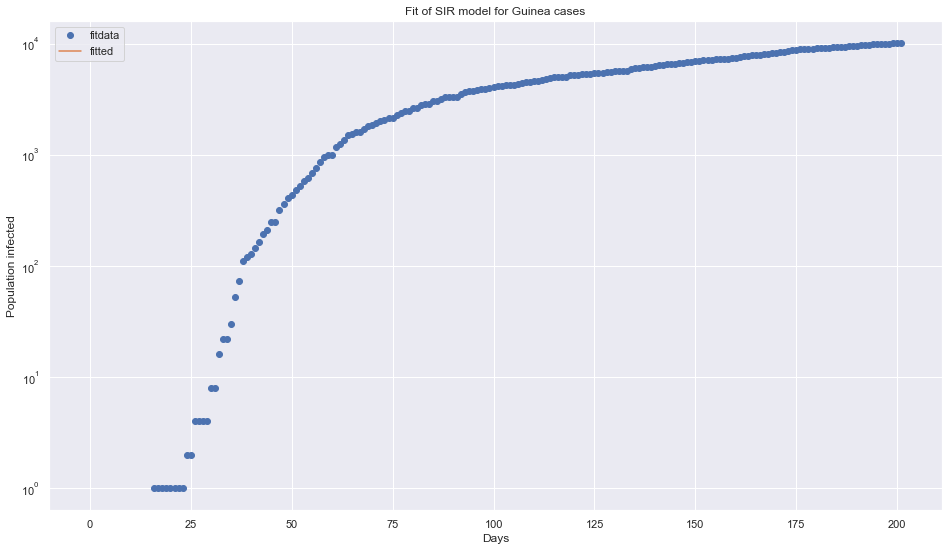

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



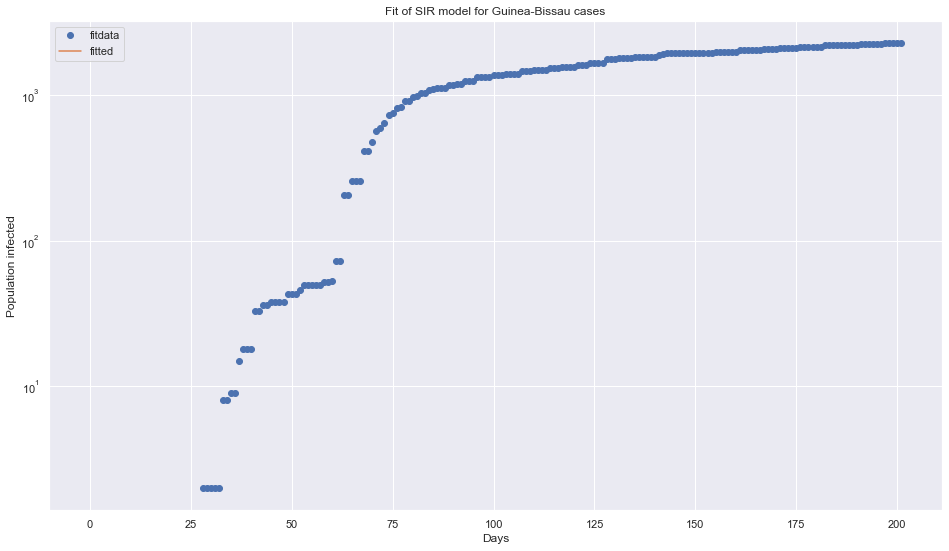

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



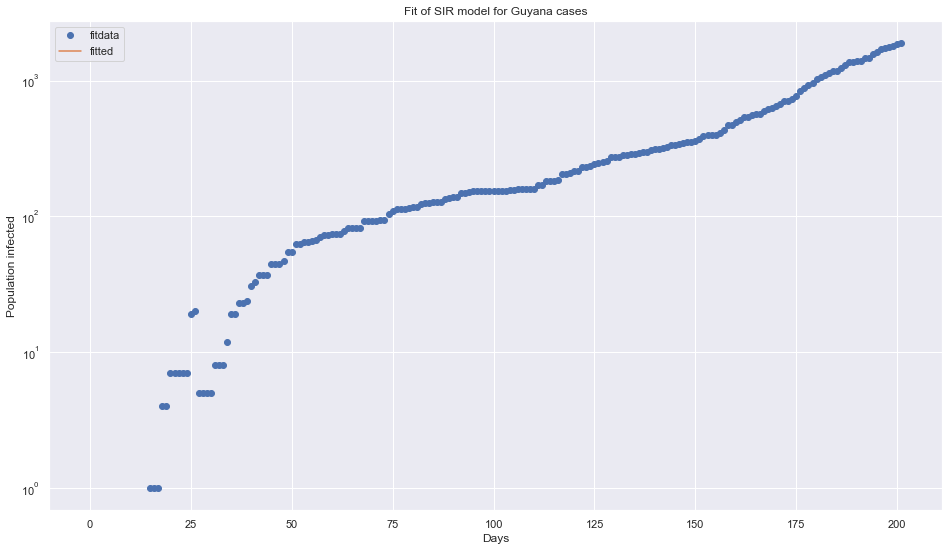

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



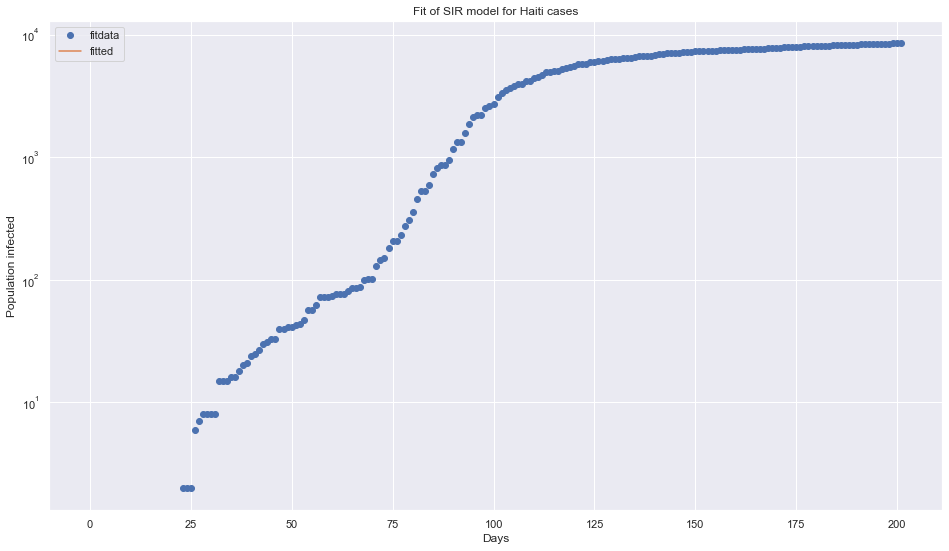

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



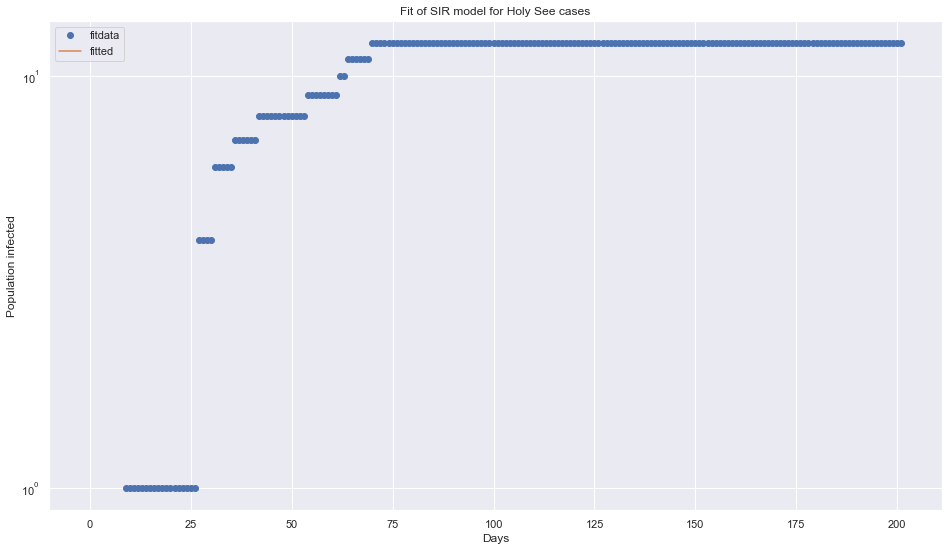

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



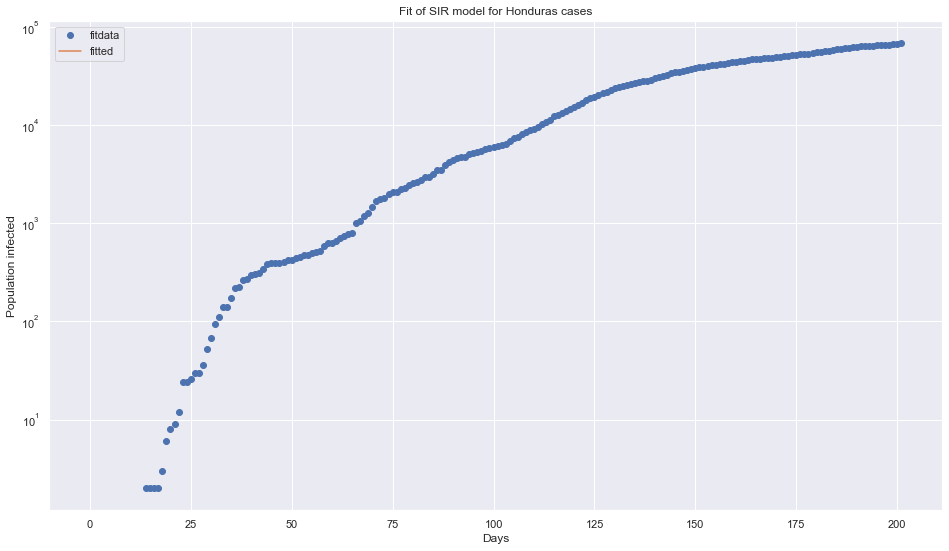

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



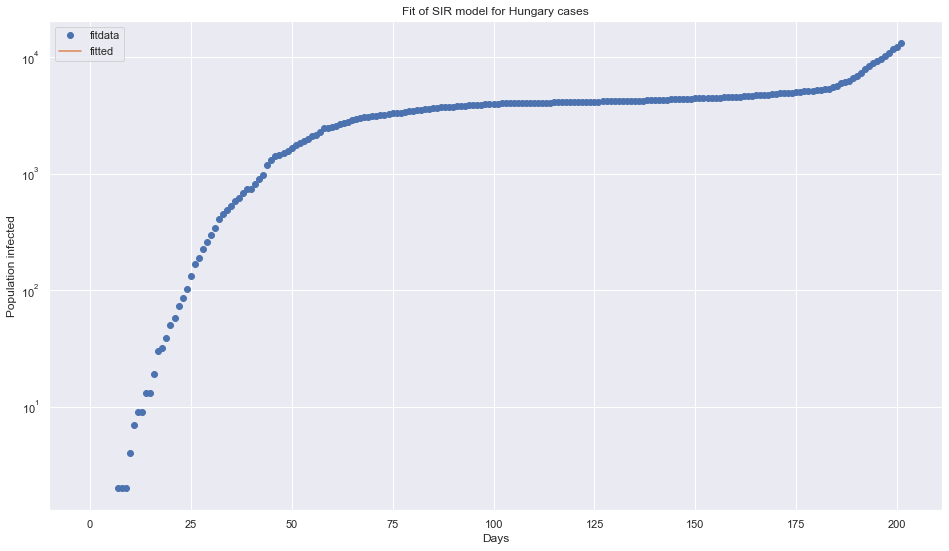

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



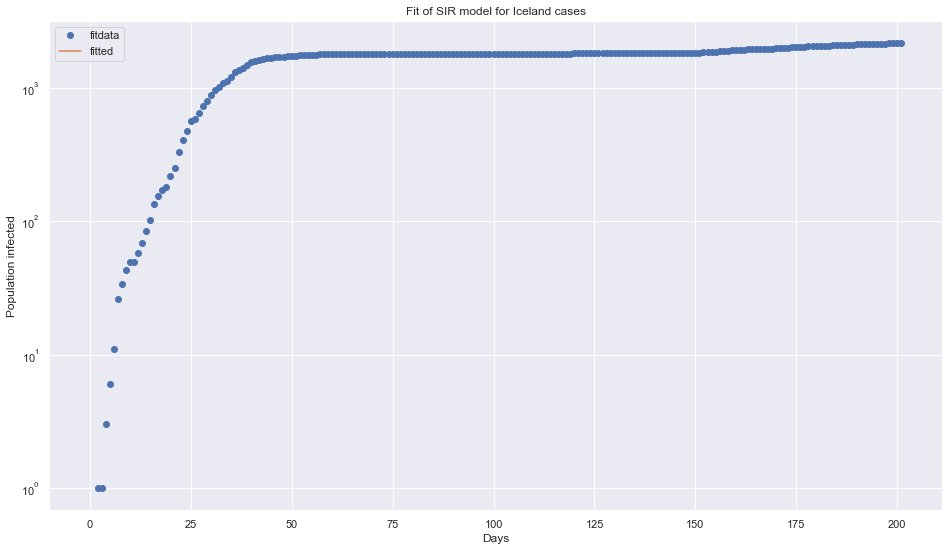

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



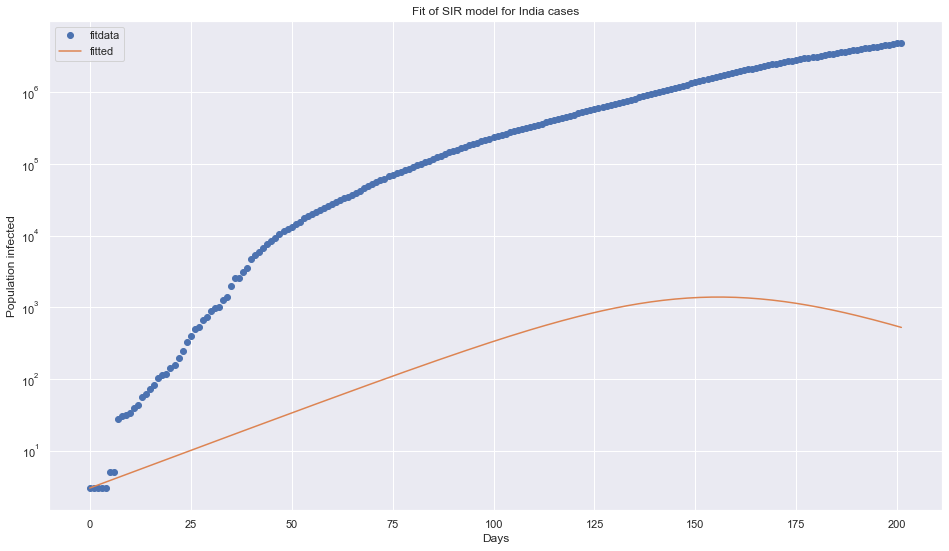

Optimal parameters: beta = 0.9273039702653745  and gamma =  0.8788657082026067
Basic Reproduction Number R0  1.055114520467331
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



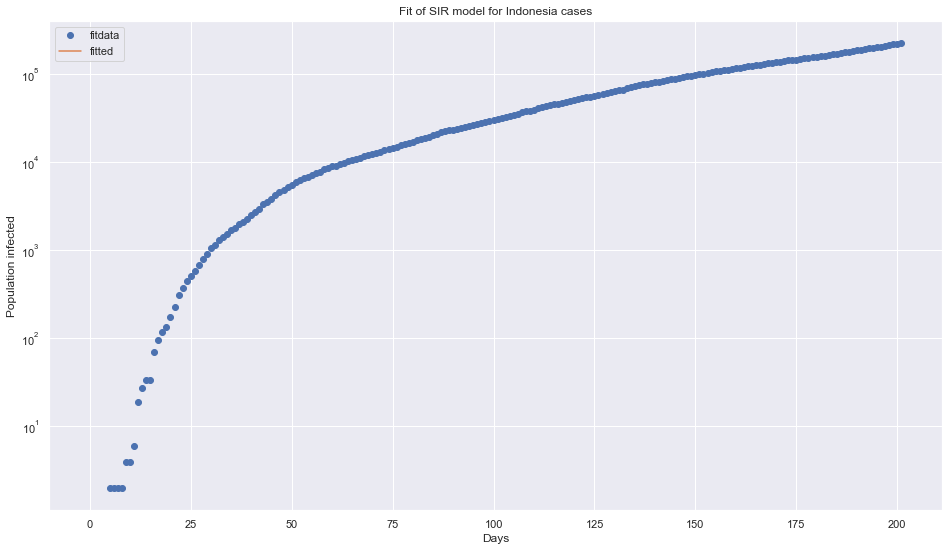

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



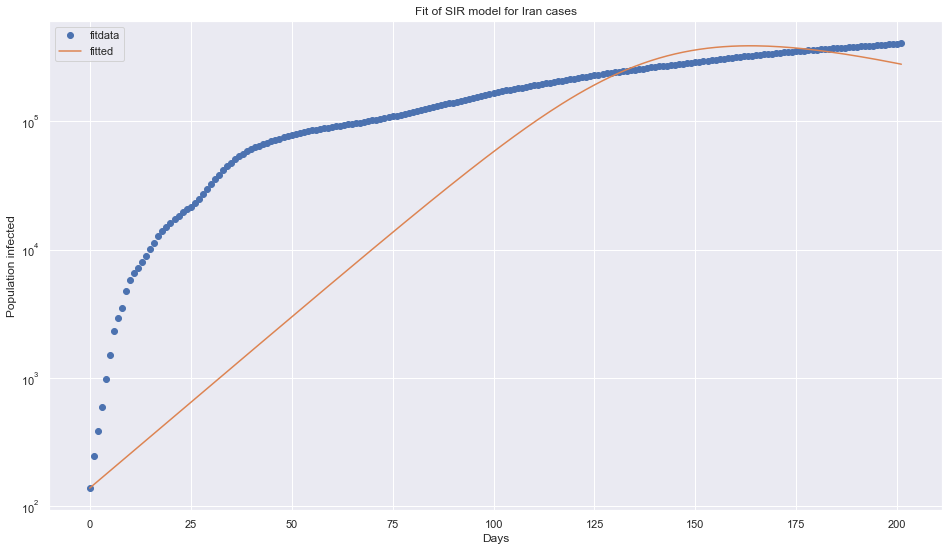

Optimal parameters: beta = 0.08328380597928788  and gamma =  0.021832014511949892
Basic Reproduction Number R0  3.8147558913403046
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



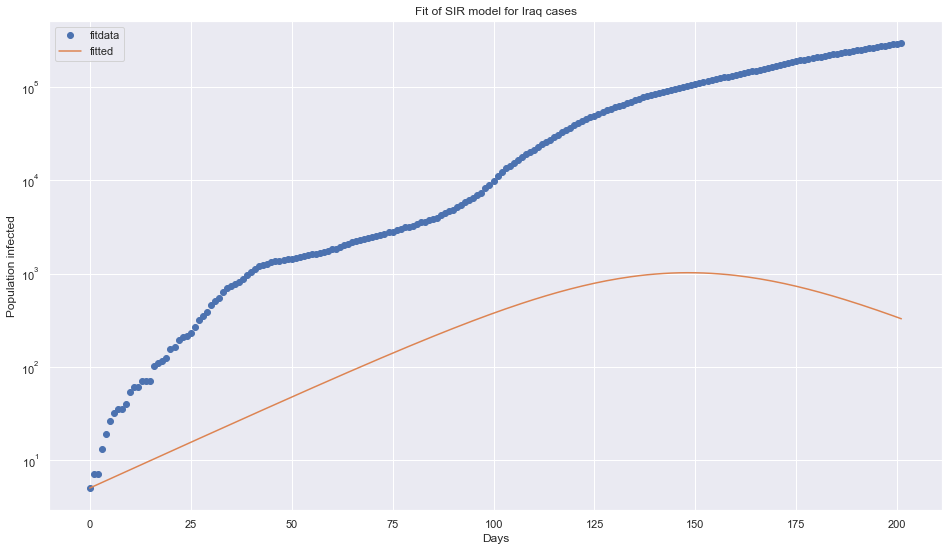

Optimal parameters: beta = 1.0118858719425488  and gamma =  0.9666349639314826
Basic Reproduction Number R0  1.0468128194194657
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



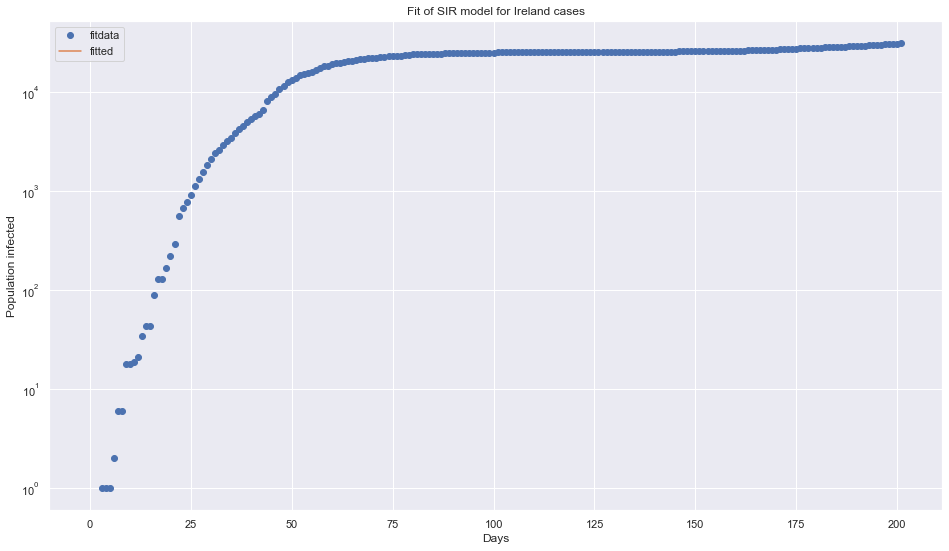

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



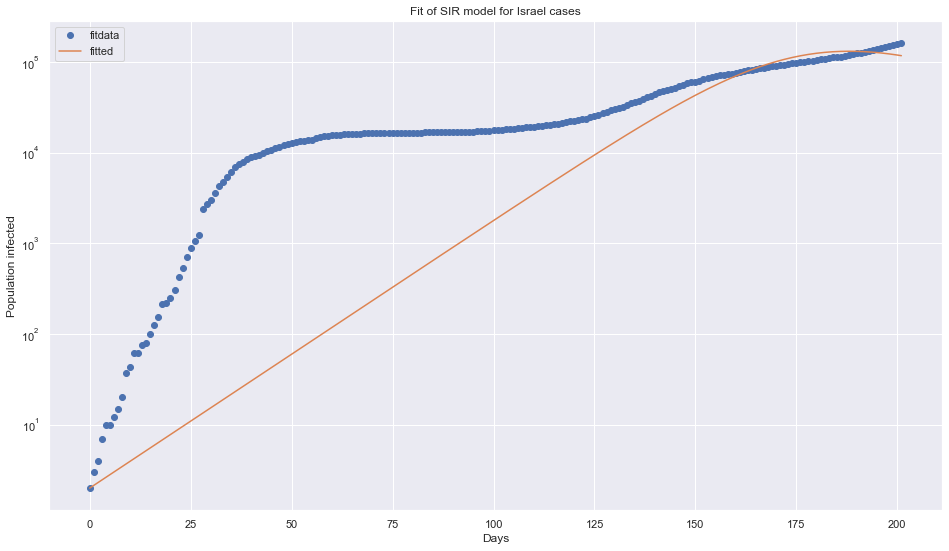

Optimal parameters: beta = 0.14590085366345742  and gamma =  0.07789594727195957
Basic Reproduction Number R0  1.8730223942725936
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



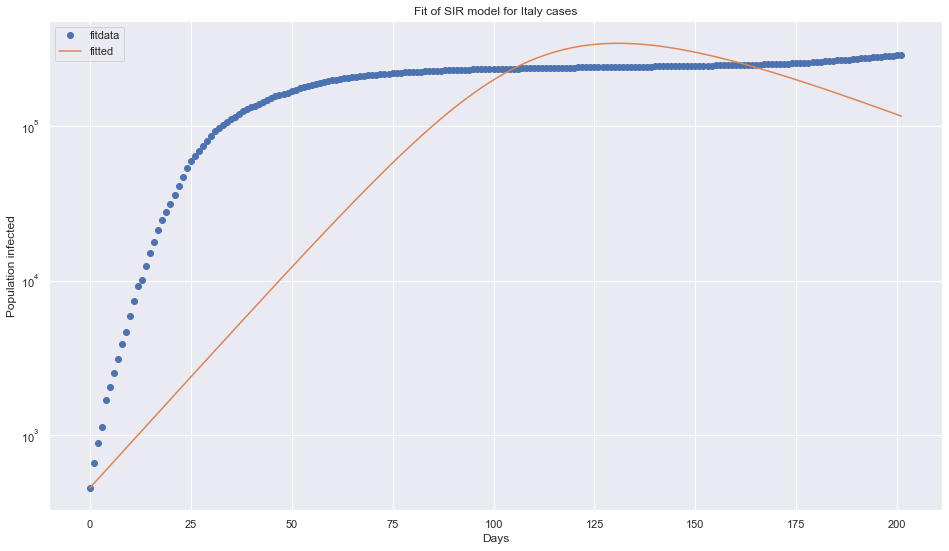

Optimal parameters: beta = 0.09413628091989112  and gamma =  0.02783915555271406
Basic Reproduction Number R0  3.3814344958000606
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



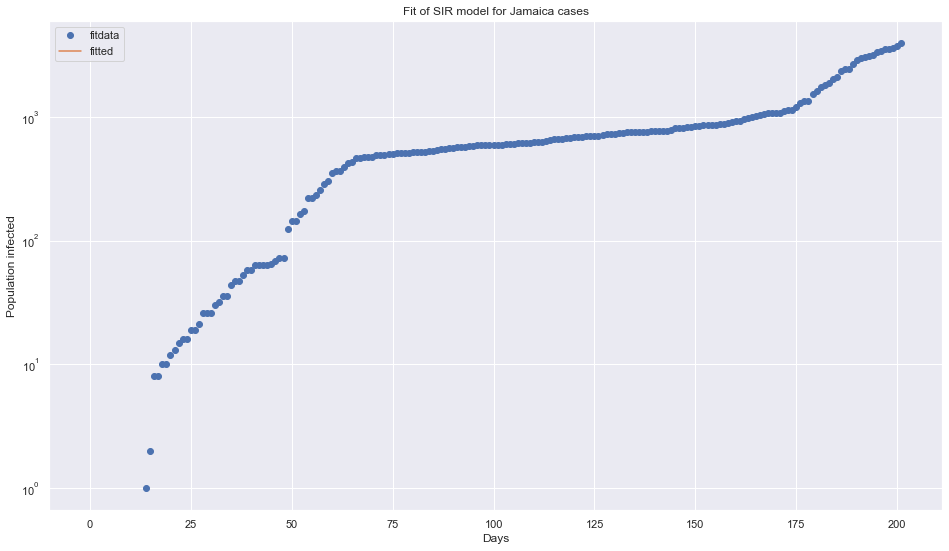

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



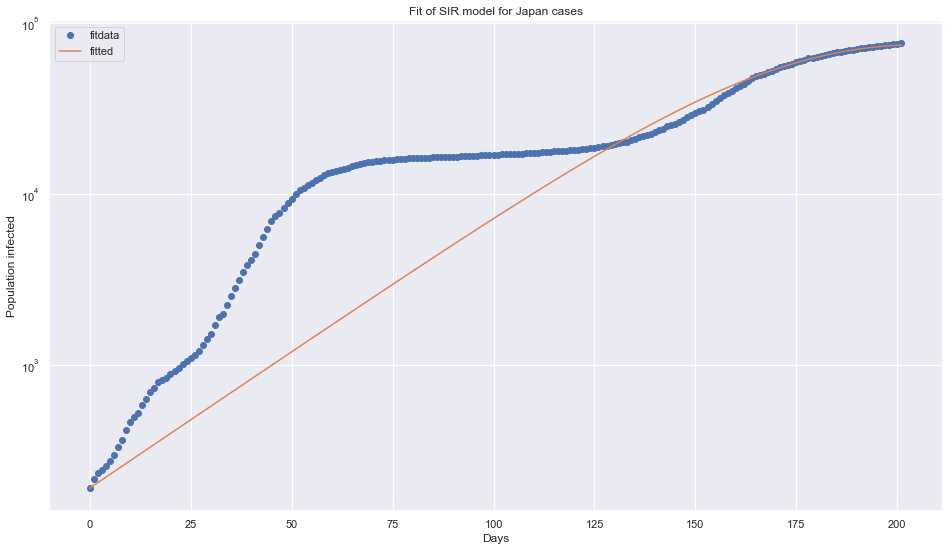

Optimal parameters: beta = 0.10206063565674056  and gamma =  0.06530653991395693
Basic Reproduction Number R0  1.5627934934419754
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



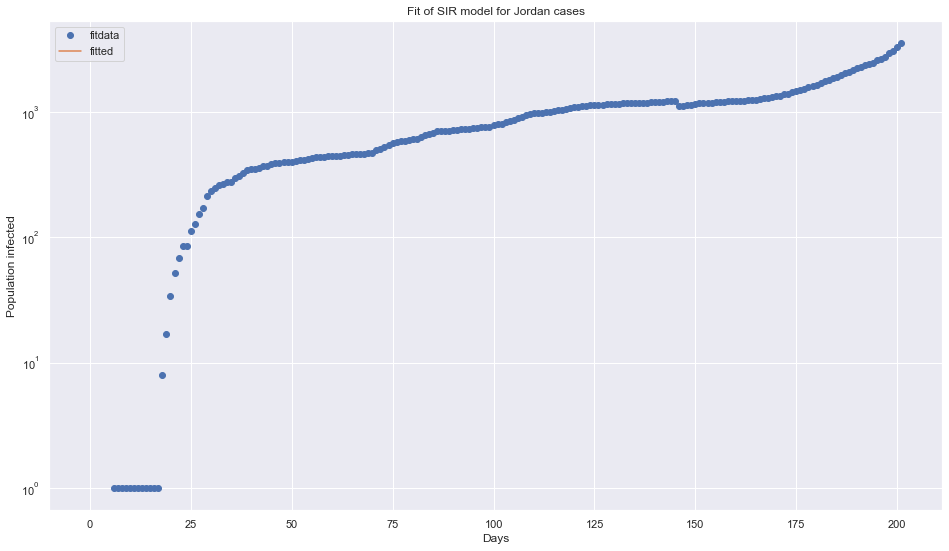

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



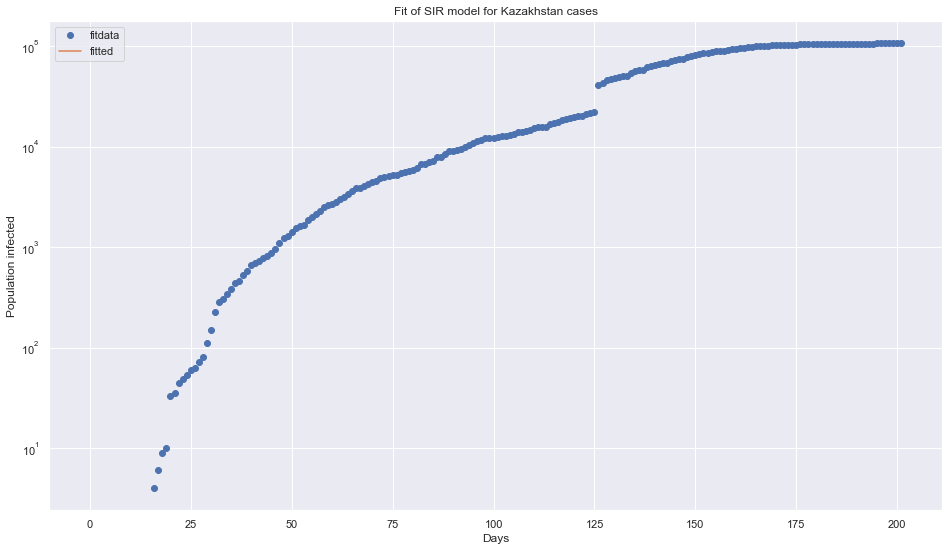

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



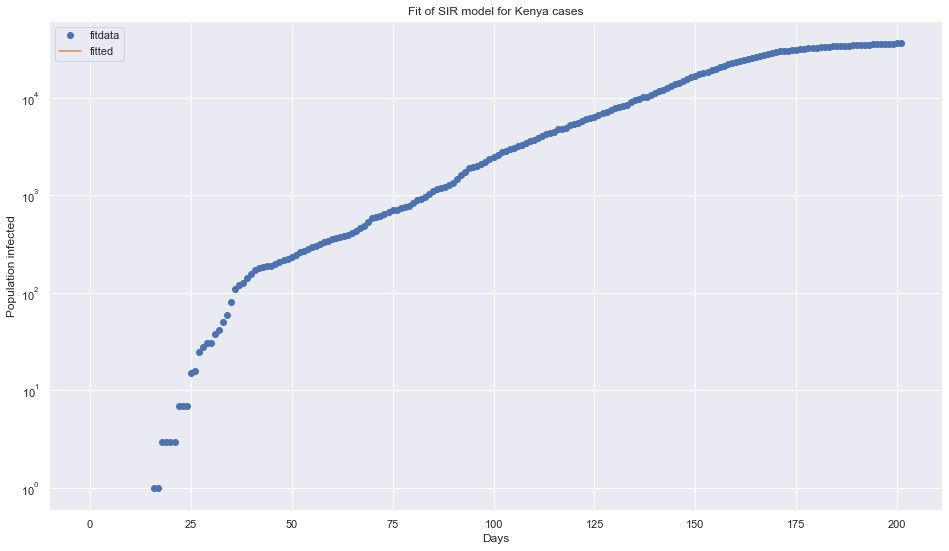

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


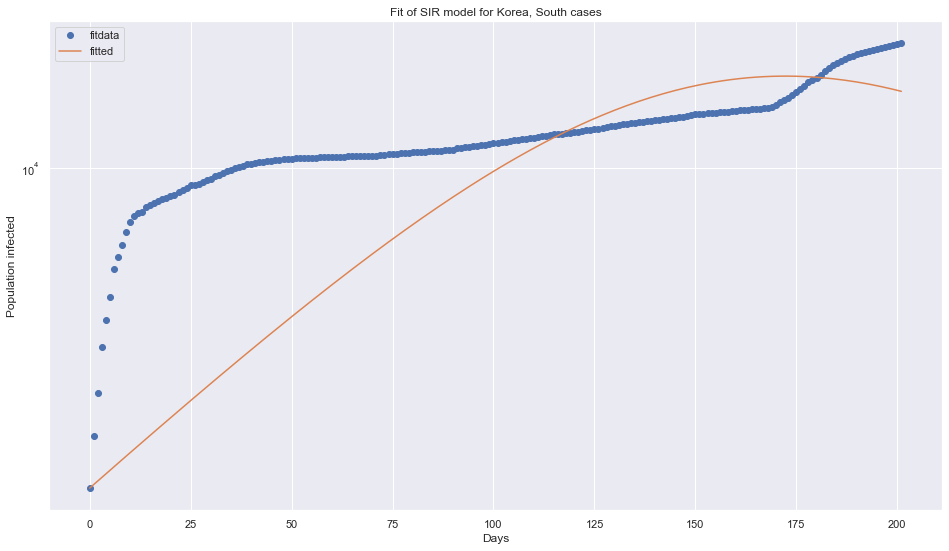

Optimal parameters: beta = 0.12912522100153834  and gamma =  0.10601184414735852
Basic Reproduction Number R0  1.218026363375509
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



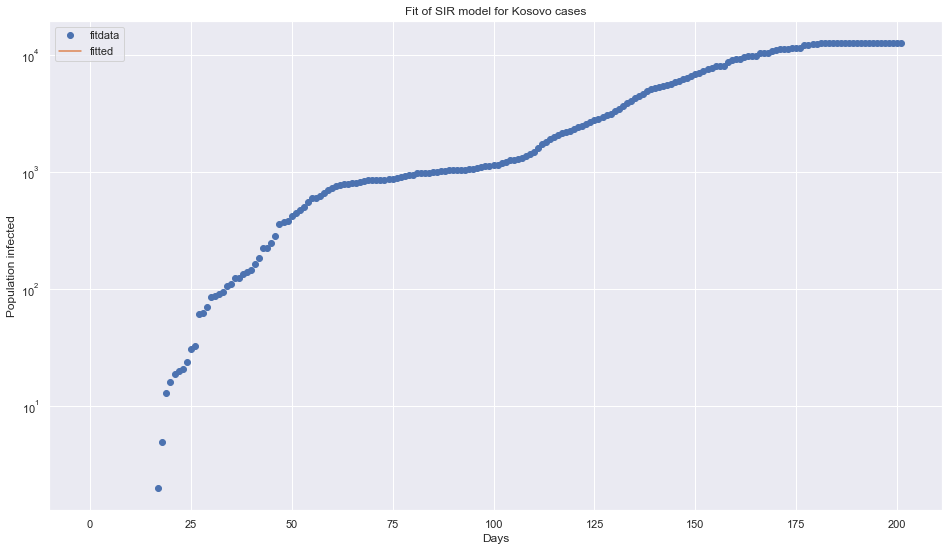

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



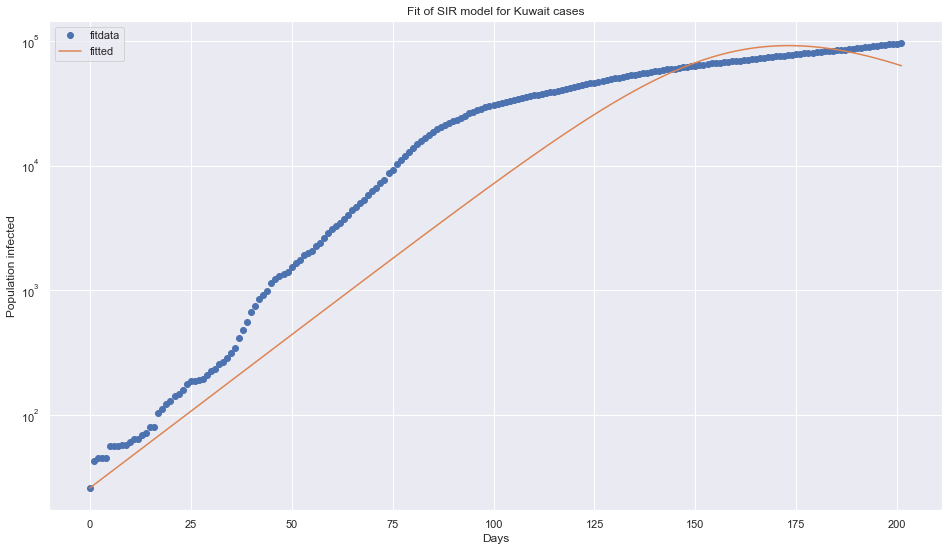

Optimal parameters: beta = 0.1429960686395074  and gamma =  0.08636471824209123
Basic Reproduction Number R0  1.6557232114006477
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



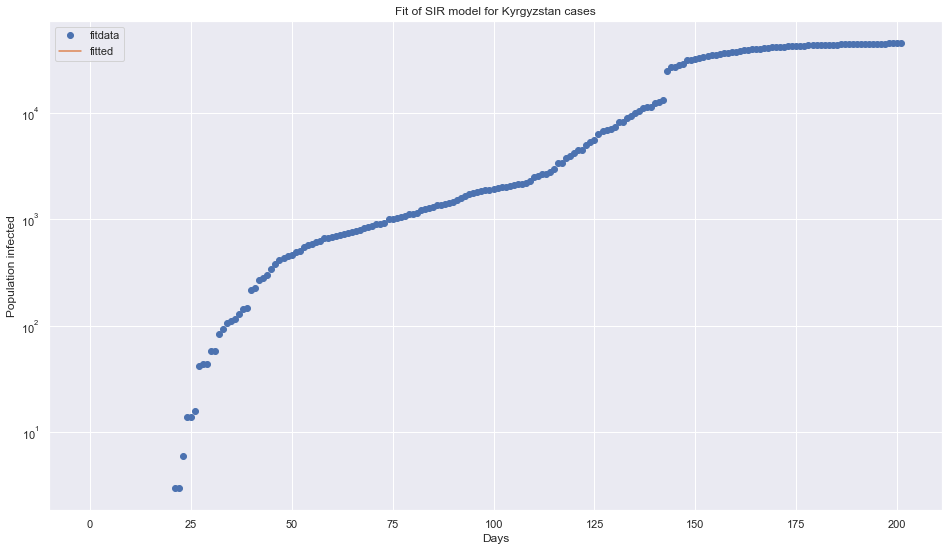

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



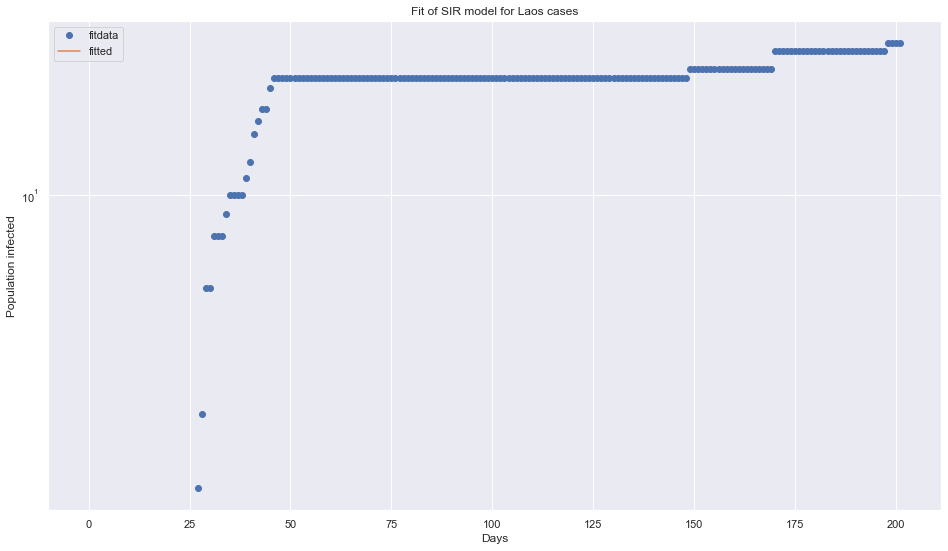

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



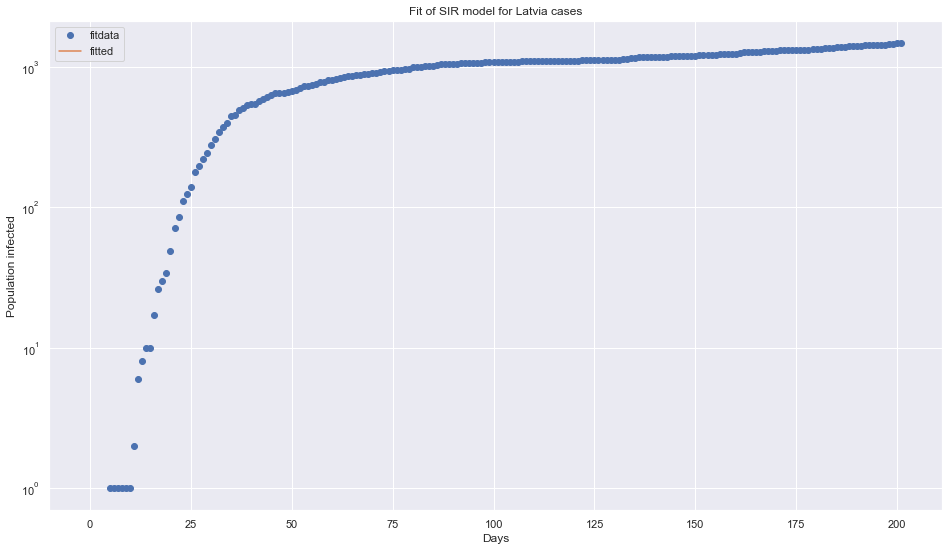

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



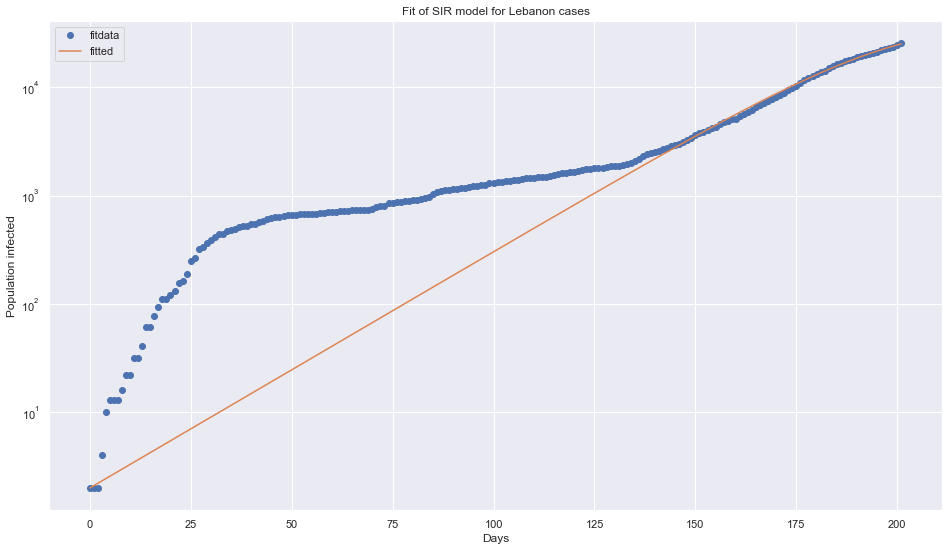

Optimal parameters: beta = 0.20577617849067004  and gamma =  0.1555277217436405
Basic Reproduction Number R0  1.323083603255342
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



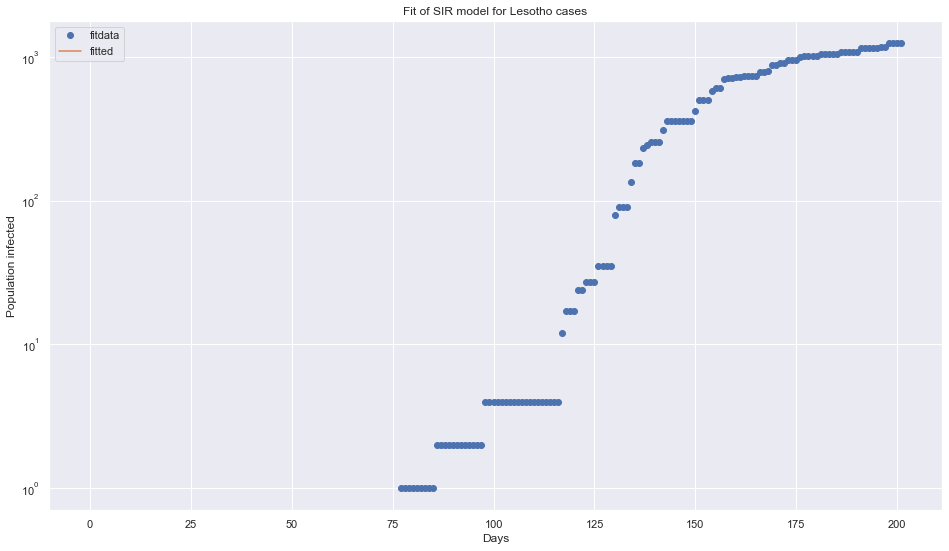

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



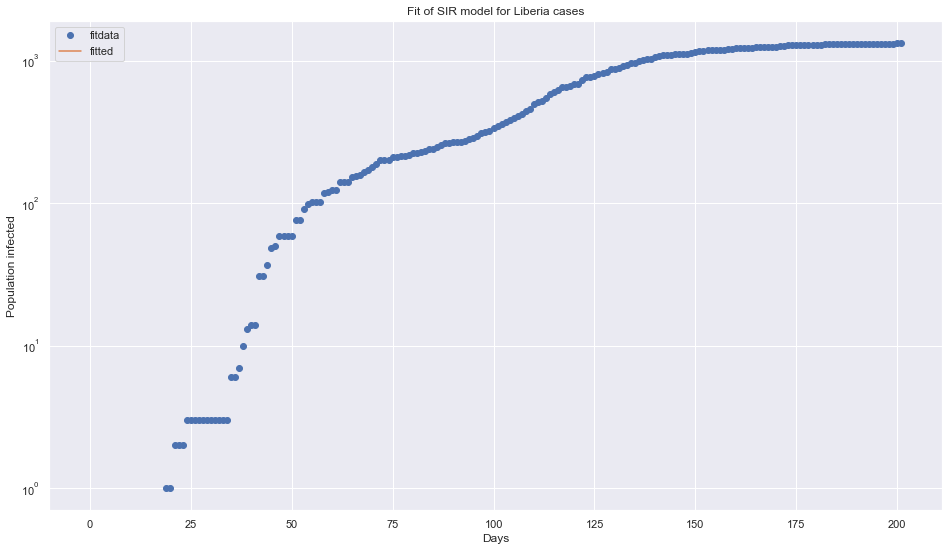

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



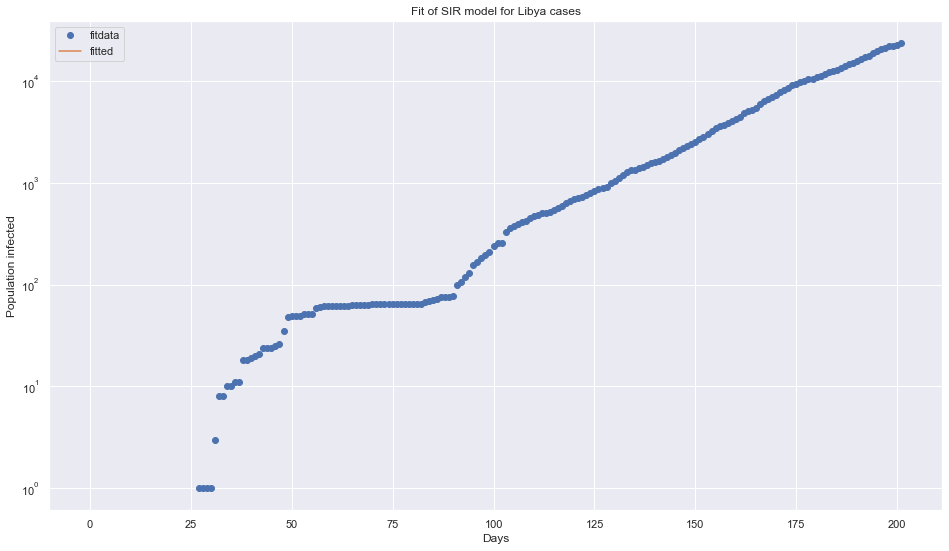

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



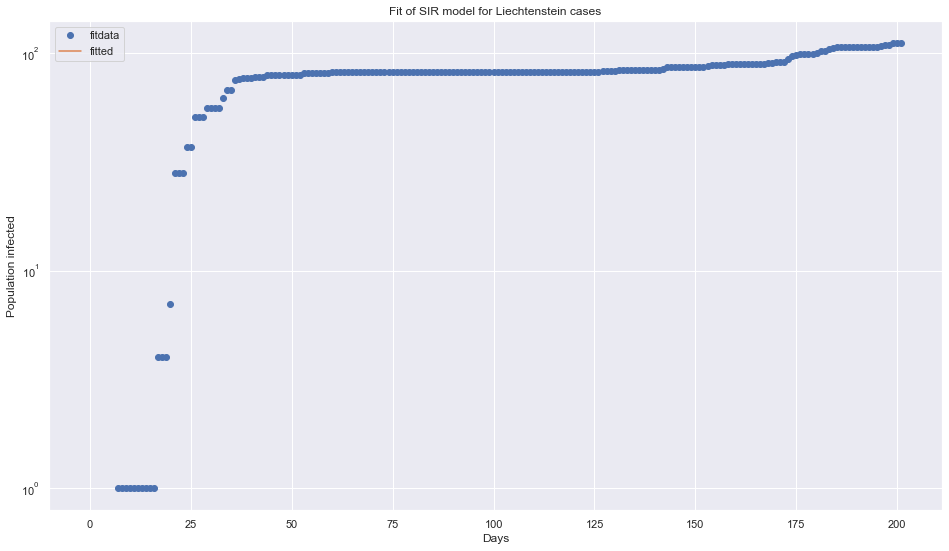

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



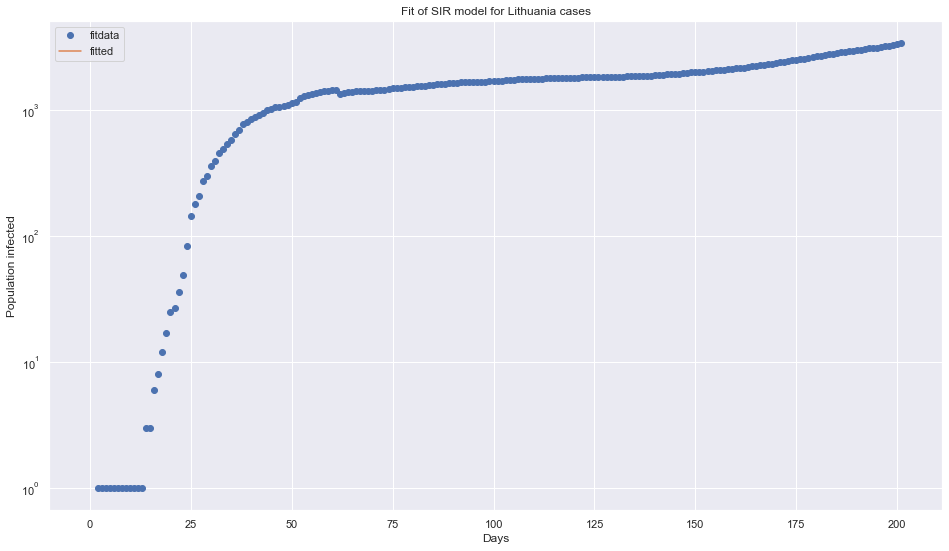

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



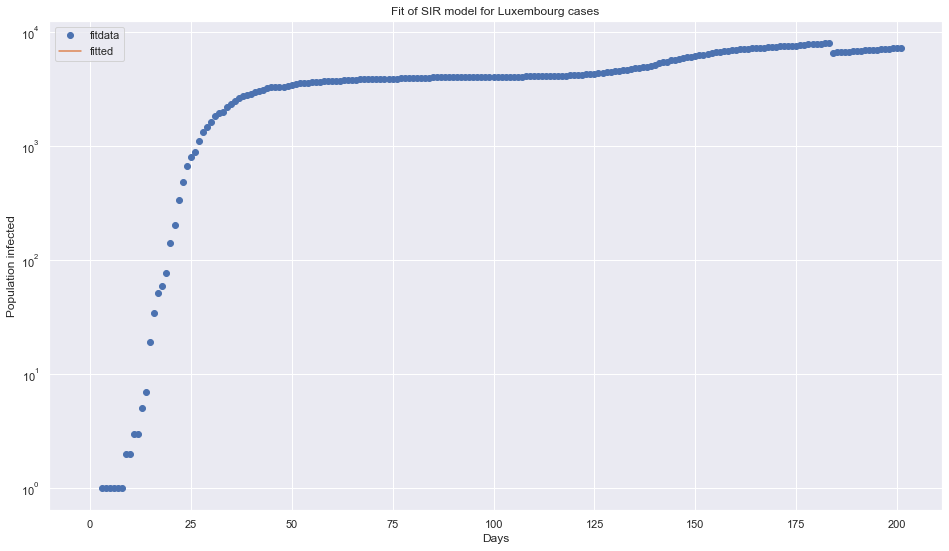

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



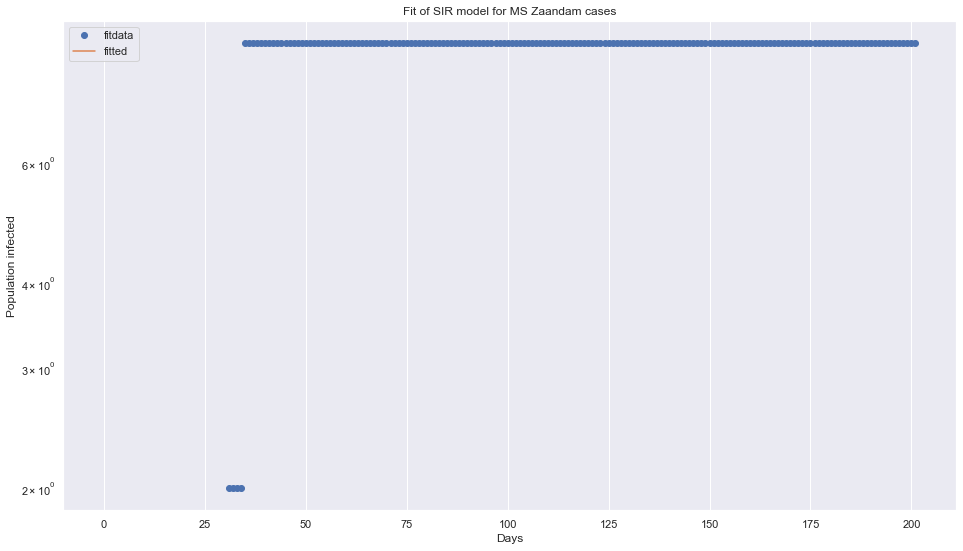

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



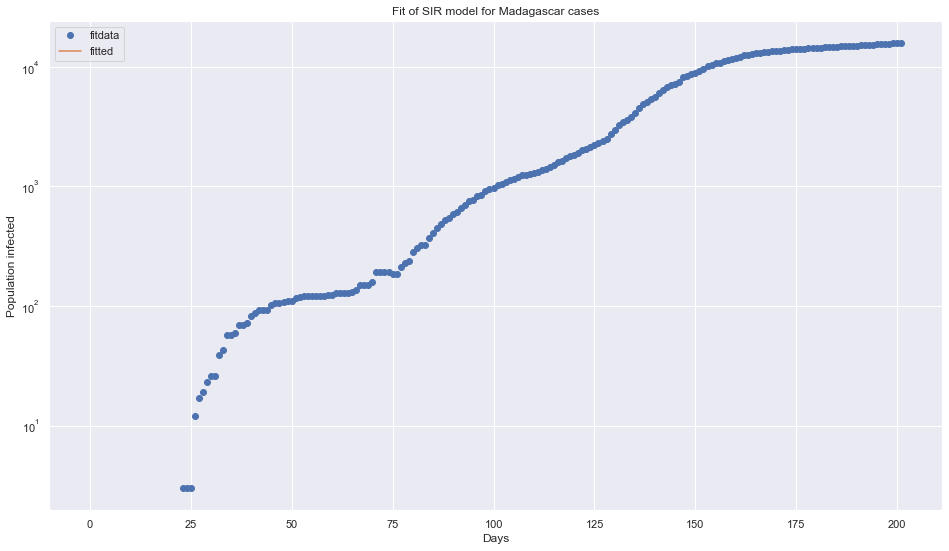

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



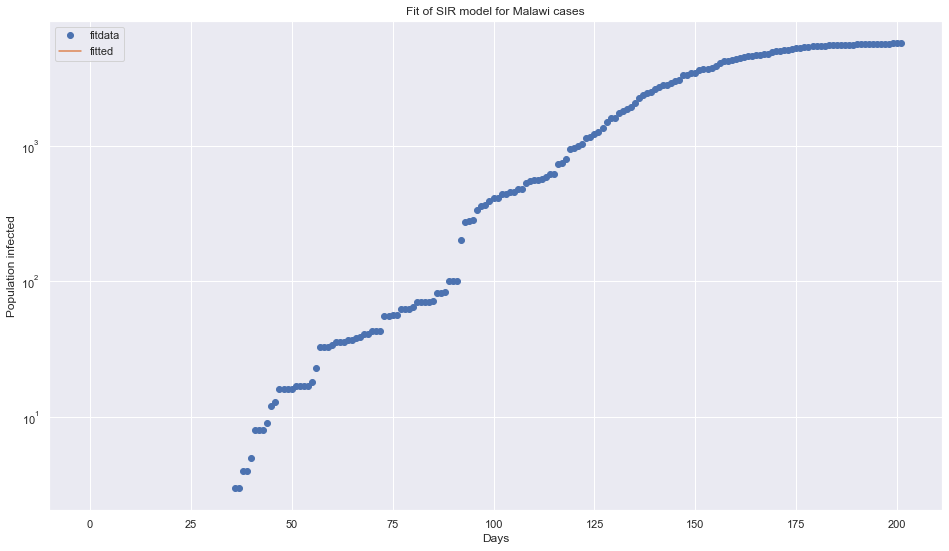

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


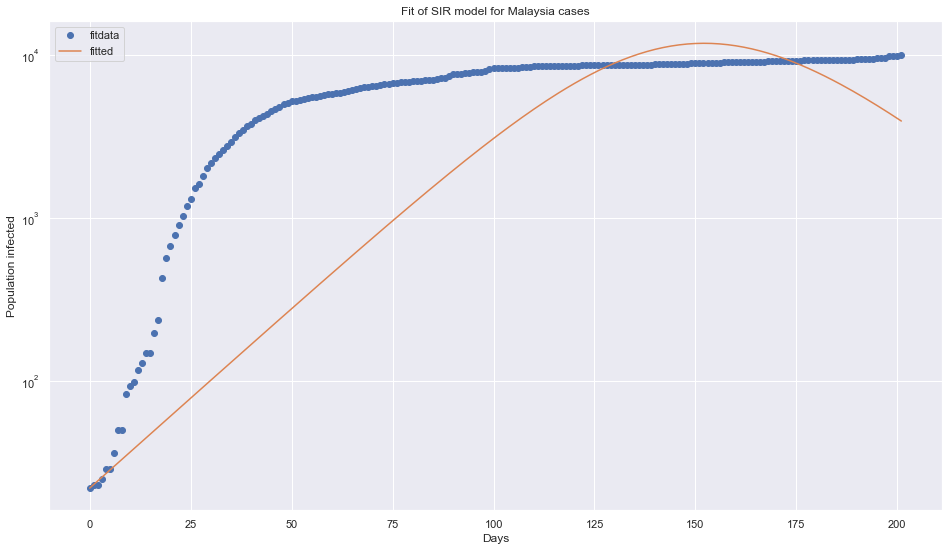

Optimal parameters: beta = 0.3404219203144274  and gamma =  0.289557631680211
Basic Reproduction Number R0  1.175662055042608
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



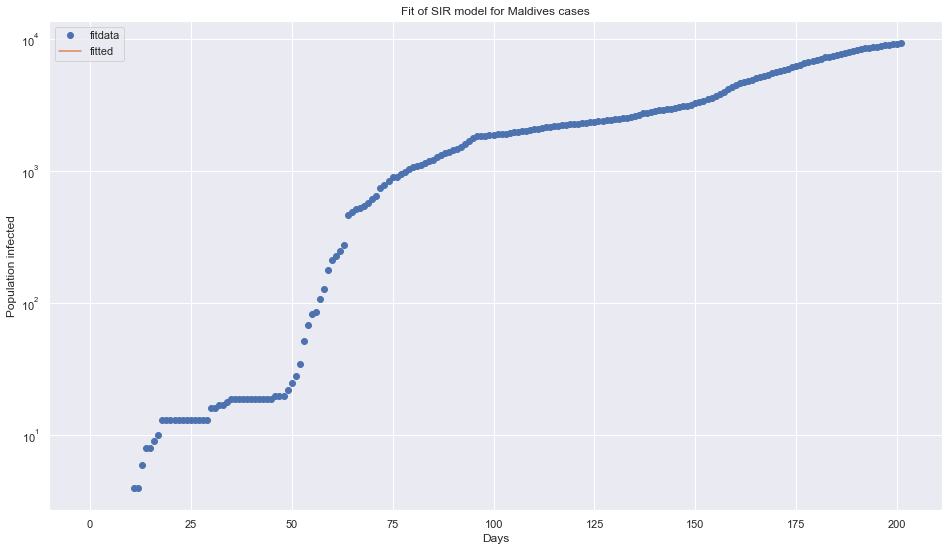

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



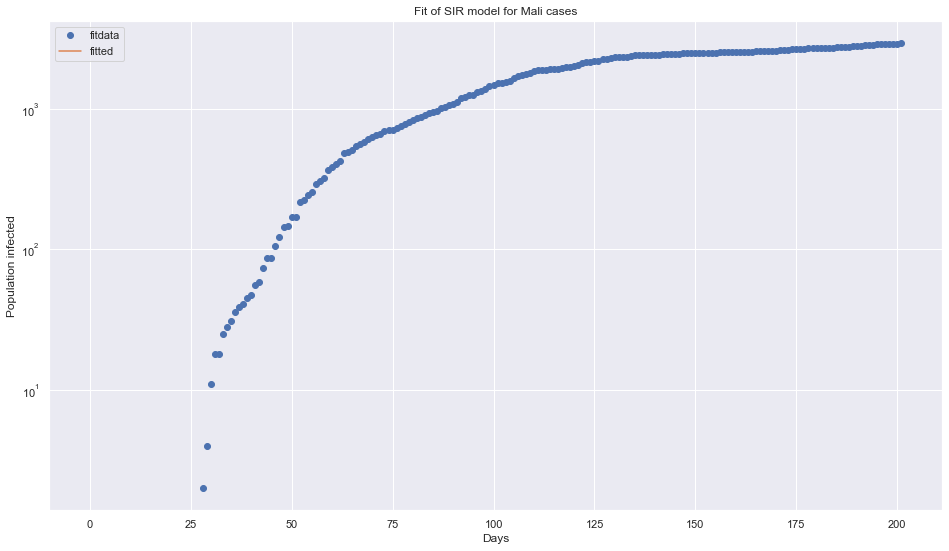

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



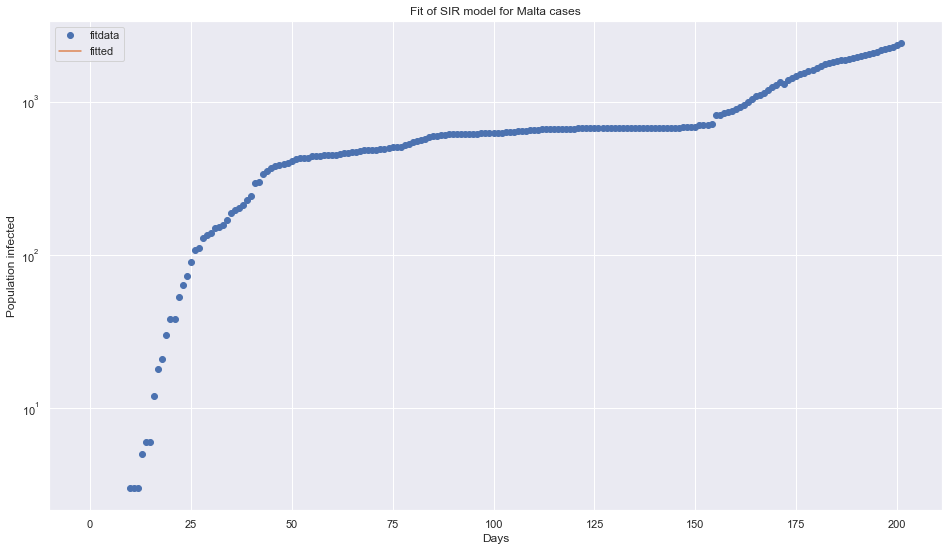

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



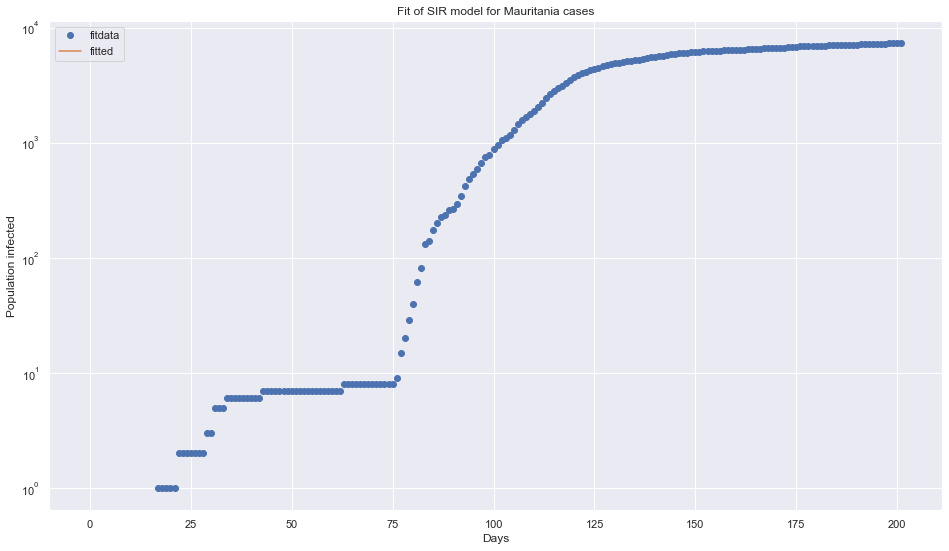

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



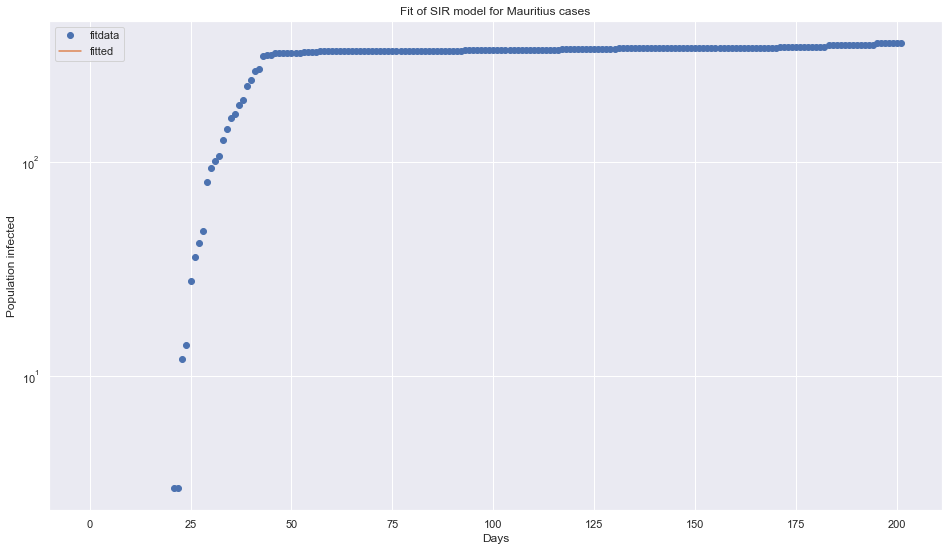

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



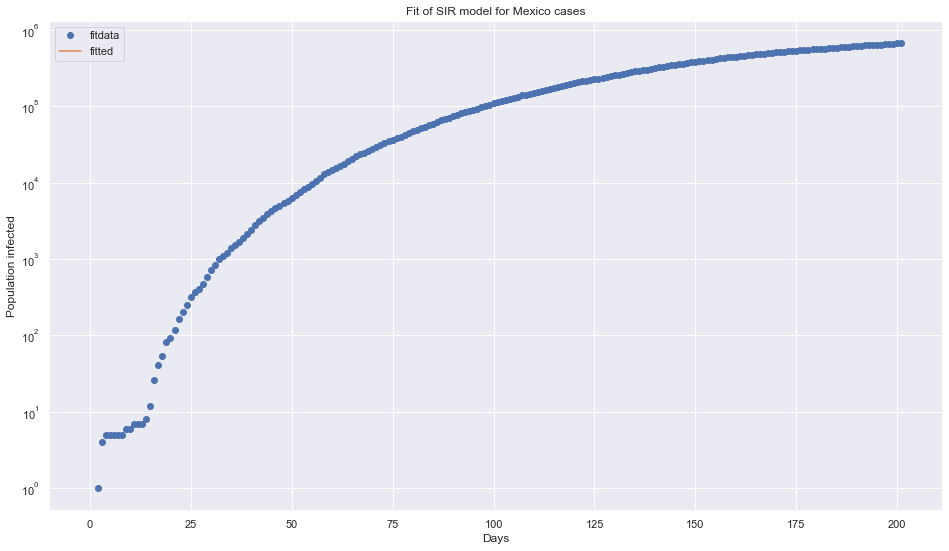

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



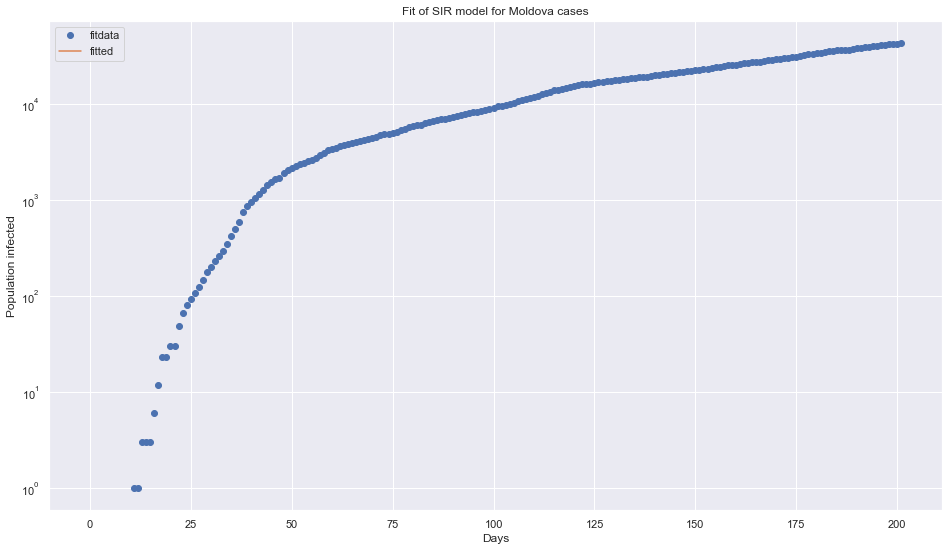

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



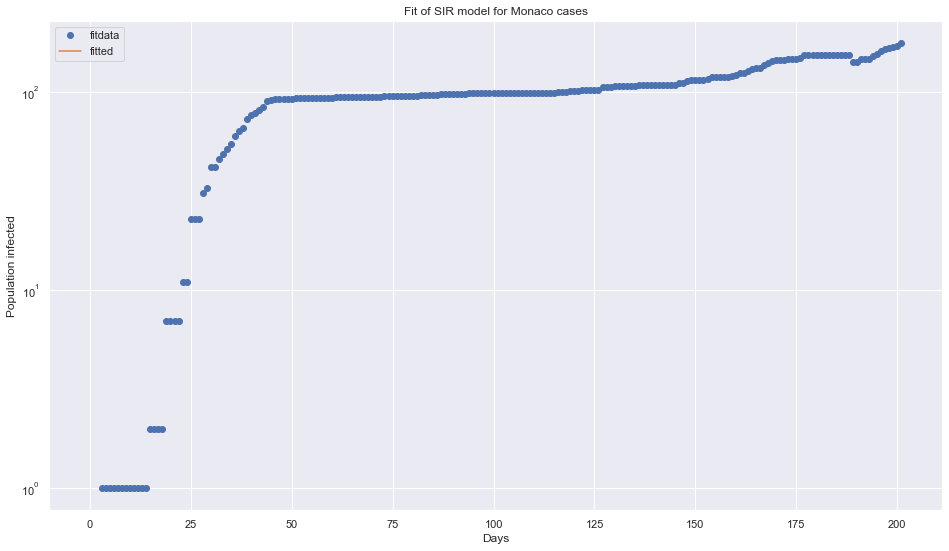

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



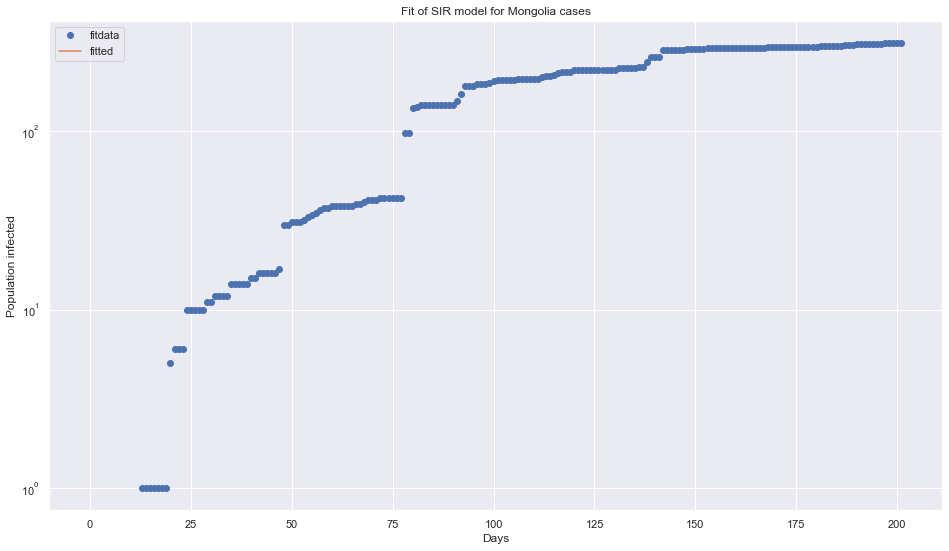

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



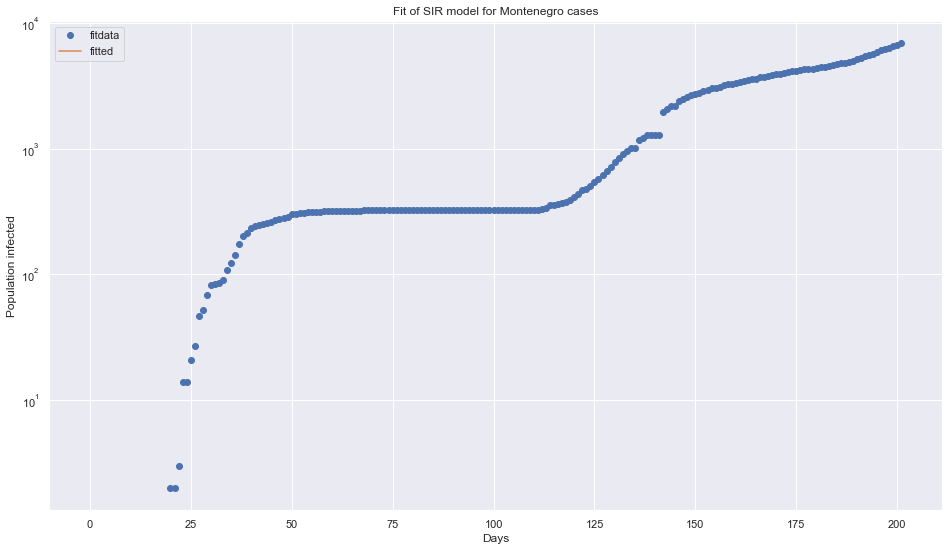

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



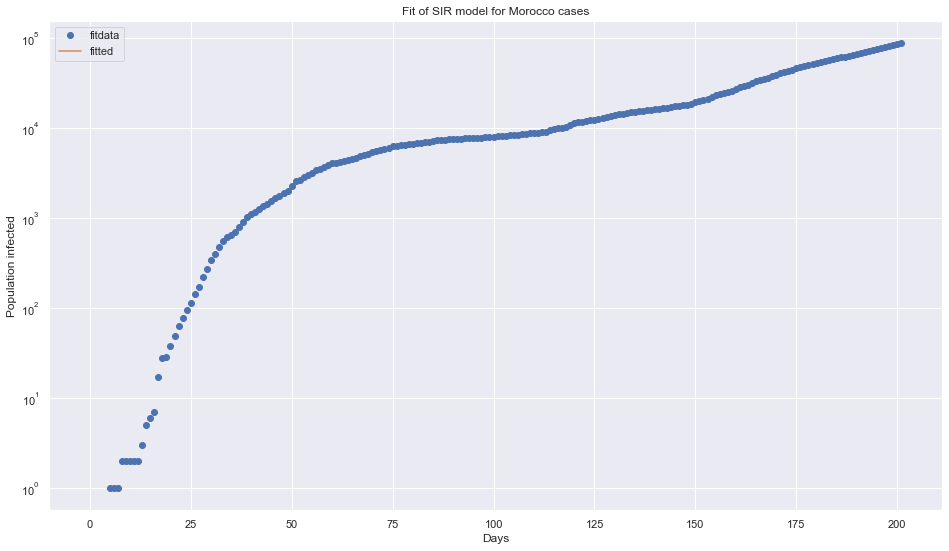

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



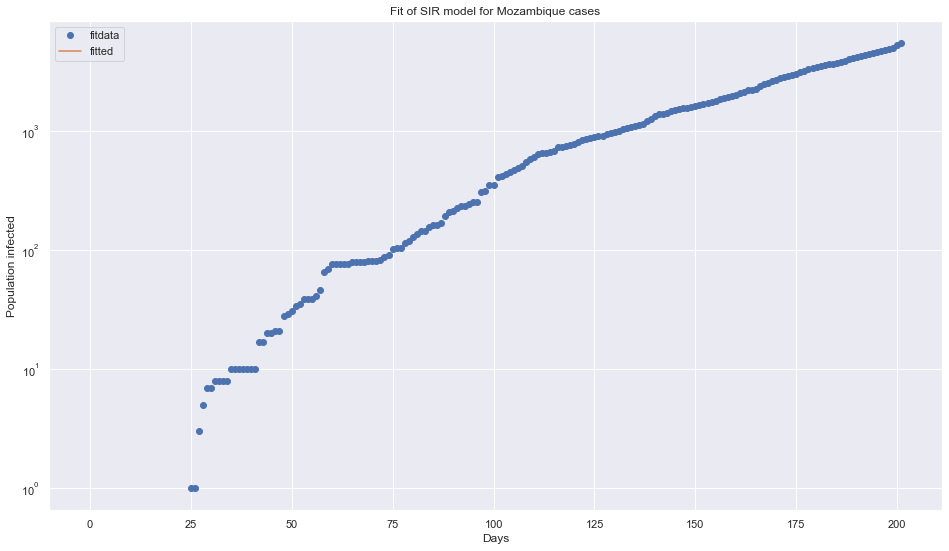

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



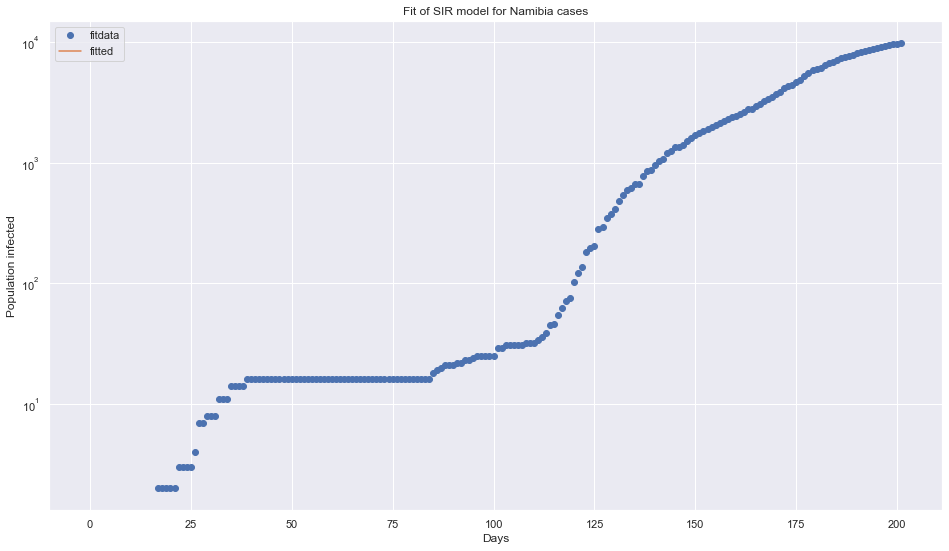

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



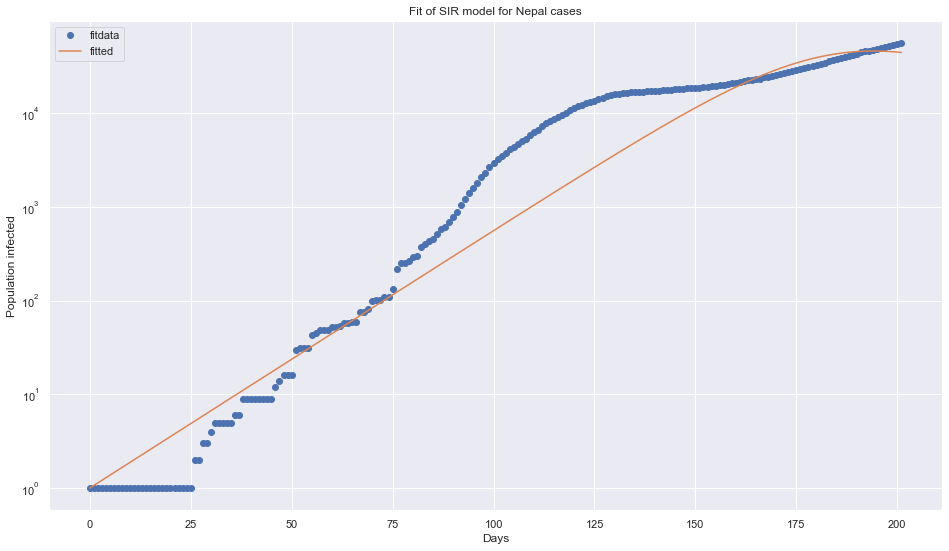

Optimal parameters: beta = 0.22045689314194616  and gamma =  0.15718910369991018
Basic Reproduction Number R0  1.4024947528349074
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



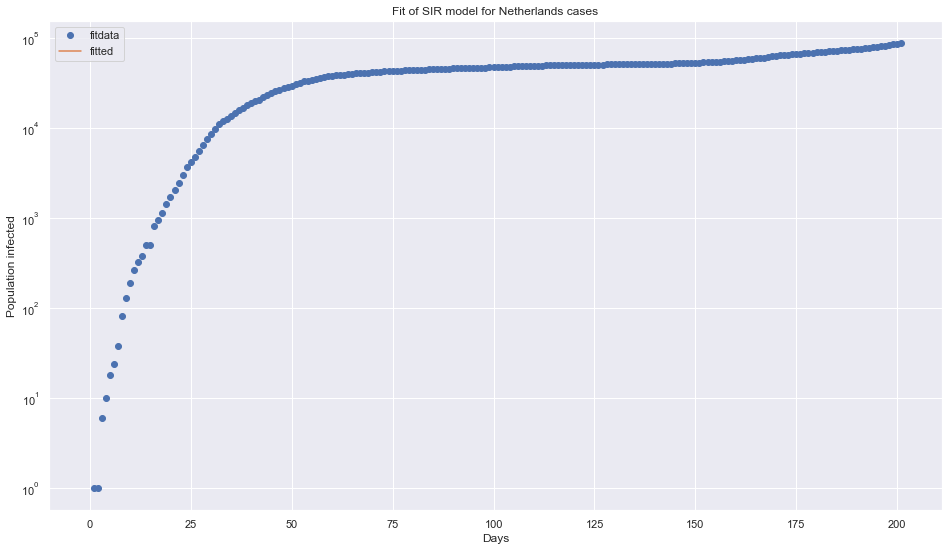

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



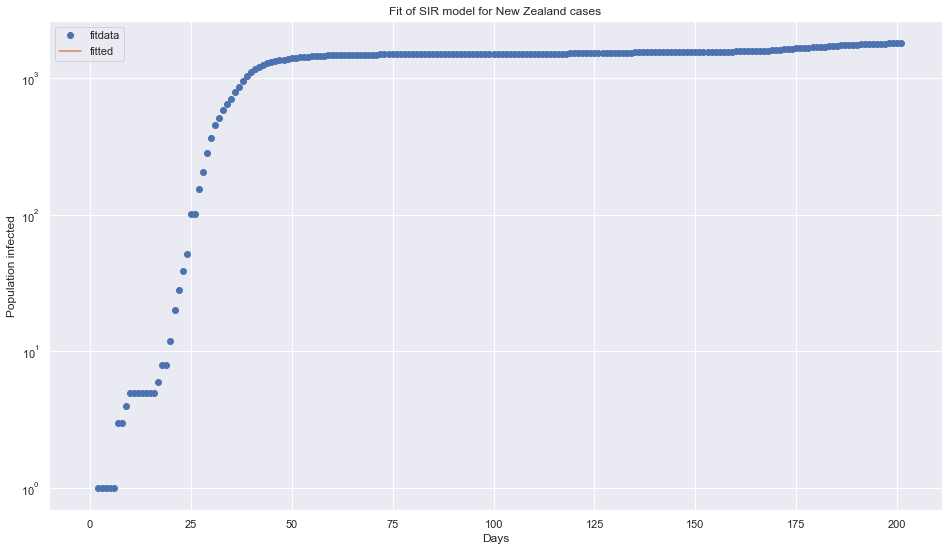

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



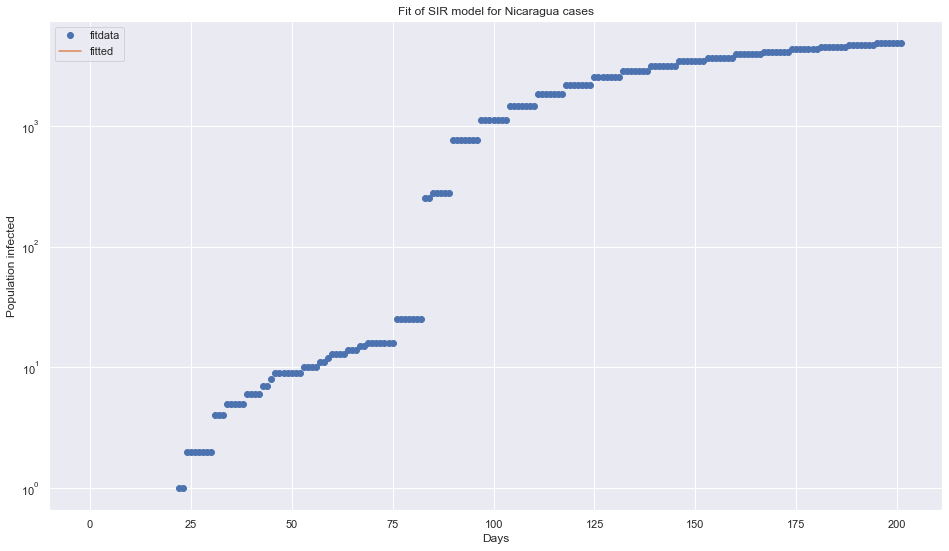

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



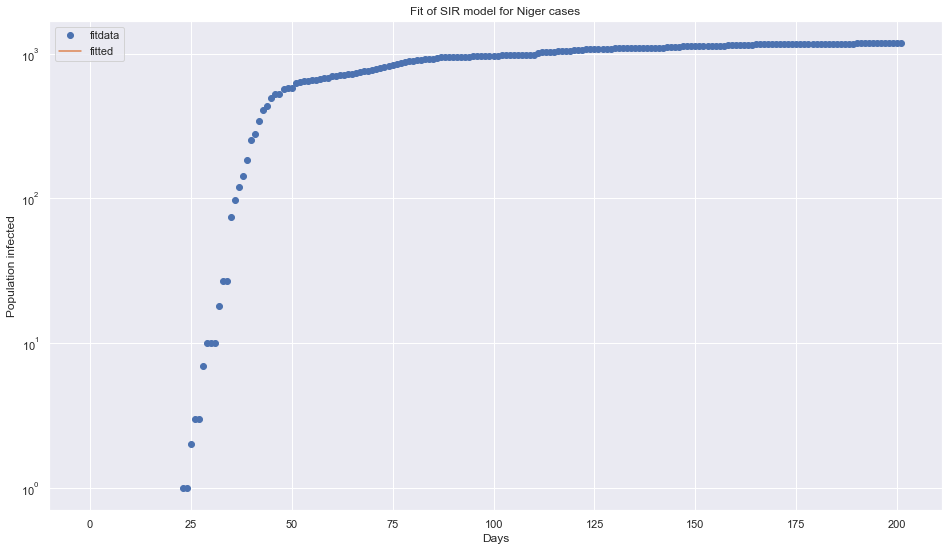

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



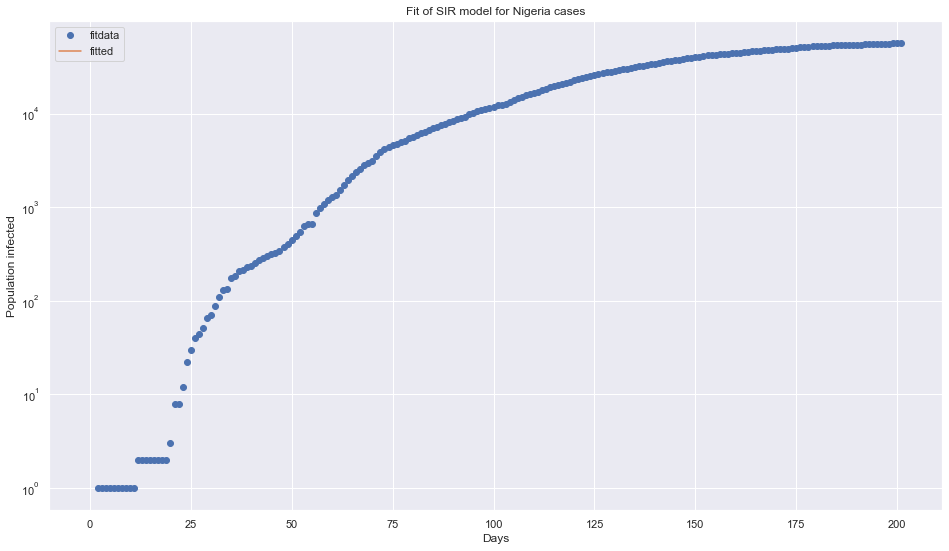

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



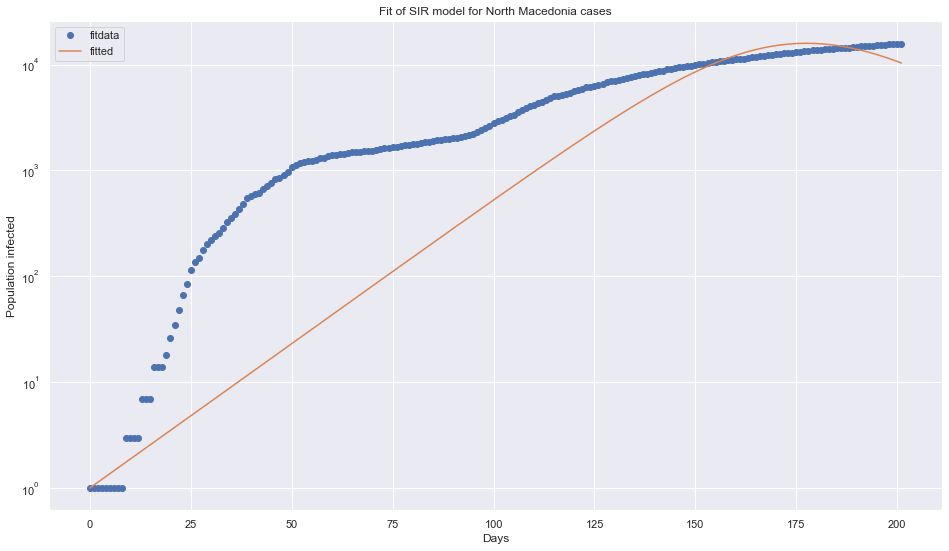

Optimal parameters: beta = 0.36321811917519947  and gamma =  0.3003981077361867
Basic Reproduction Number R0  1.2091225271438197
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



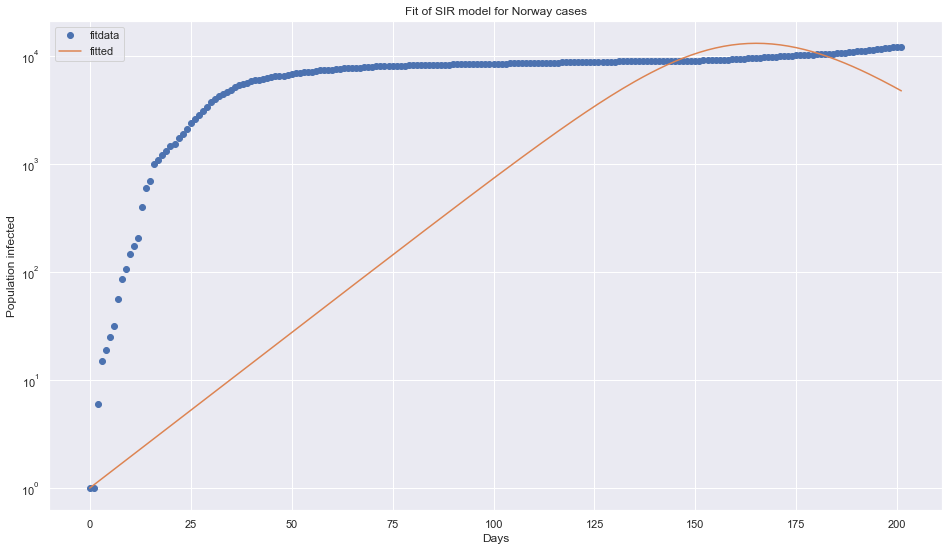

Optimal parameters: beta = 0.4203093462457294  and gamma =  0.35395640618015894
Basic Reproduction Number R0  1.1874607689168302
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



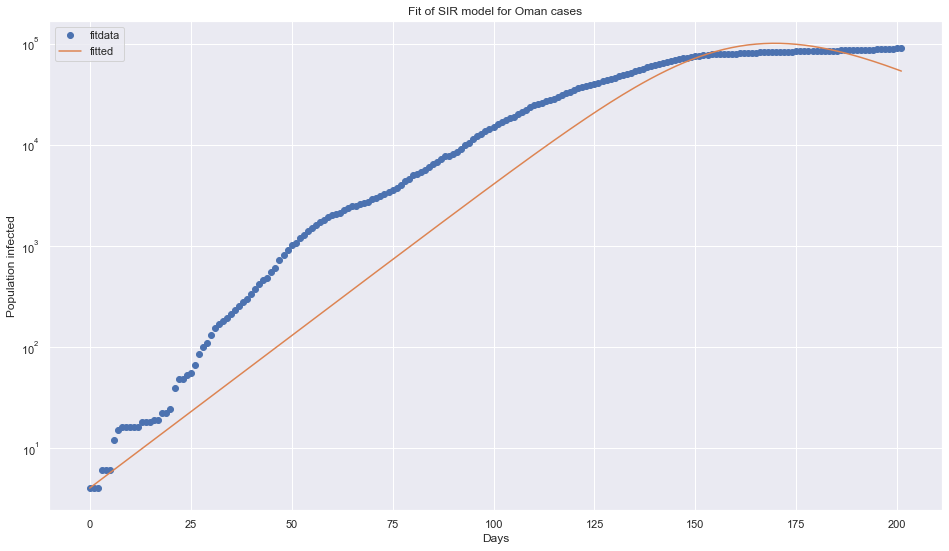

Optimal parameters: beta = 0.1678560837334651  and gamma =  0.09837739867772342
Basic Reproduction Number R0  1.7062464142129674
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



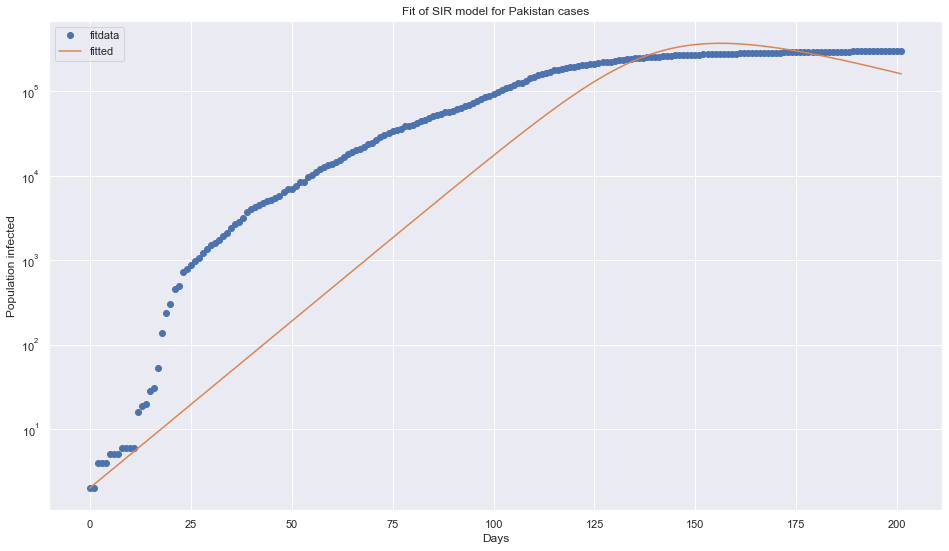

Optimal parameters: beta = 0.12545929066644723  and gamma =  0.034418740877444814
Basic Reproduction Number R0  3.645086585624137
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



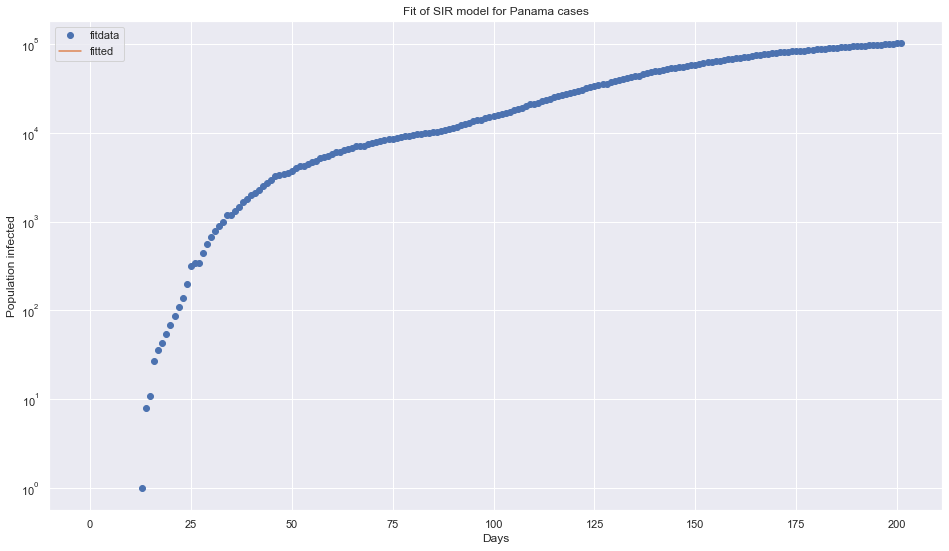

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



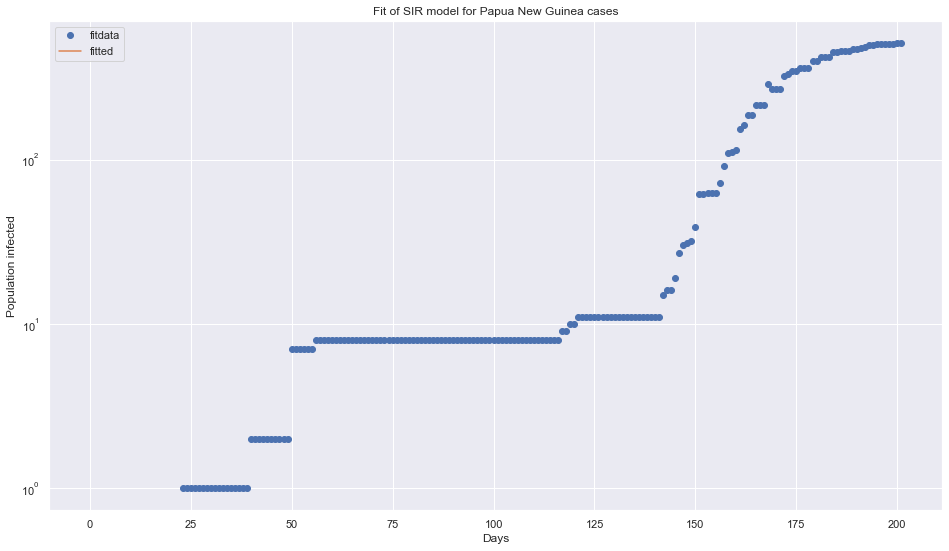

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



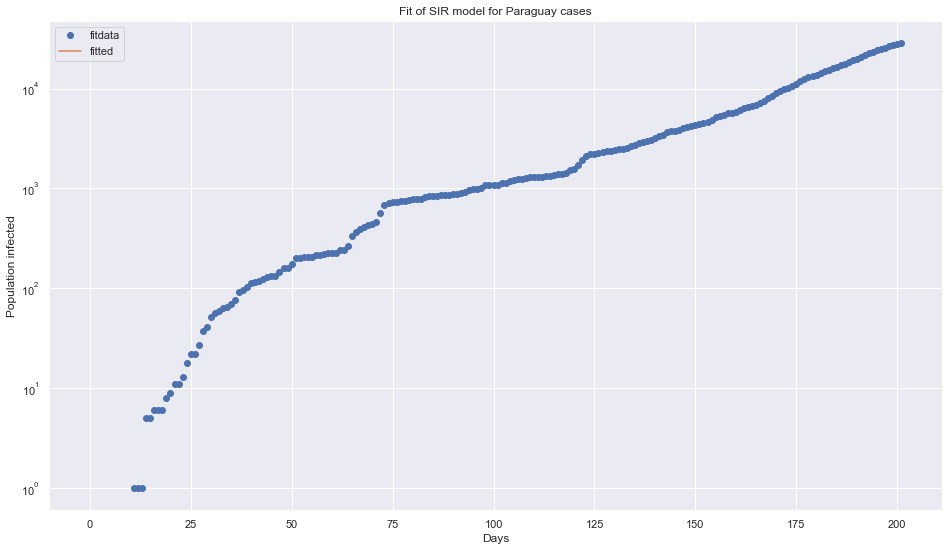

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



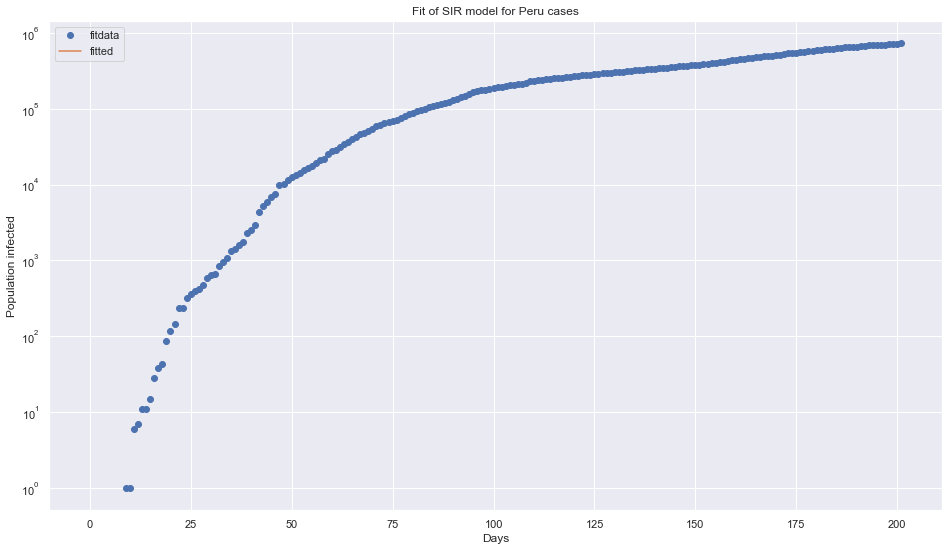

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



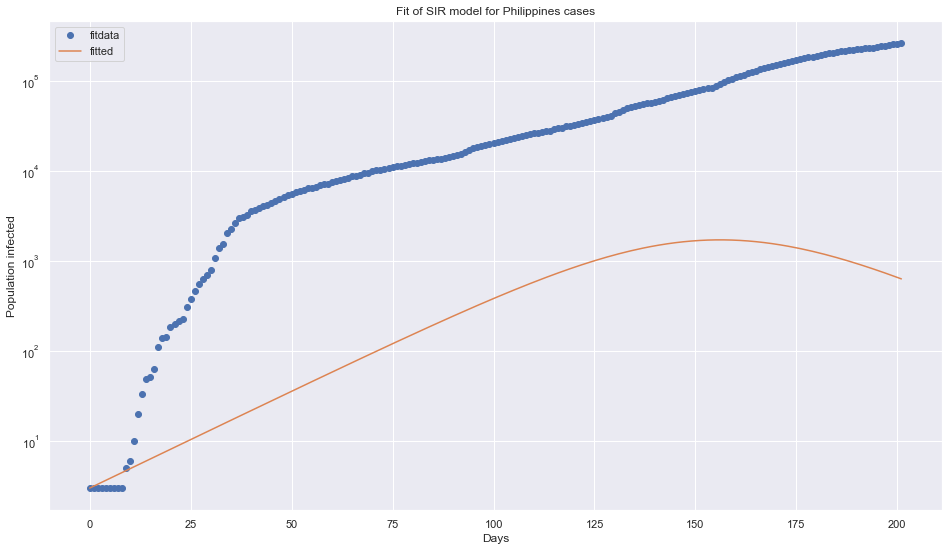

Optimal parameters: beta = 0.8545520010184033  and gamma =  0.8048177893535762
Basic Reproduction Number R0  1.0617956167504365
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



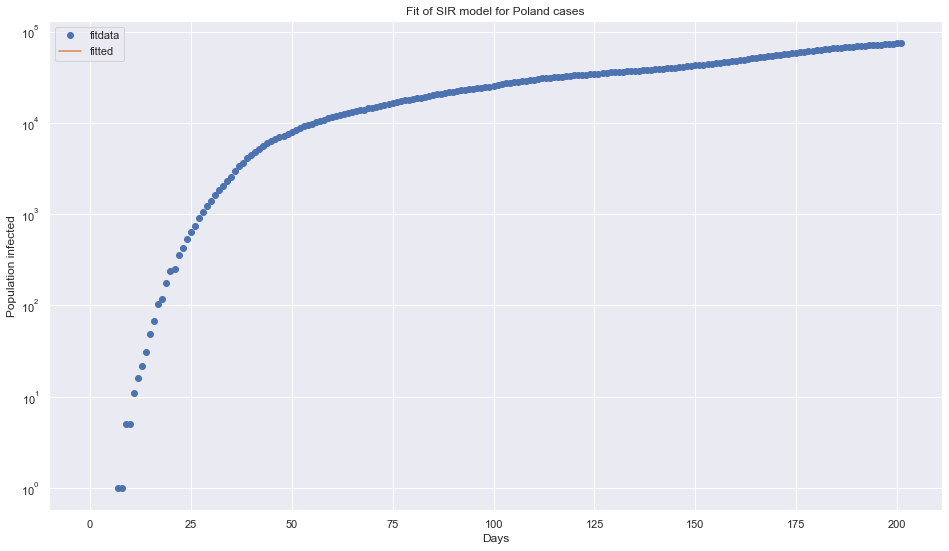

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



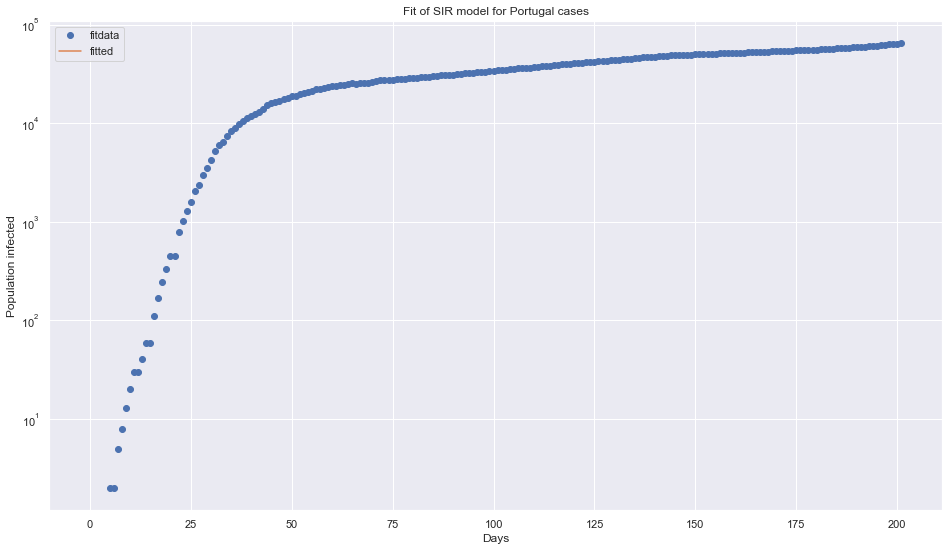

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



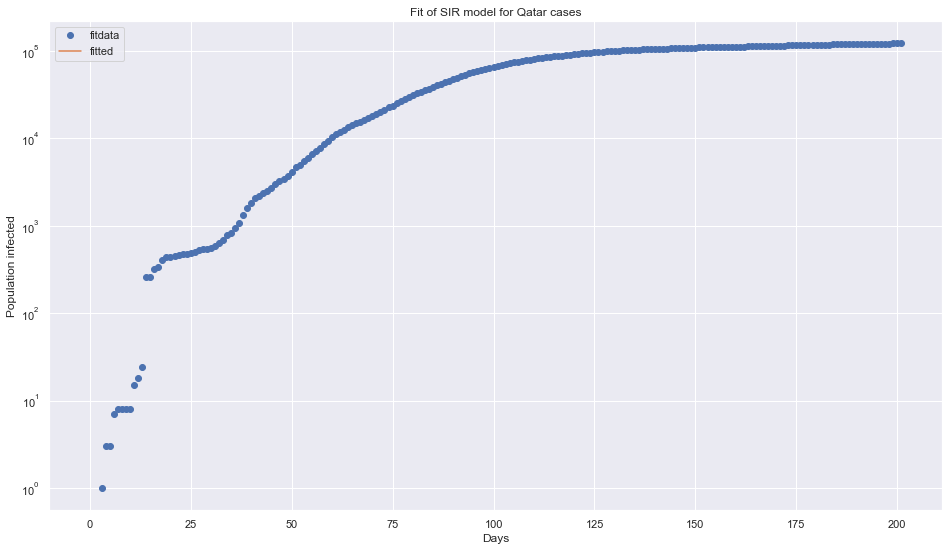

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



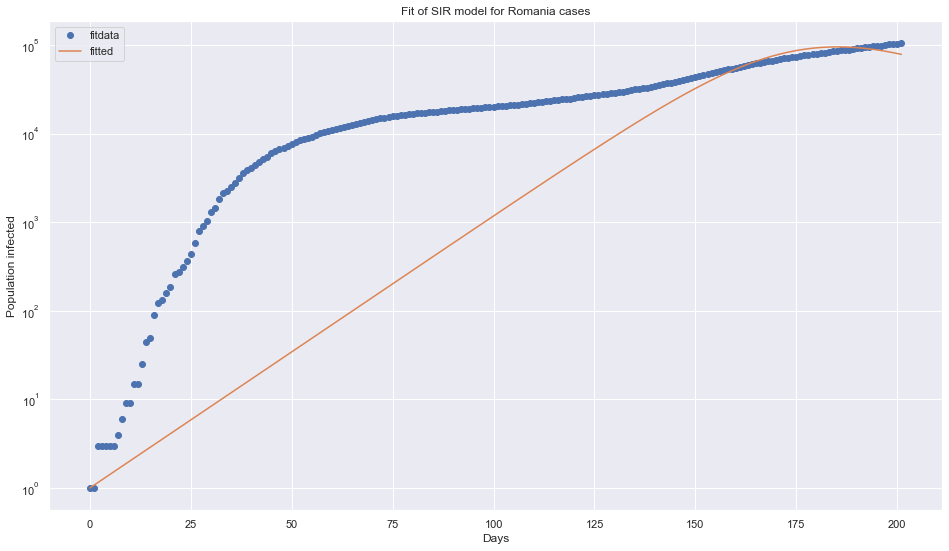

Optimal parameters: beta = 0.17564859625637325  and gamma =  0.10489613751272509
Basic Reproduction Number R0  1.6745001333825575
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



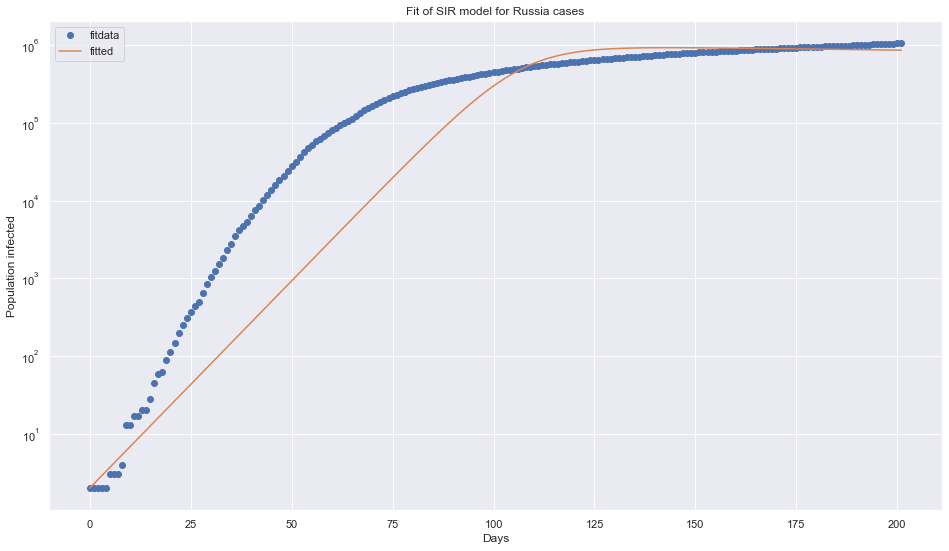

Optimal parameters: beta = 0.12439909477379209  and gamma =  0.0015003508613159872
Basic Reproduction Number R0  82.91333579445491
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



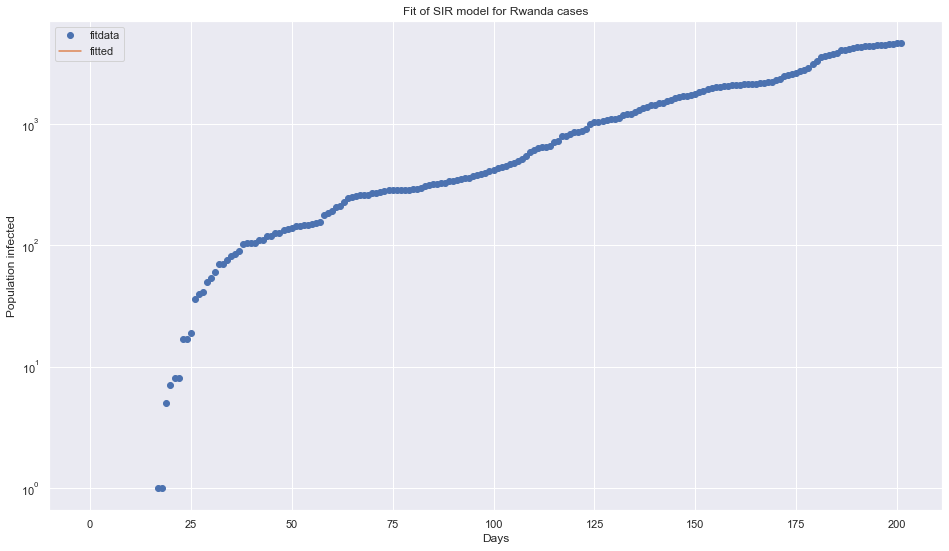

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



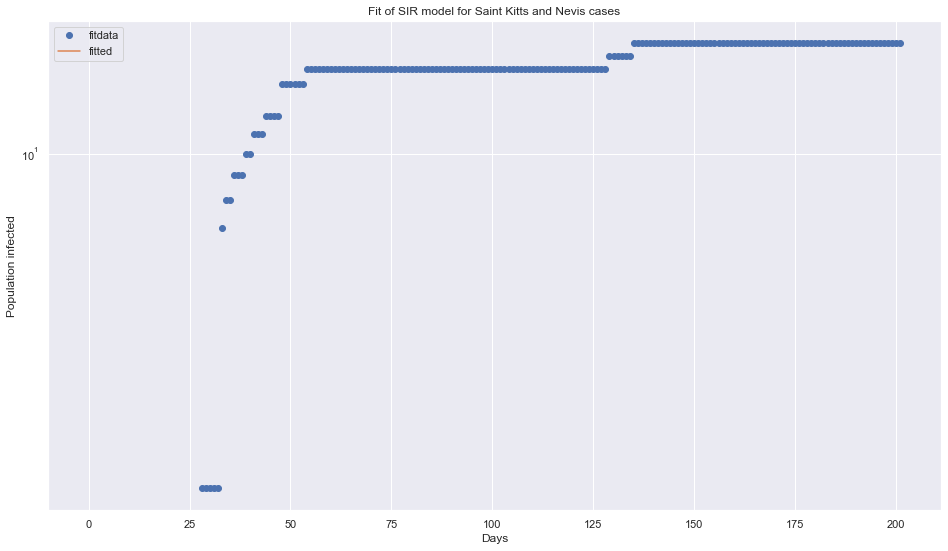

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



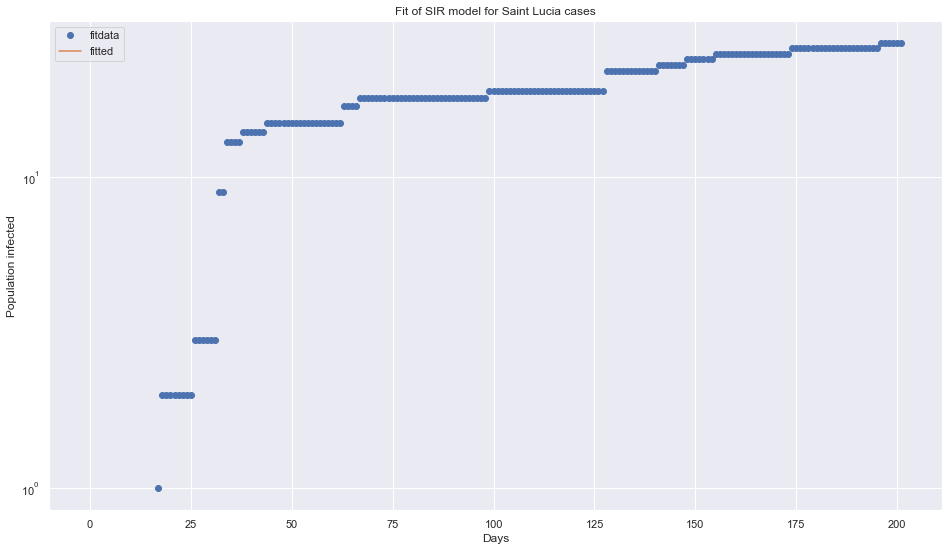

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



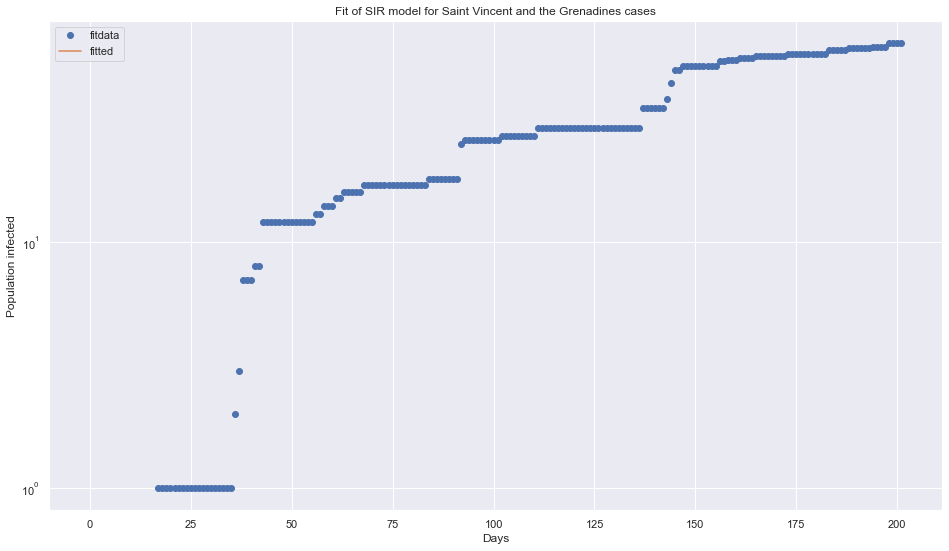

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



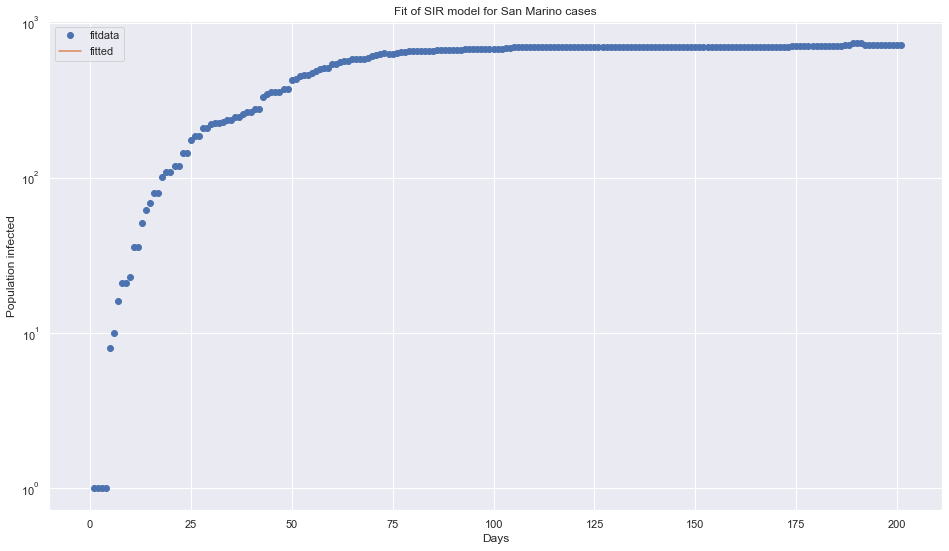

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



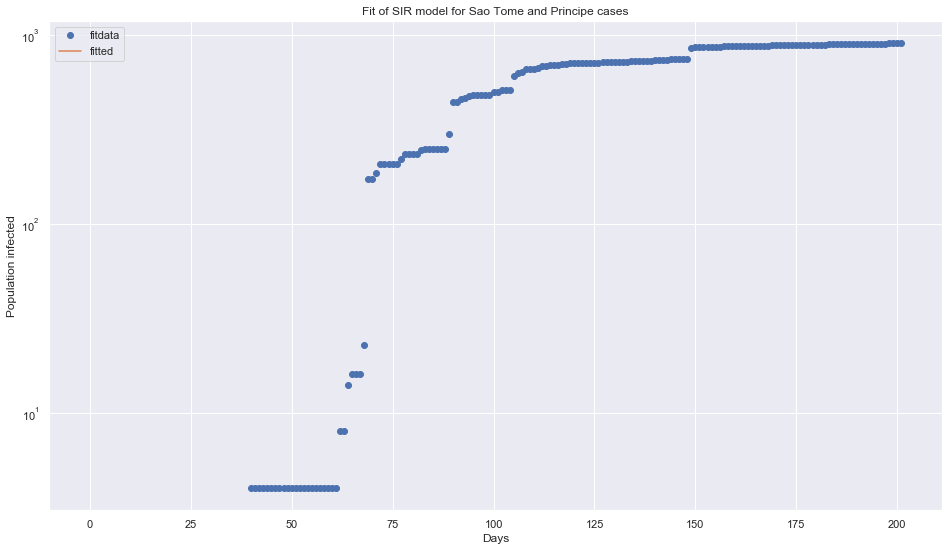

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



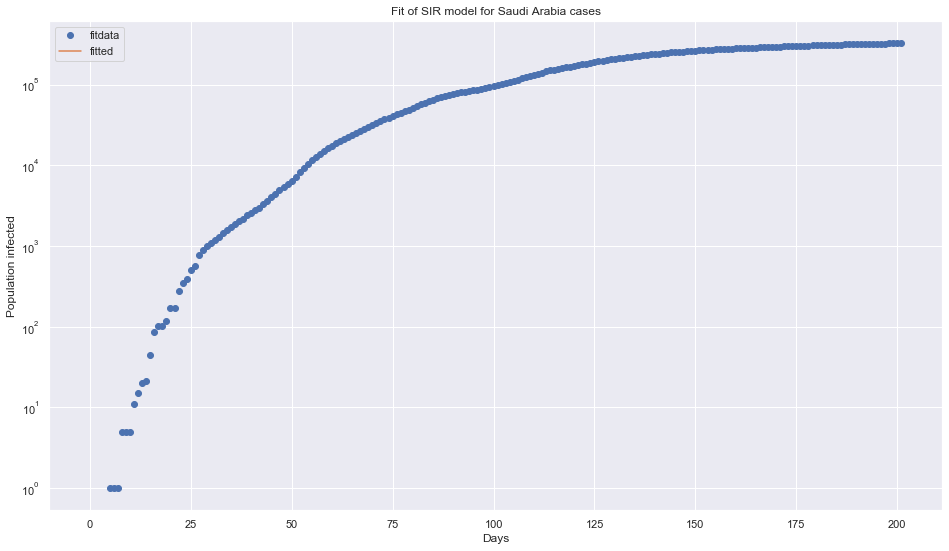

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



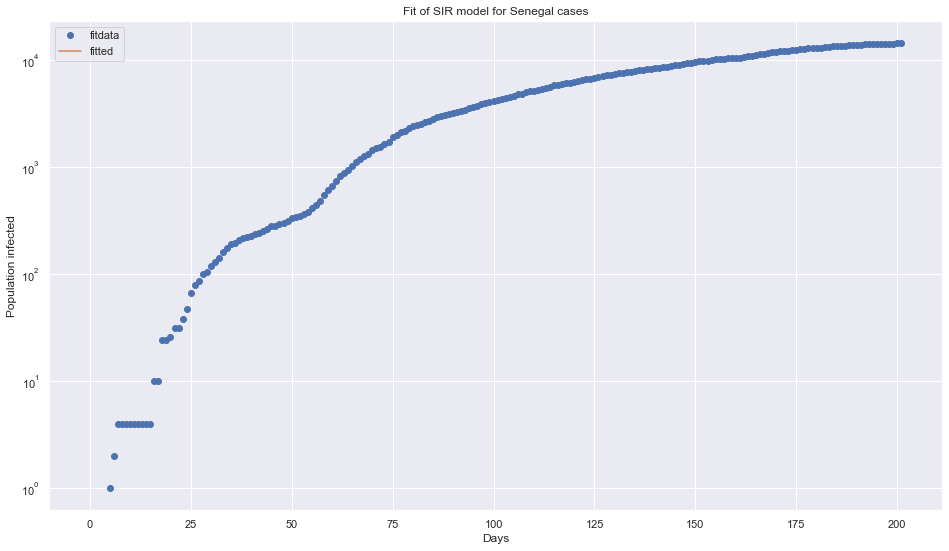

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



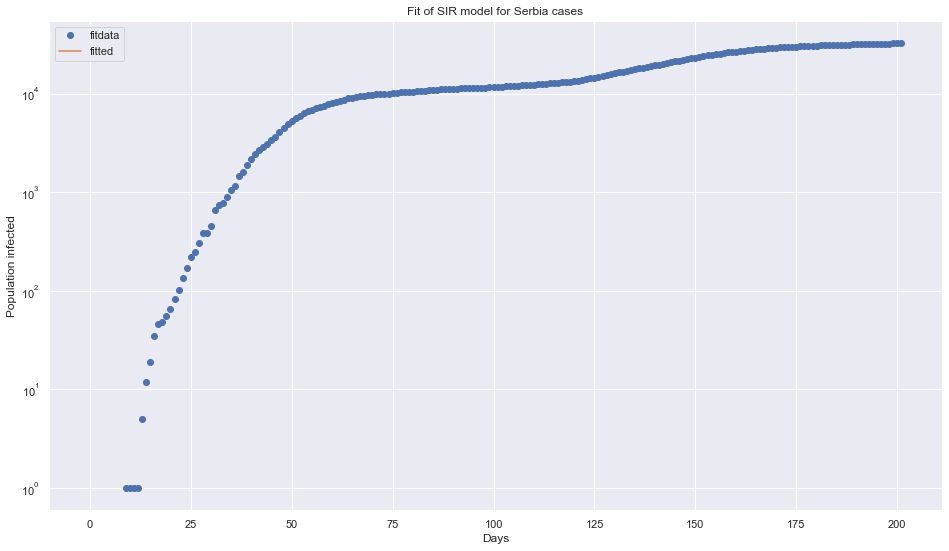

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



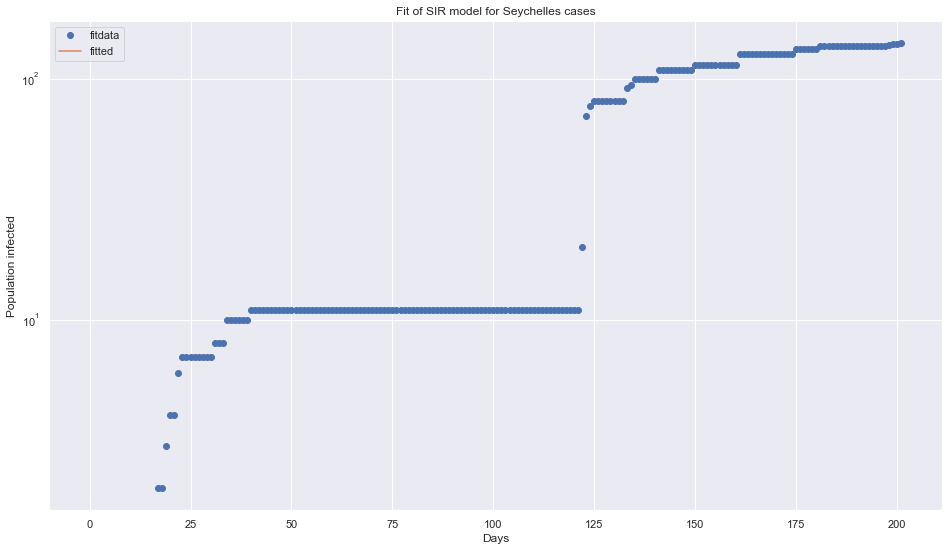

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



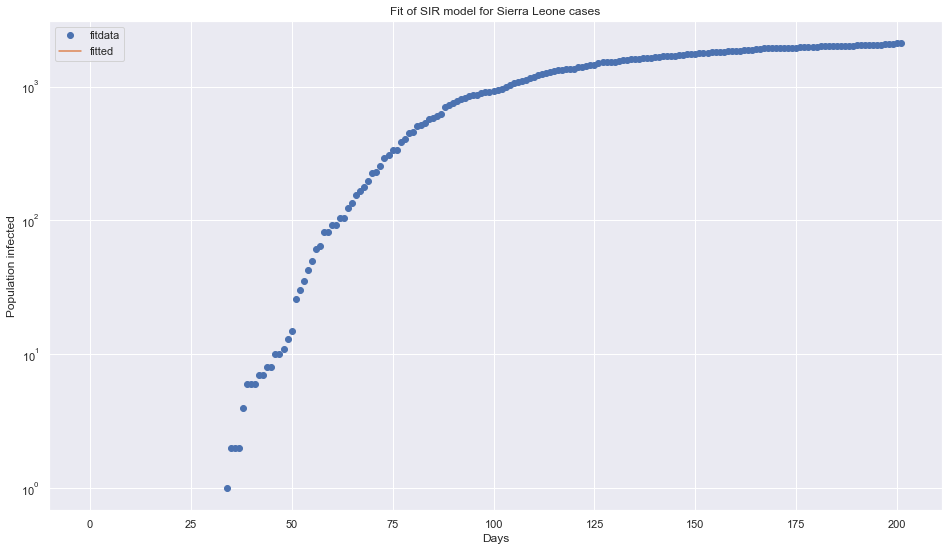

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



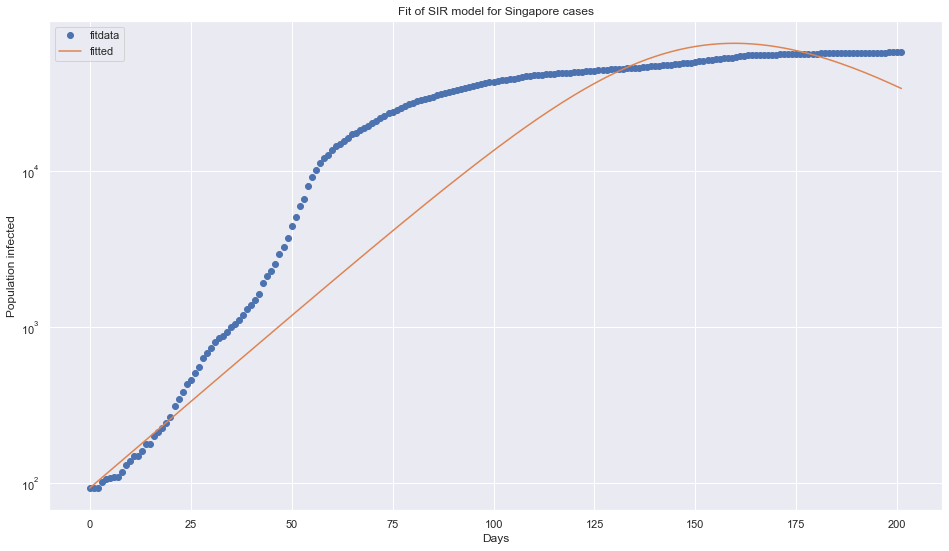

Optimal parameters: beta = 0.15025494106506712  and gamma =  0.0992525959693857
Basic Reproduction Number R0  1.513864091891491
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



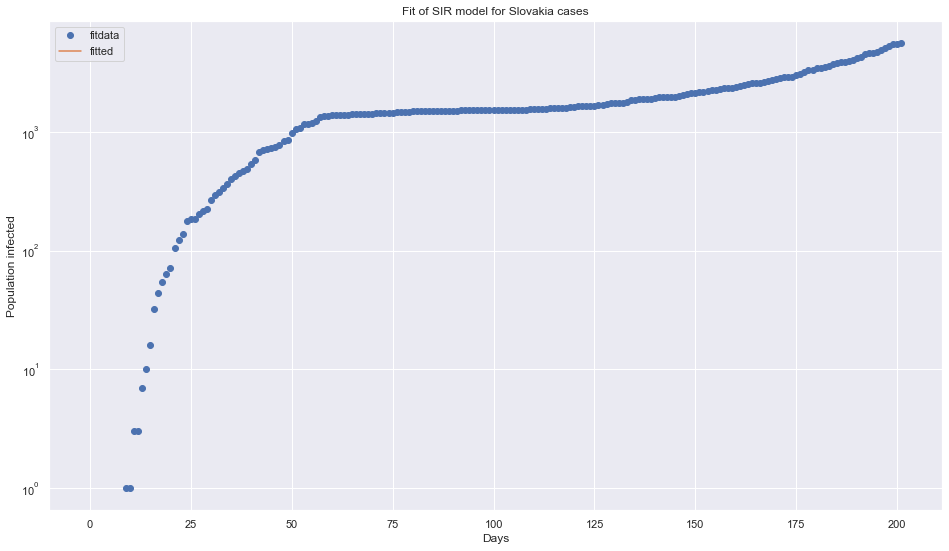

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



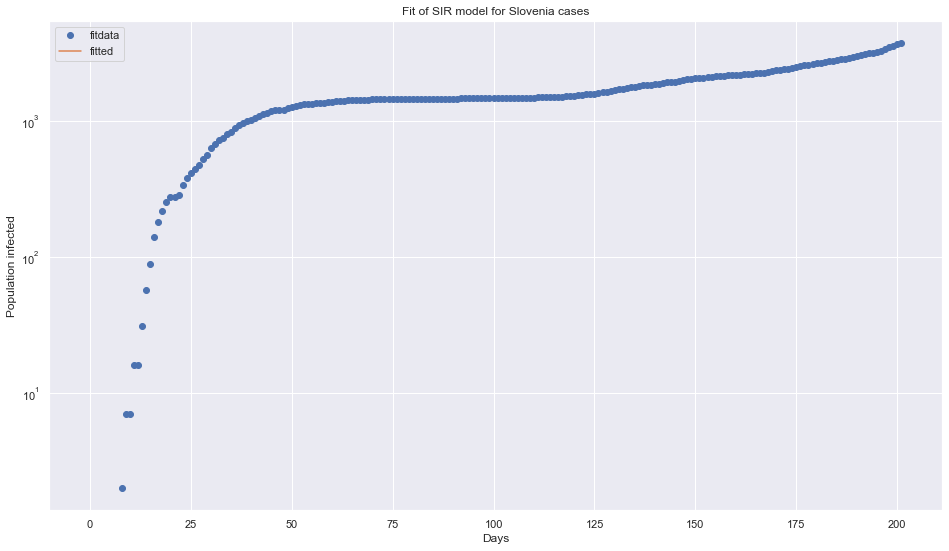

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



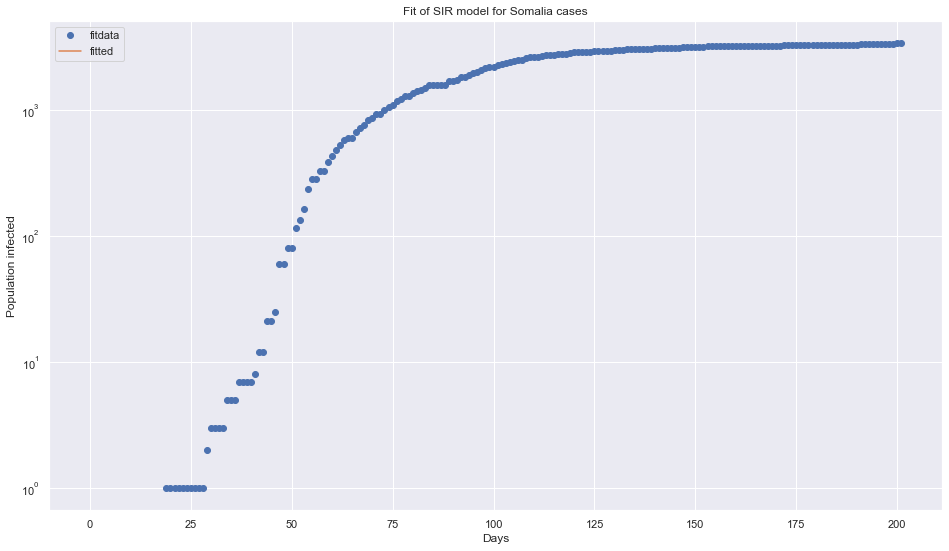

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



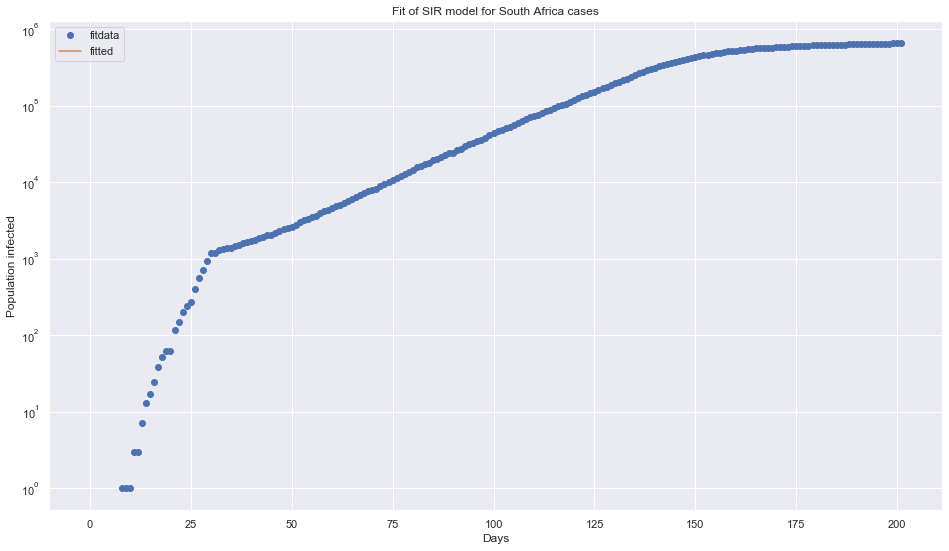

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



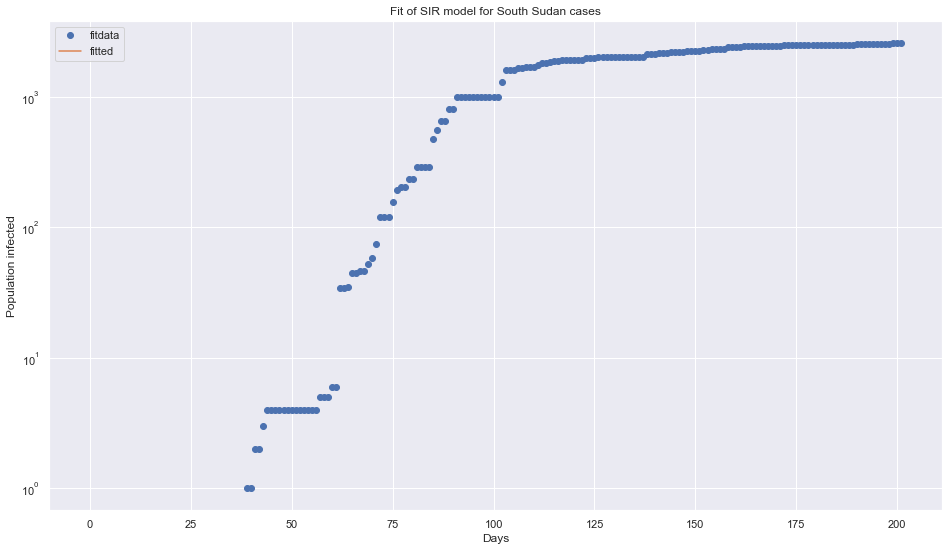

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



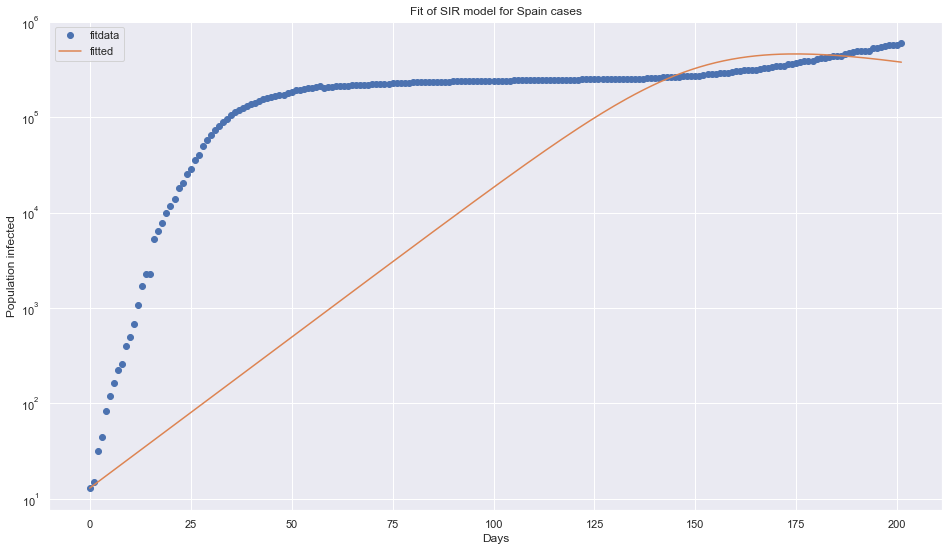

Optimal parameters: beta = 0.09240847093787737  and gamma =  0.01957440437089617
Basic Reproduction Number R0  4.720882903352765
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



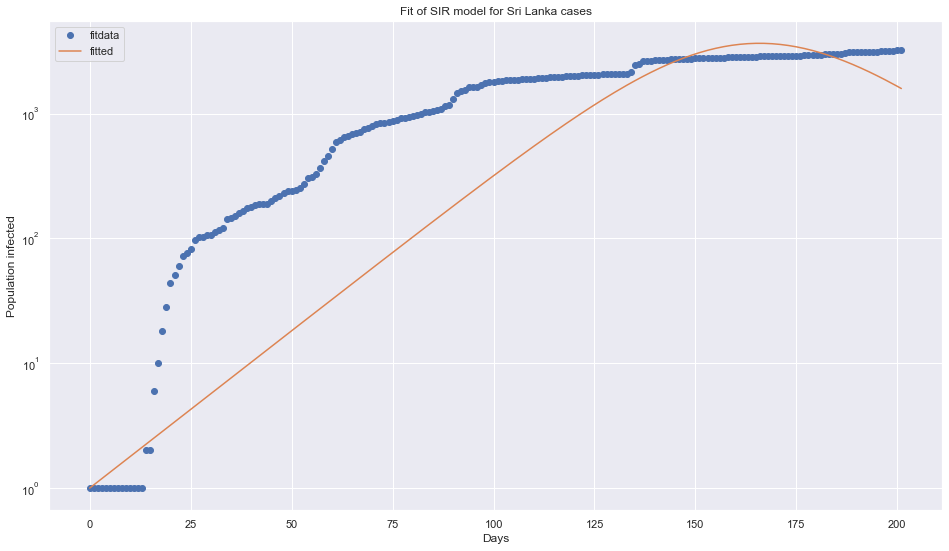

Optimal parameters: beta = 0.6886606760115564  and gamma =  0.6305893091202821
Basic Reproduction Number R0  1.0920906302269668
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



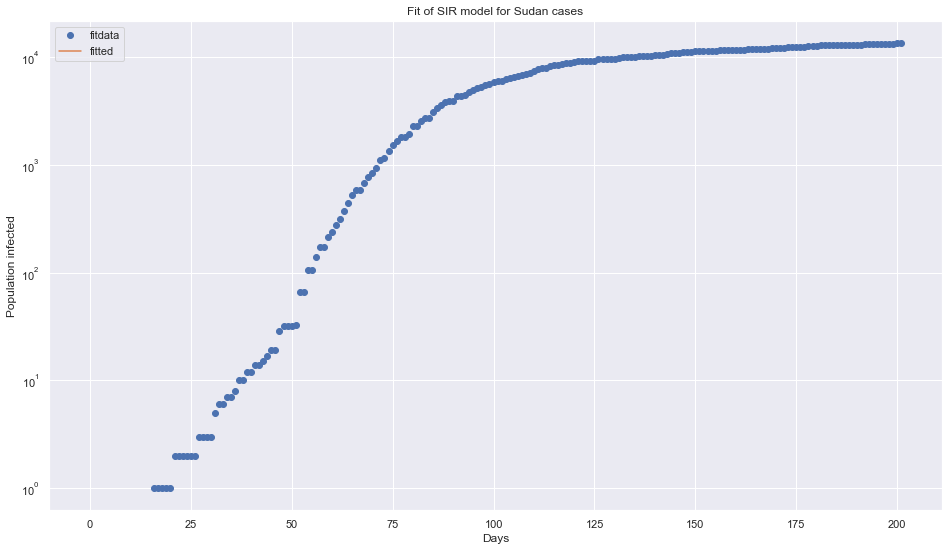

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



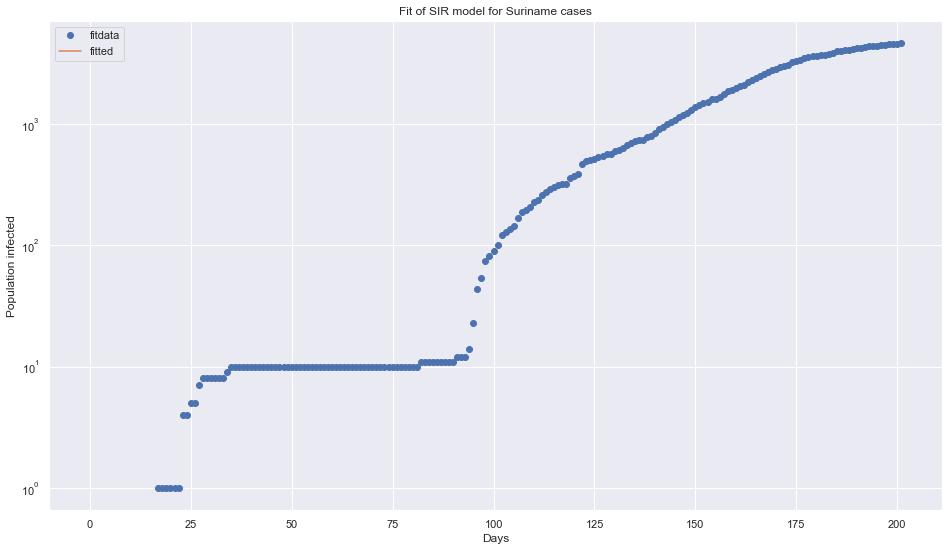

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



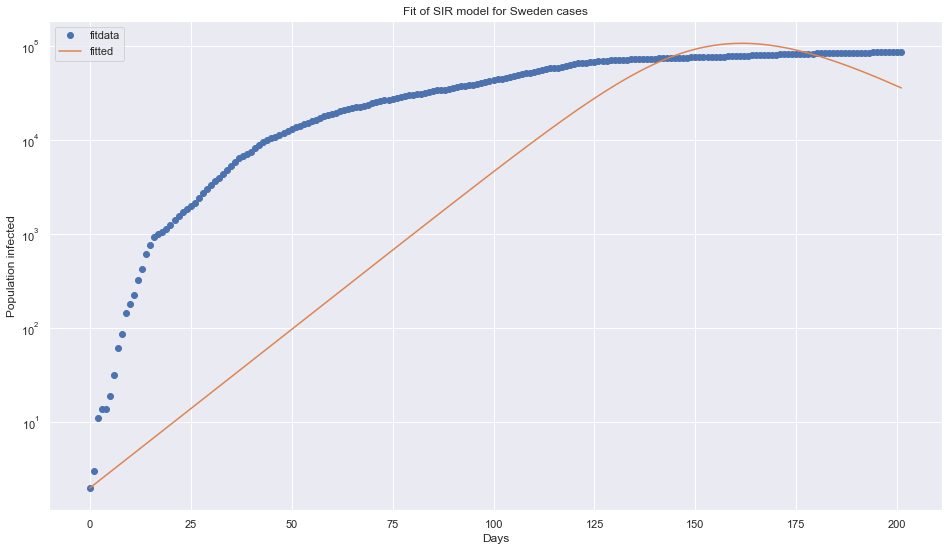

Optimal parameters: beta = 0.18270964762755354  and gamma =  0.10501602293697977
Basic Reproduction Number R0  1.739826385704949
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



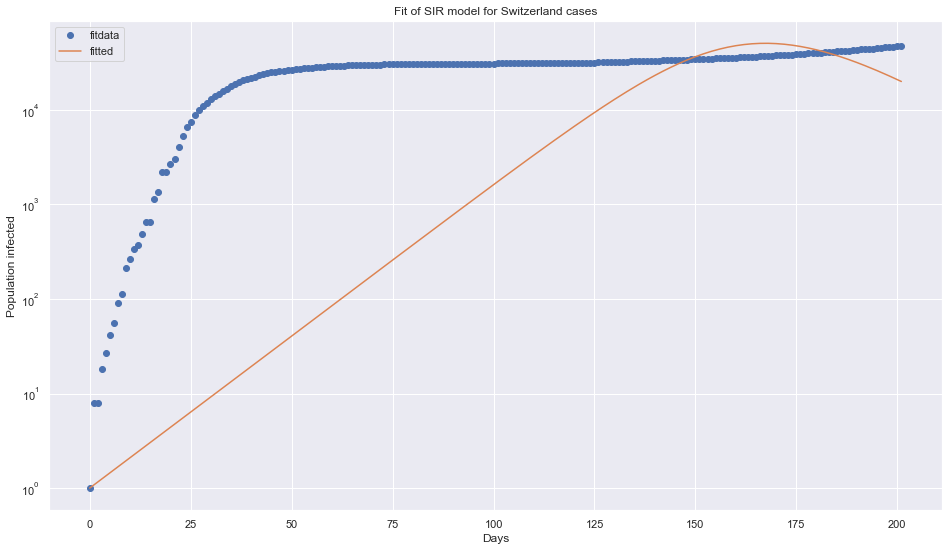

Optimal parameters: beta = 0.24617084919531915  and gamma =  0.17210960533364988
Basic Reproduction Number R0  1.430314413411703
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



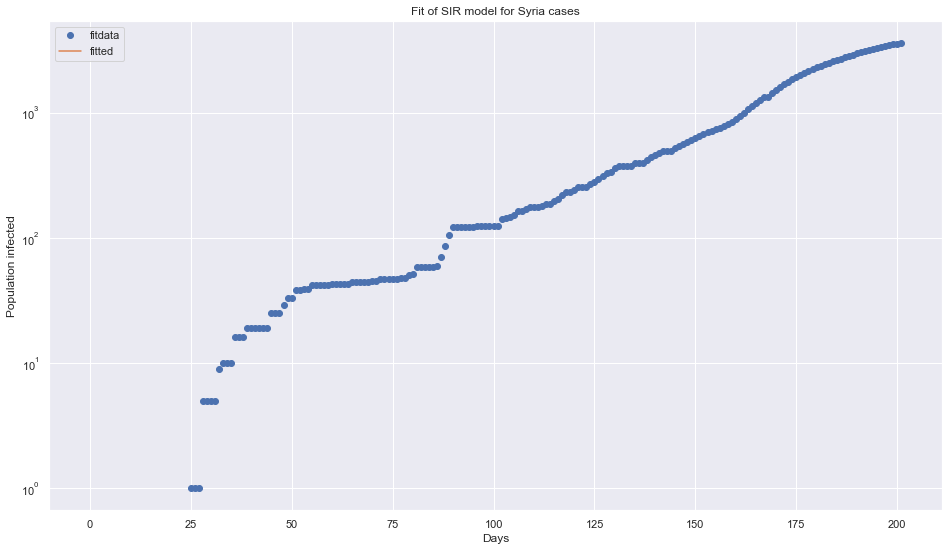

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


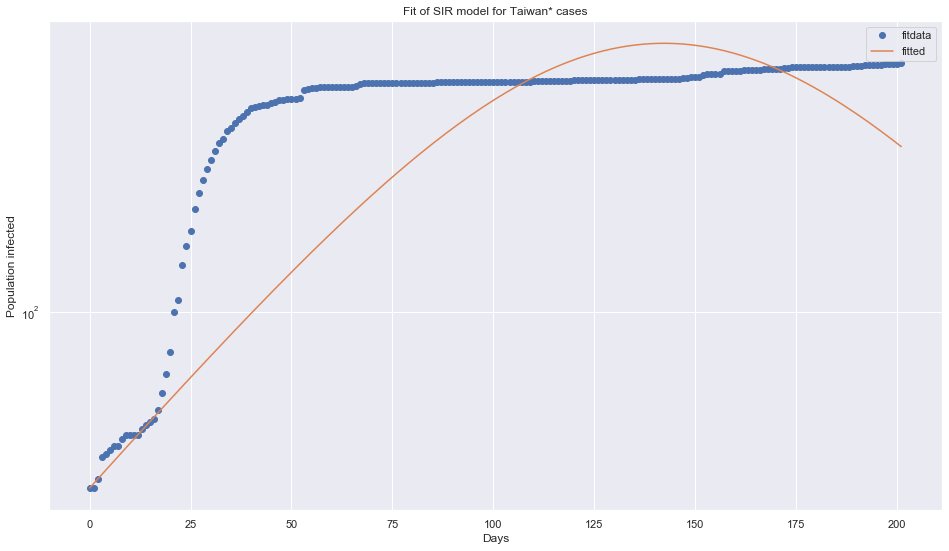

Optimal parameters: beta = 0.8909176597054216  and gamma =  0.8618830417668439
Basic Reproduction Number R0  1.033687422227333
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



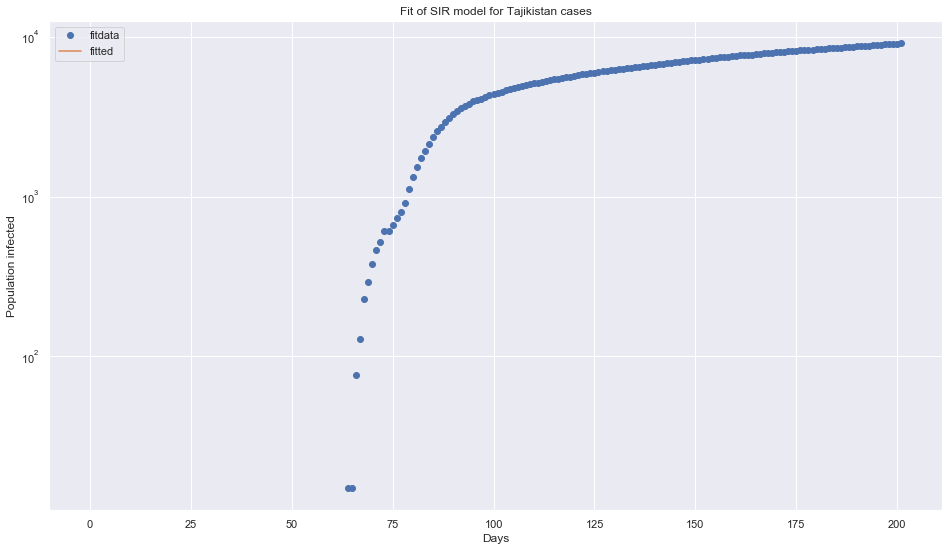

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



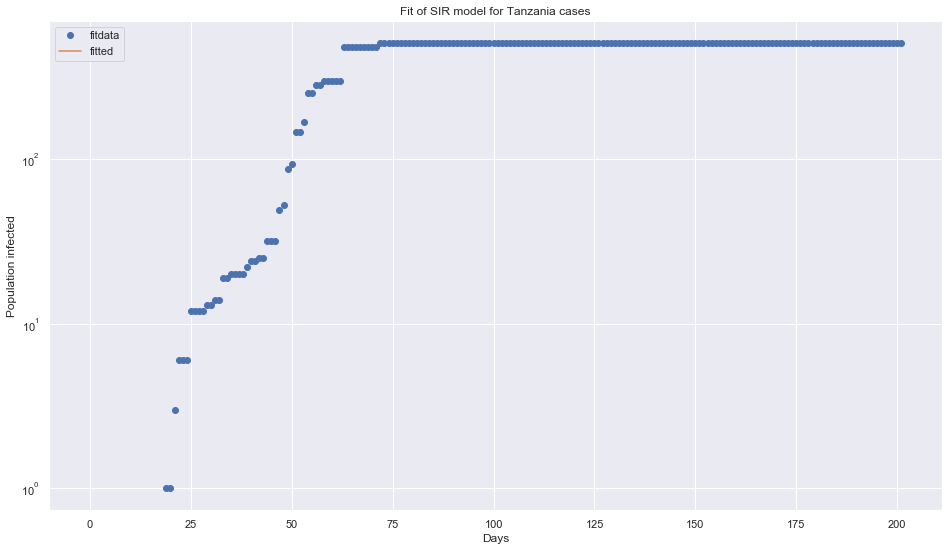

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


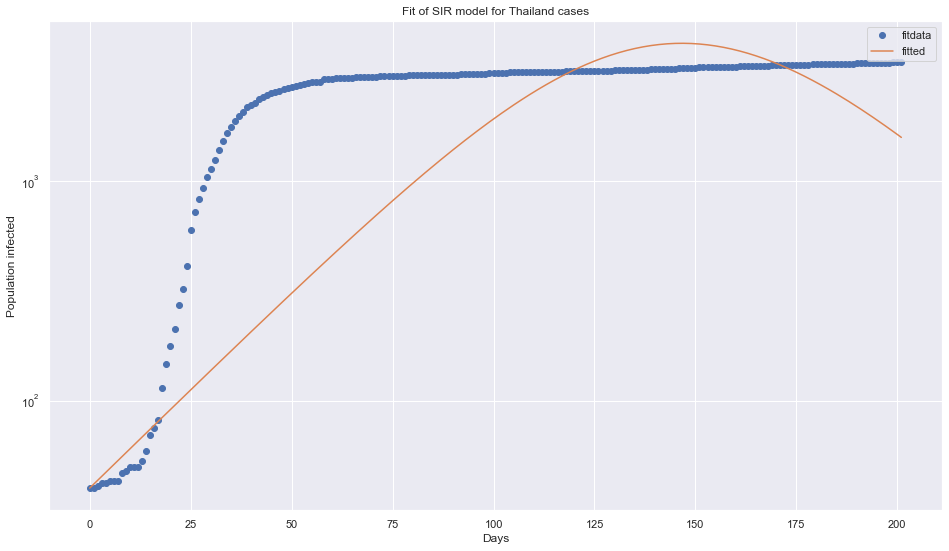

Optimal parameters: beta = 0.4579237719326655  and gamma =  0.41658966224238597
Basic Reproduction Number R0  1.0992202002032156
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



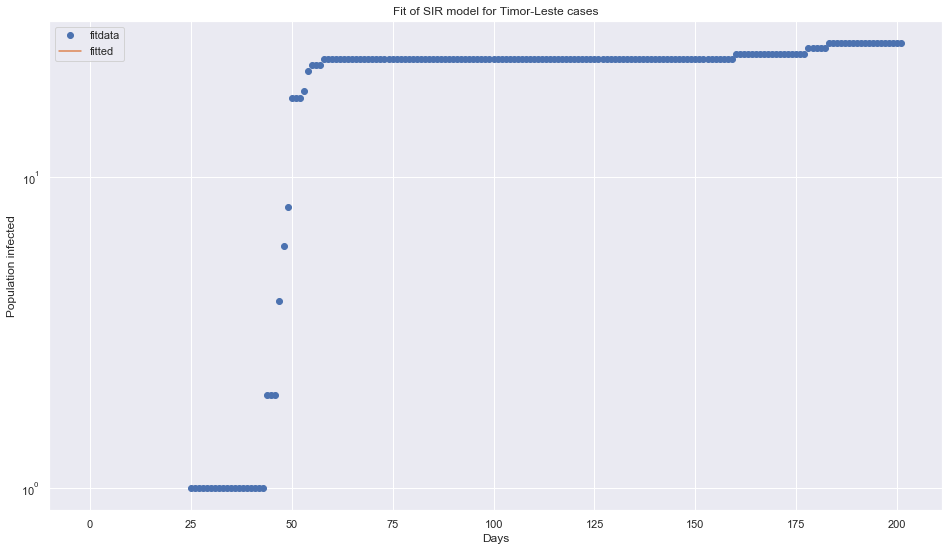

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



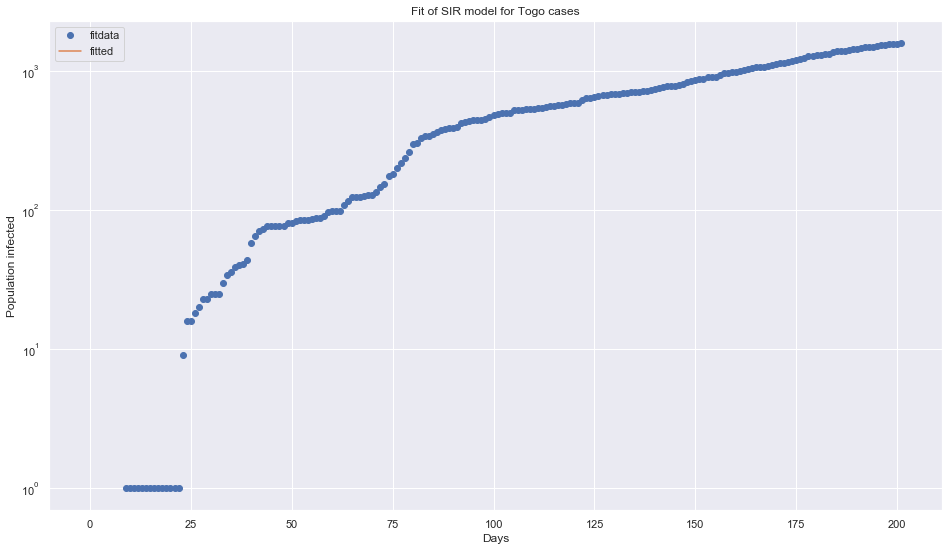

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



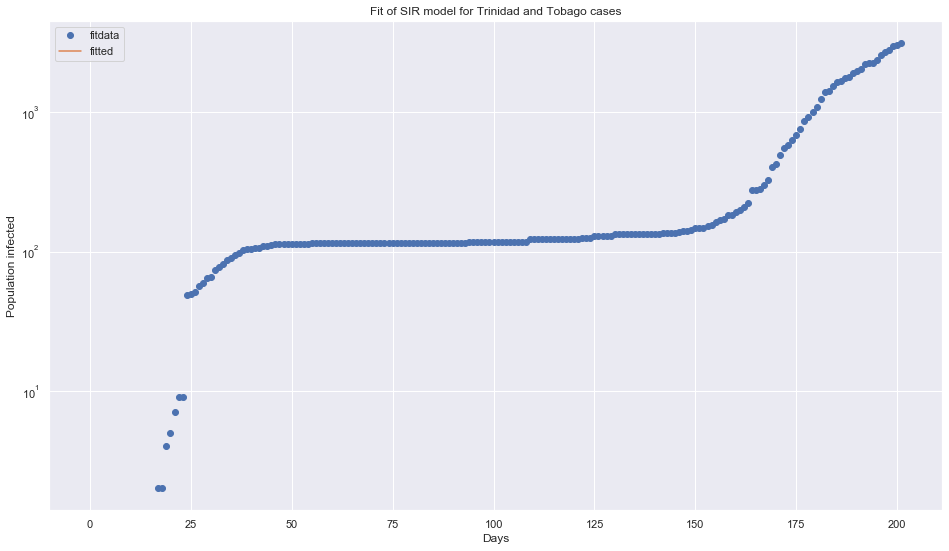

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



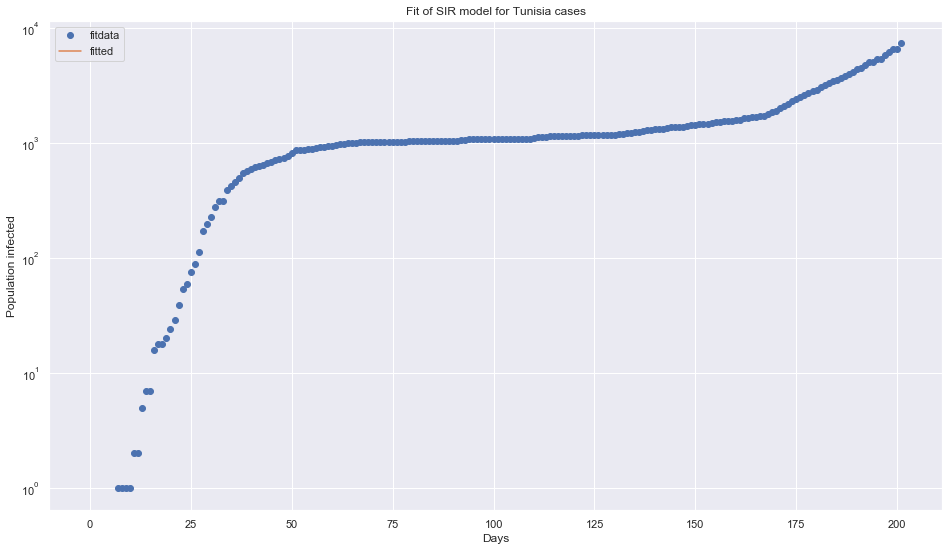

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



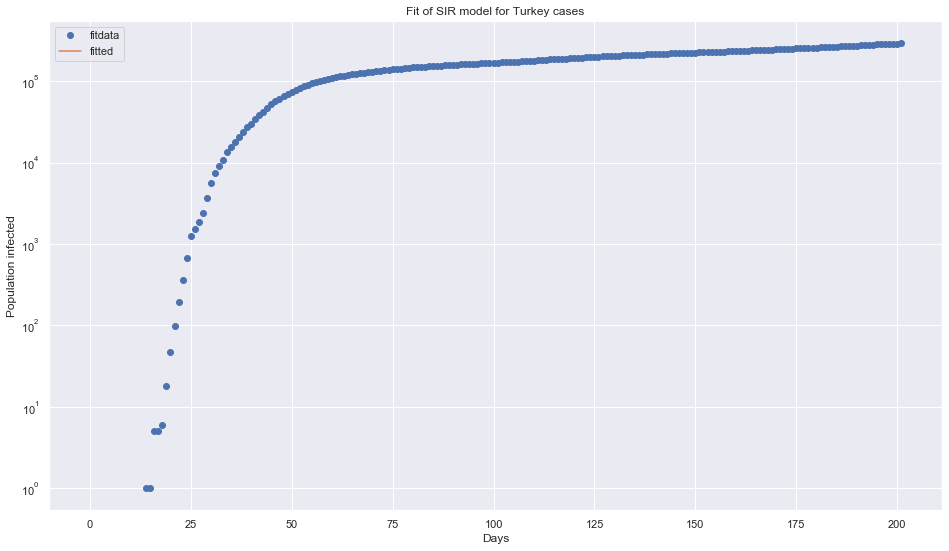

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



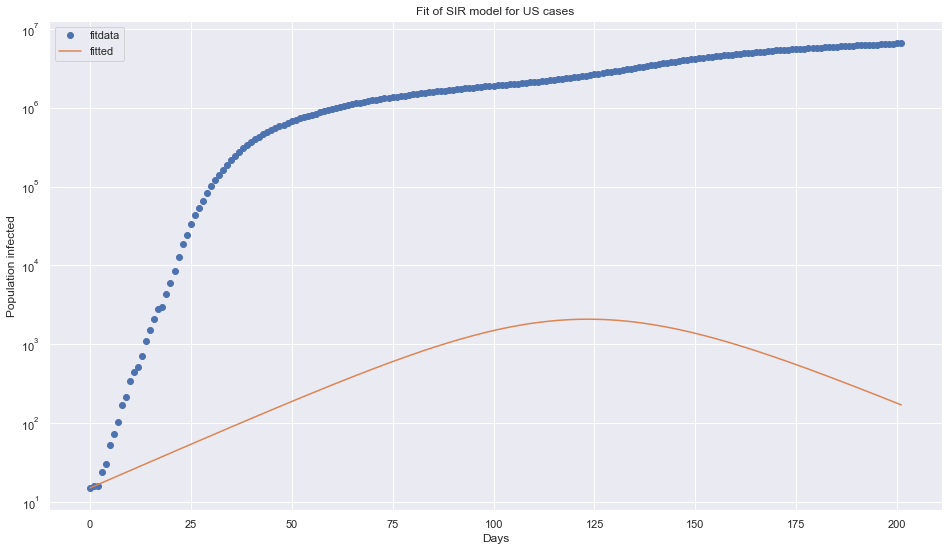

Optimal parameters: beta = 0.8063493785177964  and gamma =  0.7551065506372044
Basic Reproduction Number R0  1.0678617181076633
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



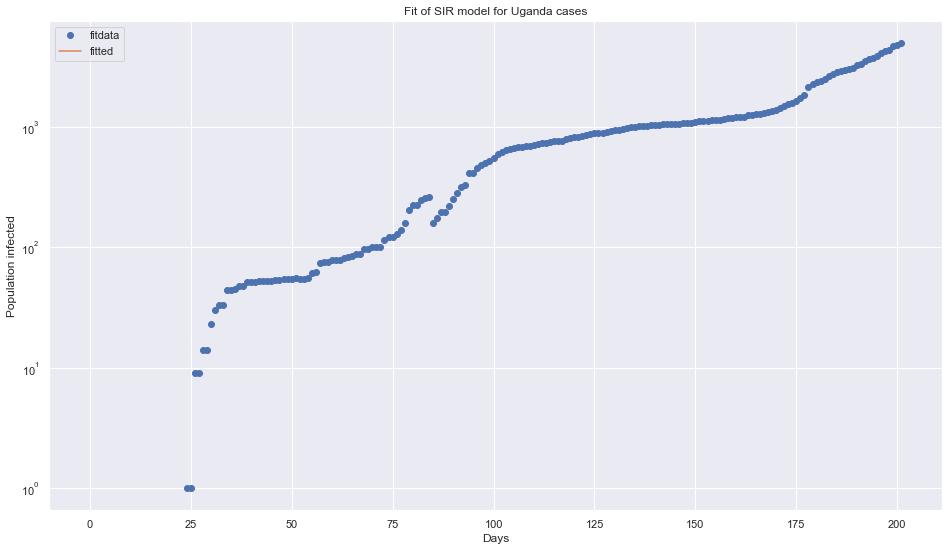

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



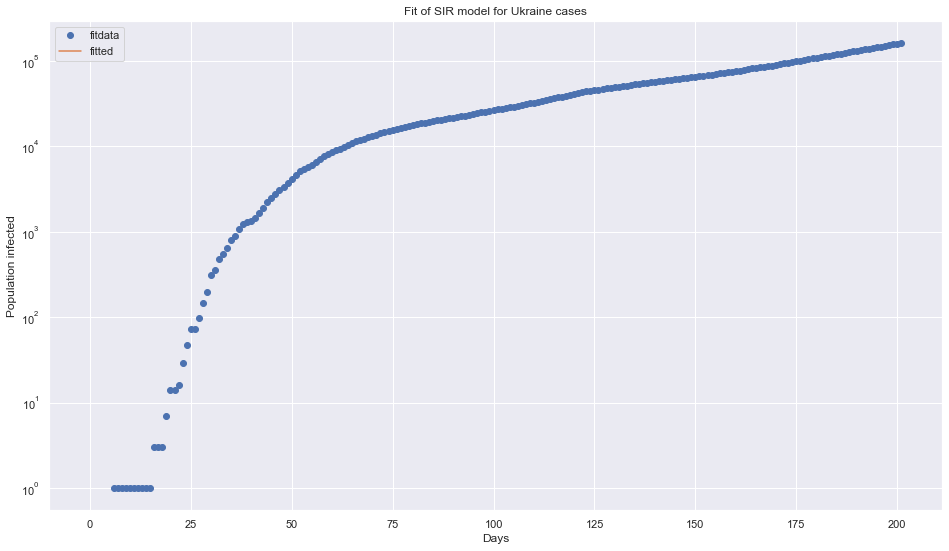

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



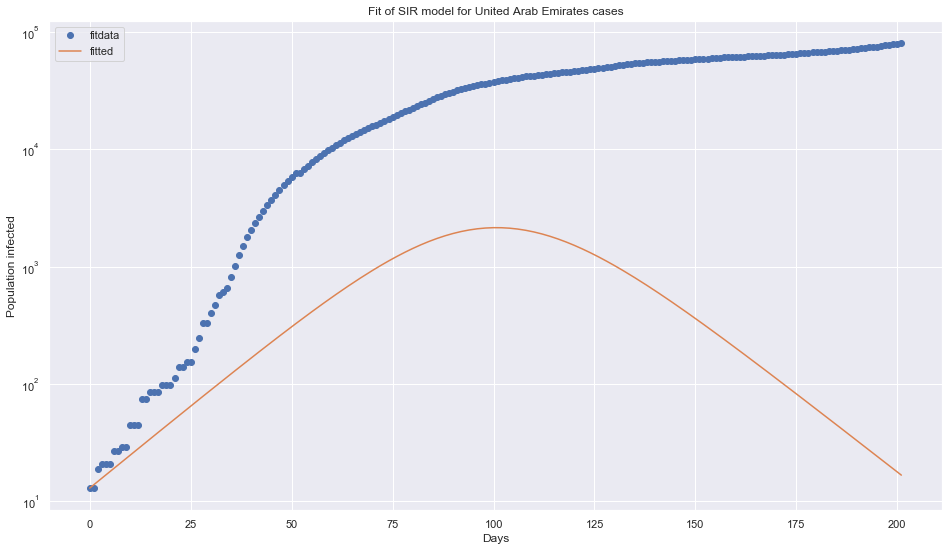

Optimal parameters: beta = 0.9976510777057708  and gamma =  0.9330620010146631
Basic Reproduction Number R0  1.069222706123355
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

overflow encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



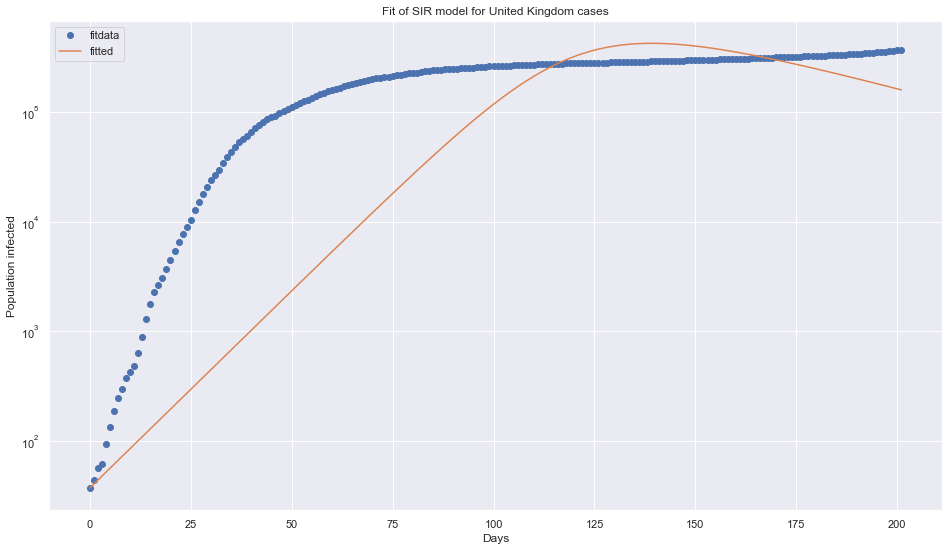

Optimal parameters: beta = 0.10815413041585244  and gamma =  0.025127603960006444
Basic Reproduction Number R0  4.304195918878399
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



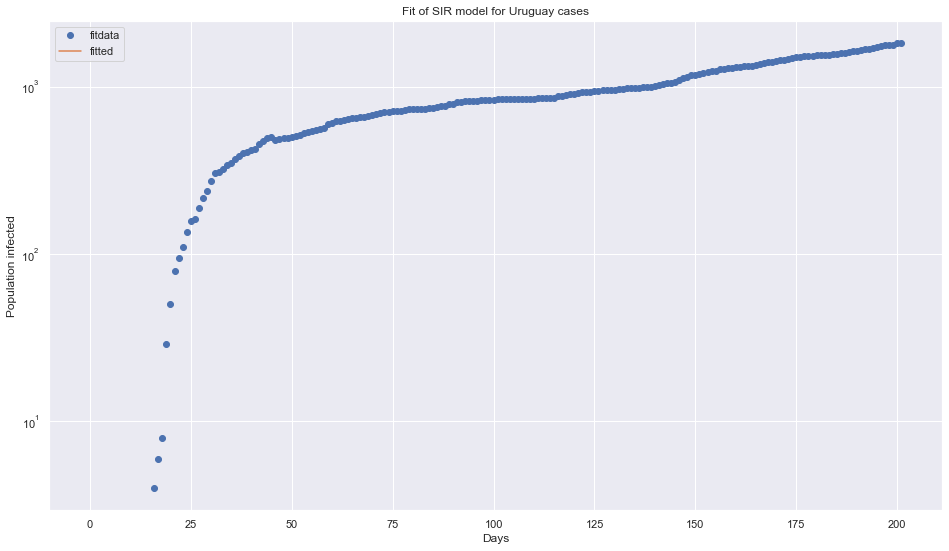

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



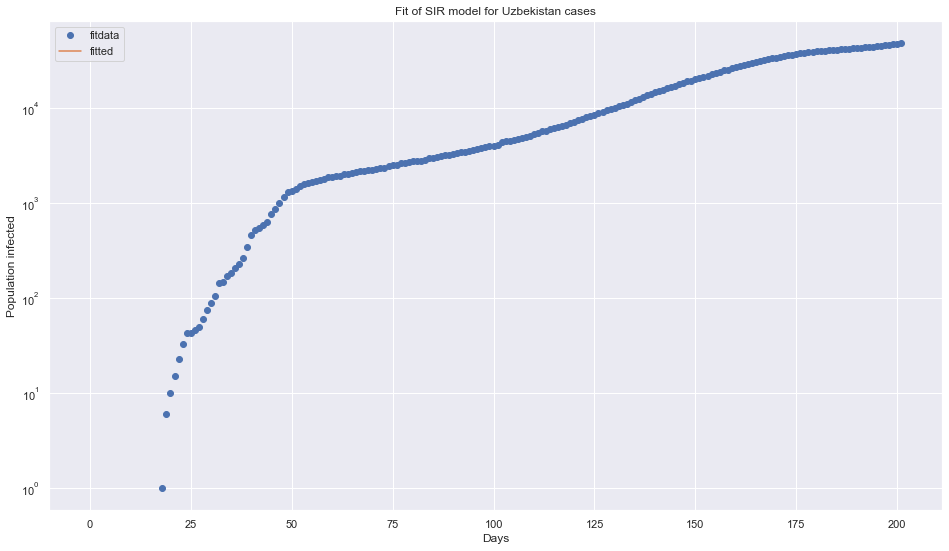

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



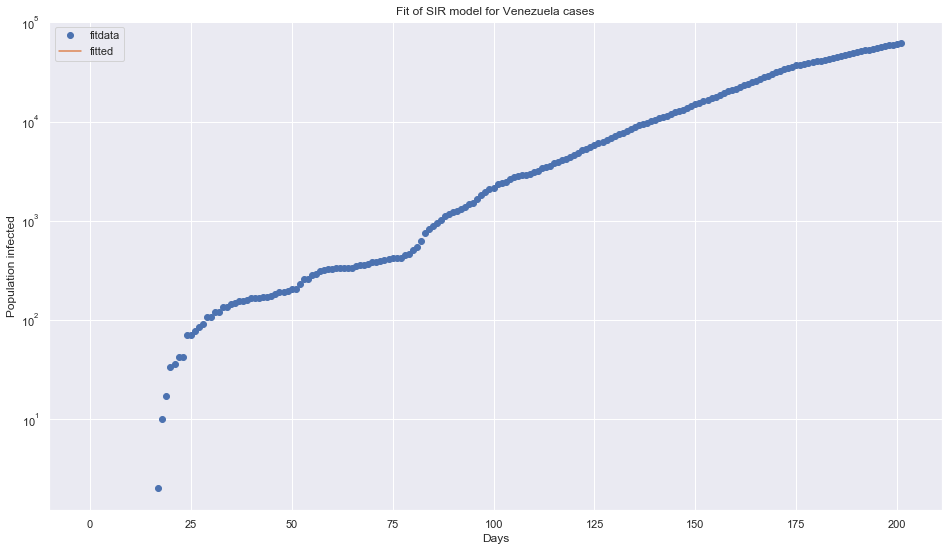

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


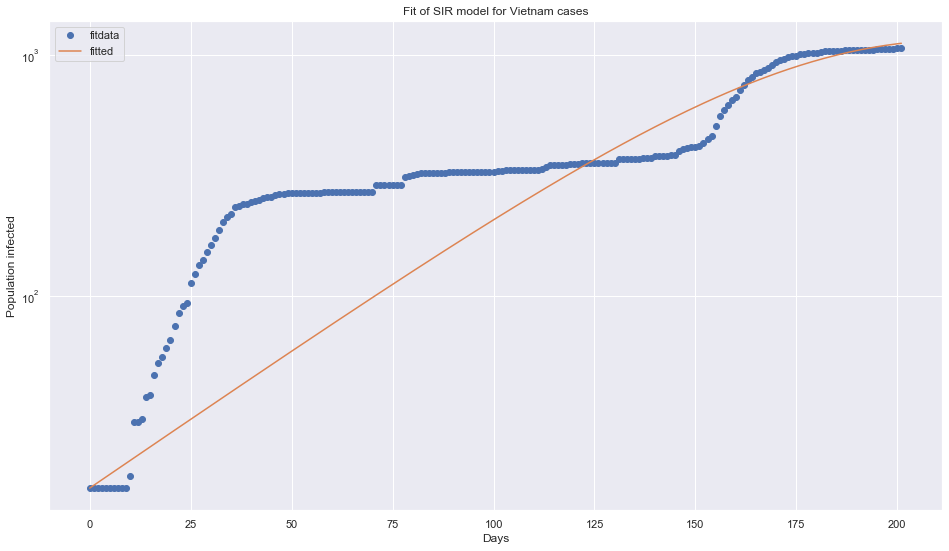

Optimal parameters: beta = 0.5572866366876772  and gamma =  0.5309499633906611
Basic Reproduction Number R0  1.04960292892541
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



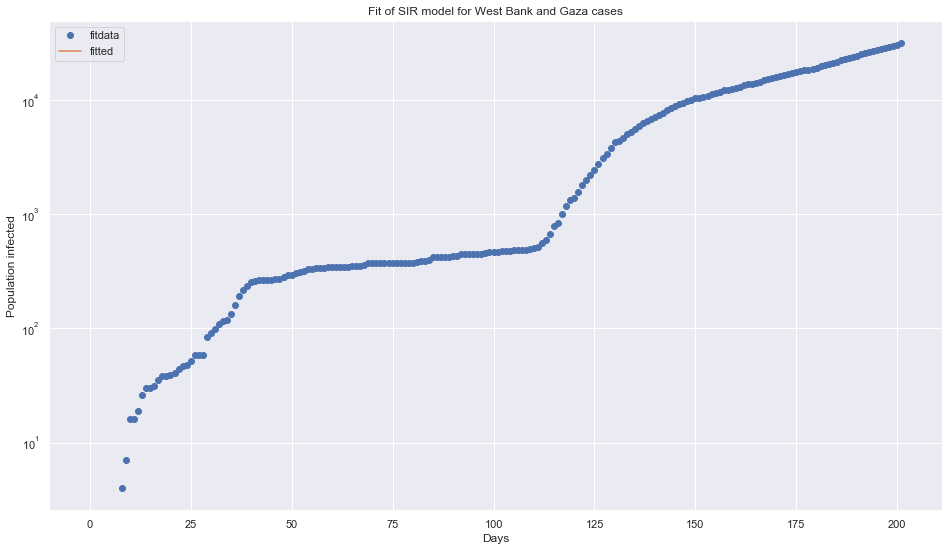

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



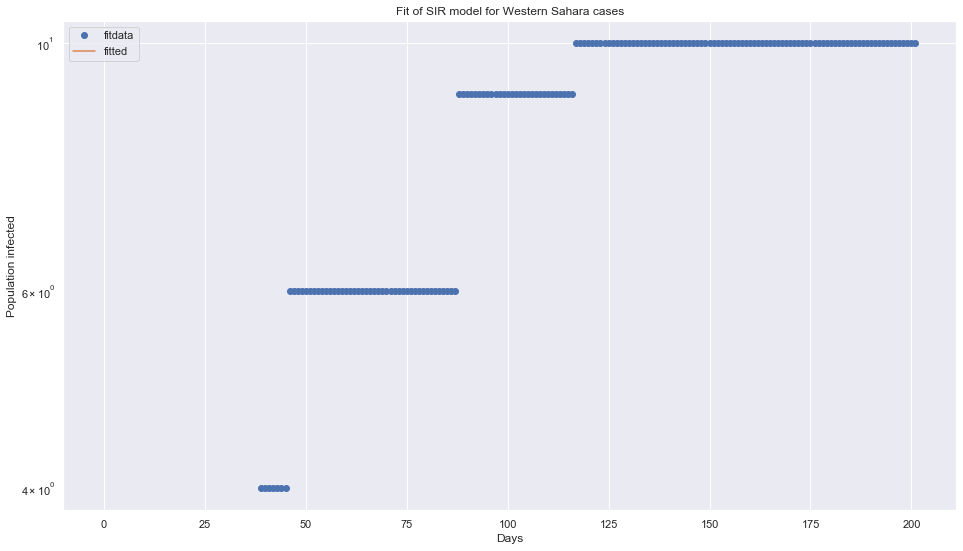

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



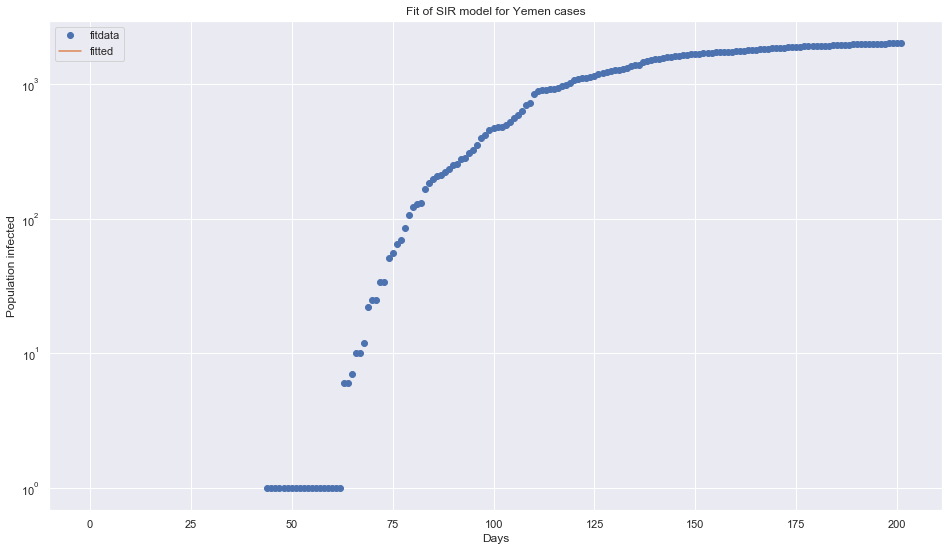

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



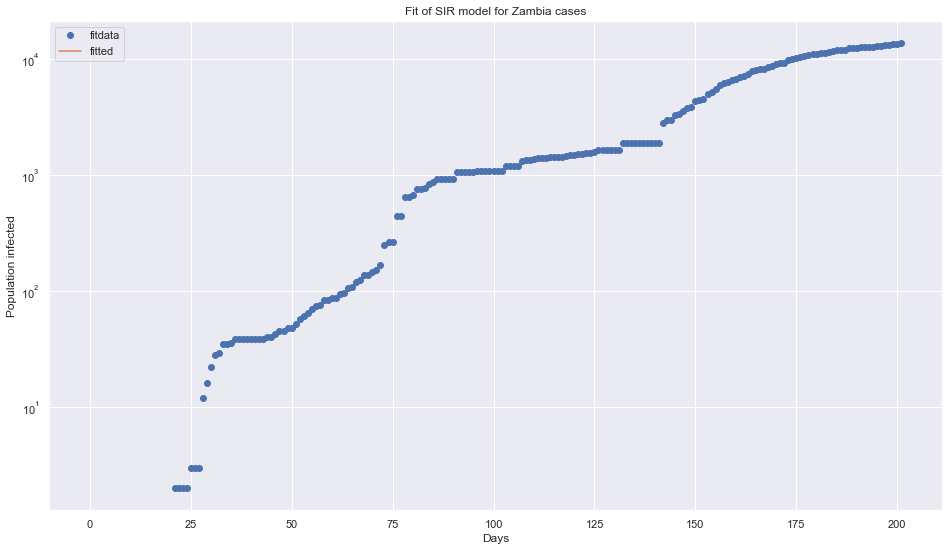

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



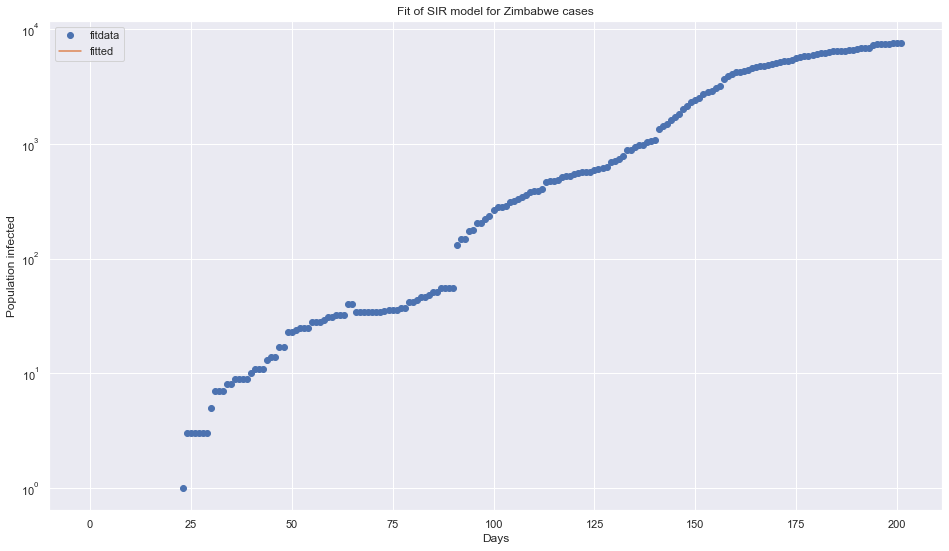

Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [20]:
SIR_of_allcountries ={}

import plotly.graph_objects as go
import plotly
plotly.__version__


for each in full_countrylist:
    
   
    
    fitdata = np.array(df_analyseSIR[each][35:])    #ydata
    t=np.arange(len(fitdata))

    #  re-initialization 
    I0=fitdata[0]
    S0=N0-I0
    R0=0
    beta


    # example curve of our differential equation
    popt=[0.4,0.1]
    fit_odeint(t, *popt)

    # the resulting curve has to be fitted
    # free parameters are here beta and gamma

    popt, pcov = optimize.curve_fit(fit_odeint, t, fitdata, maxfev=5000)
    perr = np.sqrt(np.diag(pcov))

#     print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
#     print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    

#     get the final fitted curve fit
    fitted=fit_odeint(t, *popt)
    
    
    plt.semilogy(t, fitdata, 'o',label='fitdata')
    plt.semilogy(t, fitted,label='fitted')
    plt.title("Fit of SIR model for "+each +" cases")
    plt.legend()
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.show()
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
    print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")
    
    fig = go.Figure()
    SIR_of_allcountries[each] = fitted
   


In [ ]:
#N0=1000000
# t=np.arange(len(fitdata))

# for each in full_countrylist:

   
    
#     fitdata=np.array(df_analyseSIR[each])
#     t=np.arange(len(fitdata))


#     I0=fitdata[0]
#     S0=N0-I0
#     R0=0

#     popt=[0.4,0.1]
    
#     popt,pcov = curve_fit(fit_odeint,t,fitdata,maxfev=15000) #,bounds=(1,len(t)))

#     perr = np.sqrt(np.diag(pcov))
#     #print(popt)
#     fitted=fit_odeint(t, *popt).reshape(-1,1)
#     #print('fitted', fitted)
#     df_analyseSIR[each + '_SIR']=fitted

#     #fitted=fit_odeint(t, *popt)
#     #df_analyseSIR[each + '_sir']
    
 


# DASH

In [21]:
import plotly.graph_objects as go

In [22]:
fig=go.Figure()

In [23]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each, 'value': each} for each in full_countrylist],
        
        value=['US', 'Spain'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(full_countrylist):

    
    traces = [] 
    for each in full_countrylist:        
        traces.append(dict(x=pd.Series(t),
                                y=pd.Series(df_analyseSIR[each]),       # normal country cases
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )        
        
        traces.append(dict(x=pd.Series(t),
                                y=pd.Series(SIR_of_allcountries[each]),   #fitted curve(sir values)
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each + ' SIR'
                        )
                ) 
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="SIR Curve)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,7.5]'
                      }
        )
    }
        

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
